# 데이터 확인

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [2]:
display(train.head(5))
display(test.head(5))
display(submission.head(5))

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,NaN,5.0,5.0,남향,1.0,1.0,불가능,NaN,7,Z86Th6S3K5,D플랫폼,2024-10-21
1,TEST_001,서류확인,150500000.0,590000,30.26,7.0,11.0,서향,1.0,1.0,불가능,16.0,11,G52Iz8V2B9,D플랫폼,2023-09-02
2,TEST_002,현장확인,47000000.0,200000,41.50,2.0,3.0,남서향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-04-03
3,TEST_003,서류확인,133000000.0,250000,31.35,5.0,6.0,남향,2.0,1.0,가능,NaN,5,C41wx1K6U9,B플랫폼,2024-09-19
4,TEST_004,현장확인,108000000.0,380000,23.14,2.0,3.0,남향,1.0,1.0,불가능,NaN,0,Z68ZJ6F6L4,A플랫폼,2024-11-10


,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


피처에는 'ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부' 이 존재한다.

예측하고자 하는 타겟은 '허위매물여부'로 0과 1로서 표현된다.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


먼저 전체 엔트리는 2452개가 존재한다.

카테고리형(object) 피처에는 ID, 매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼, 게재일

수치형(int, float) 피처에는 보증금, 월세, 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수, 관리비, 허위매물여부가 있다.

결측치가 존재하는 피처는 전용면적(787), 해당층(229), 총층(16), 방수(16), 욕실수(18), 총주차대수(696)가 존재한다.

총층과 방수, 욕실수는 결측치가 적은 반면 전용면적과 총주차대수는 결측치가 많다. 어떤 이유로 발생한 결측치인지 확인해 봐야 한다.

## 1) 수치형 데이터의 기술 통계량 확인

'보증금, 월세, 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수, 관리비, 허위매물여부'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

train.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부
count,2.452000e+03,2452.000000,1665.000000,2223.000000,2436.000000,2436.000000,2434.000000,1756.000000,2452.000000,2452.000000
mean,1.574188e+08,380420.065253,27.009628,4.848403,8.052545,1.378079,1.034511,20.332574,5.477977,0.121533
std,1.212794e+08,206425.413601,7.951757,3.543348,4.920112,0.485007,0.182575,28.939900,5.631185,0.326813
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,7.500000e+07,200000.000000,19.800000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000
50%,1.325000e+08,380000.000000,26.400000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,0.000000
75%,1.890000e+08,550000.000000,32.110000,6.000000,10.000000,2.000000,1.000000,31.000000,9.000000,0.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000


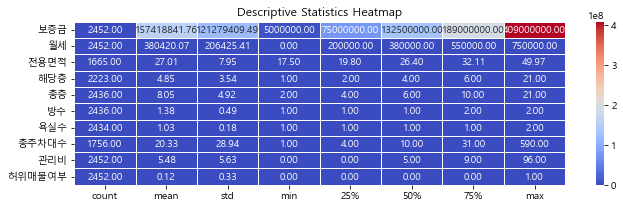

In [5]:
description = train.describe().T

plt.rc('font', family='Malgun Gothic')

fig, axs = plt.subplots(figsize=(11, 3))
sns.heatmap(description, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, ax=axs)
axs.set_title('Descriptive Statistics Heatmap')
plt.show()

허위매물여부 - 전체값에 대해서 0.12퍼센트가 1의 값을 갖는다. 즉 전체 데이터의 12퍼센트 정도가 허위매물인 것으로 나타났다.

관리비 - 최소값은 0, 하위 25지점도 0, 중간이 5인데 최대값은 96이다. 극단치가 발생한 것으로 나타난다. 이 이상치의 처리를 고민해 봐야 할 것 같다.

총 주차대수 - 최소값이 1이며 중간값이 10인데 최대값이 590이다. 마찬가지로 극단치를 확인해봐야 할 것 같다. 또한 결측치도 많이 발생했다.

욕실수 - 대부분은 1의 값을 갖고 일부만 2의 값을 갖는 것 같다.

총층 - 최소값이 2이고 평균이 6인데 최대층이 21층이다. 카테고리화 하여 저층과 고층 등으로 나누는 것이 좋아보인다.

해당층 - 마찬가지로 최대층이 21층이다. 최소는 1층, 평균은 6층이다. 전체층에 대한 해당층의 비를 고려하는 것이 좋아보인다.

전용면적 - 결측치가 많이 관측된다. 전용면적이란 공용공간을 제외한 실제 거주 면적을 의미한다. 전용면적이 클수록 실제 사용 가능한 공간이 많으므로 더 높은 가치가 부여되지만, 결측치의 수가 787개로 상당수의 매물이 전용면적 정보를 제공하지 않았다. 이는 데이터 수집 시 누락되었거나, 각 매물이 다른 기준으로 정보를 보고한 결과일 수 있다. 결측치인지 아닌지도 중요한 사항일 것 같다. 혹은 결측치가 아니라면 가격대비 면적이 허위매물 여부를 판단할 수 있는 기준이 될것이라 생각한다.

월세는 최소값이 0, 최대값이 750000 중간값과 평균값은 유사하게 380000 정도이다.

보증금은 최소가 5000000, 최대는 409000000, 중간값은 132500000 평균값은 157418841이다. 중간값과 평균값이 유사하지만, 가격대가 극단적으로 높은 매물이 존재하는 것으로 보인다.

## 2) 범주형 데이터의 기술 통계량 확인
'ID, 매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼, 게재일'

In [6]:
train_drop = train.drop(['ID'],axis = 1)

train_drop.describe(include=['O']).T

,count,unique,top,freq
매물확인방식,2452,3,현장확인,1705
방향,2452,8,남향,610
주차가능여부,2452,2,가능,1237
중개사무소,2452,279,G52Iz8V2B9,799
제공플랫폼,2452,13,A플랫폼,958
게재일,2452,534,2024-11-08,19


In [7]:
categorical_col = ['매물확인방식', '방향', '주차가능여부', '제공플랫폼']

for cat in categorical_col:
    unique_values = train[cat].unique().tolist()
    print('\n {0}\n'.format(cat), unique_values)


 매물확인방식
 ['현장확인', '전화확인', '서류확인']

 방향
 ['서향', '남동향', '동향', '남향', '북동향', '북향', '남서향', '북서향']

 주차가능여부
 ['가능', '불가능']

 제공플랫폼
 ['B플랫폼', 'D플랫폼', 'A플랫폼', 'C플랫폼', 'F플랫폼', 'G플랫폼', 'E플랫폼', 'J플랫폼', 'H플랫폼', 'I플랫폼', 'L플랫폼', 'K플랫폼', 'M플랫폼']


매물확인방식은 세종류 : '현장확인', '전화확인', '서류확인' 가 존재한다. 특정 매물확인방식에서 허위매물이 많이 존재하는지 확인해 봐야 할 것 같다.

방향은 '서향', '남동향', '동향', '남향', '북동향', '북향', '남서향', '북서향'의 8방향 일반적으로 남향의 집을 선호하지만 전체 데이터에 2452에 대해서 610개가 남향으로 엄청 큰 비중을 차지하지는 않는다.

주차가능여부는 '가능'과 '불가능'

제공플랫폼은 A부터 M까지 13종류의 플랫폼에서 제공되었다. 특정 제공플랫폼에서 허위매물을 많이 제공했는지를 확인해야 할 것 같다.

중개사무소는 279개가 존재하며, 'G52Iz8V2B9' 명의 중개사무소에서는 799대의 데이터를 제공했다. 특정 중개사무소에서 허위매물을 많이 제공했는지를 확인해야 할 것 같다.

## 3) 시계열 데이터의 기술 통계량 확인

In [8]:
import pandas as pd

train['게재일'] = pd.to_datetime(train['게재일'], format='%Y-%m-%d')

print(train['게재일'].max())
print(train['게재일'].min())
print(train['게재일'].max()-train['게재일'].min())

2025-03-03 00:00:00
2023-04-28 00:00:00
675 days 00:00:00


게재일은 datetime으로 변형하여 시계열 분석을 해야 할 것 같다. 게재된 날짜중 가장 이른것이 2023-04-28, 가장 늦은것이 2025-03-03이다. 총 675일 중에서 534개의 날에 값이 존재하며 총 2452개가 존재한다.

# 데이터 시각화

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

## 1) Target(허위매물여부)의 분포

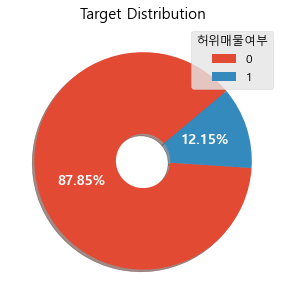

In [10]:
categories = train["허위매물여부"].value_counts().index
values = train["허위매물여부"].value_counts().values

plt.figure(figsize=(5,5))

pie_chart = plt.pie(x=values,
                    labels=categories,
                    autopct='%.2f%%',
                    shadow=True,
                    startangle=40,
                    wedgeprops=dict(width=0.75),
                    textprops=dict(color="white", fontsize=14, weight="bold"))

plt.legend(title="허위매물여부", title_fontsize=12, loc='best', fontsize=12)
plt.title('Target Distribution', size = 15)
plt.show()

허위매물인 매물의 수는 전체에 대해서 12.15%로 허위매물이 아닌 매물의 수가 약 8배에 달하는 것으로 확인되었다.

이러한 클래스의 불균형은 모델 학습에 문제를 일으킬 수 있기 때문에 보서샘플링 등의 방식을 사용해야 한다.

## 2) 범주형 피처의 분포
'매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼, 게재일'

In [11]:
from IPython.core.display import display, HTML

display(HTML("<style>.output_wrapper, .output {height: auto !important; max-height: none !important;}</style>"))

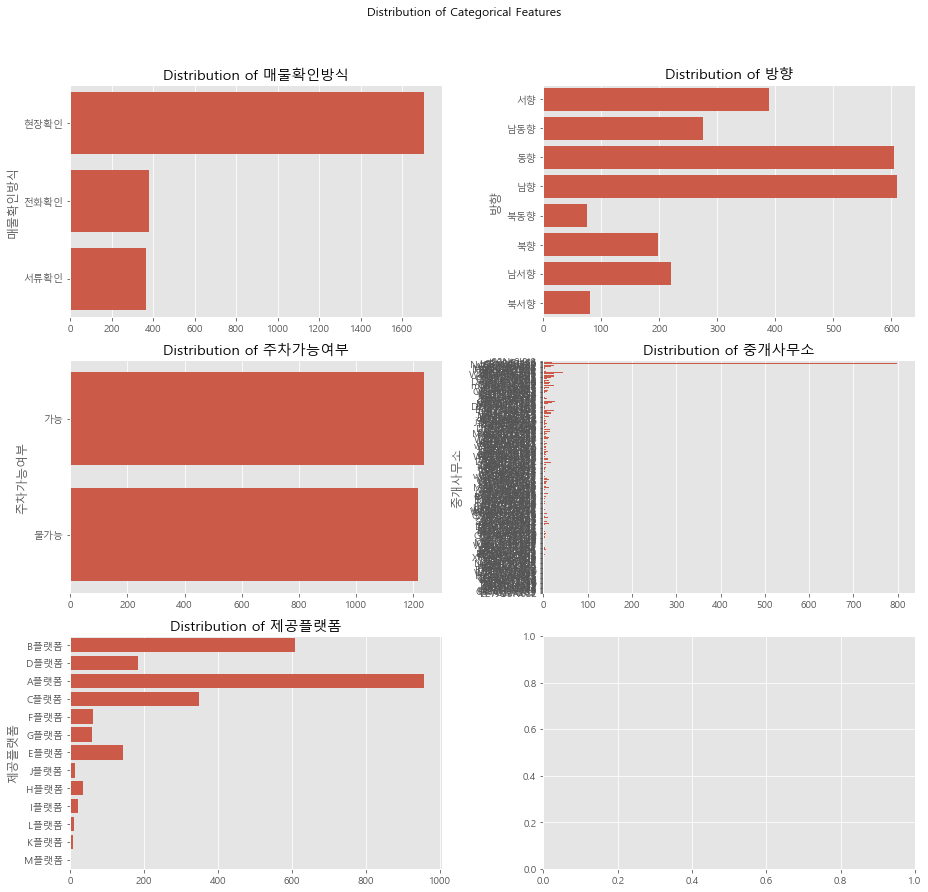

In [12]:
train = train.drop(['ID'], axis=1)

categorical_columns = train.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 2, figsize=(13,13))
fig.suptitle('Distribution of Categorical Features')

for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=train, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel('')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

매물확인 방식은 대부분이 현장확인방식으로 약 1700여건, 나머지 전화확인과 서류확인이 400건 정도씩 존재한다.

방향은 동향과 남향이 600건 정도로 가장 많으며 서향 남동향 남서향 북향 순이다. 북동향과 북서향은 100건 미만으로 가장 적다.

주차가는 여부는 가능과 불가능이 1200여건으로 그 수가 거의 같다.

중개사무소는 특정 중개사무소에서 제공한 데이터가 월등히 많은 것을 확인할 수 있다. 데이터의 불균형이 너무 심하기 때문에 데이터를 제외하는것 까지 고려해야 할 것 같다.

제공 데이터는 A가 약 1000건으로 가장 많고 B가 600여건, C가 300여건 D가 200여건이며 E는 150정도이고 나머지는 100건 미만으로 수가 매우 적다.

## 3) 수치형 피처의 분포
'보증금, 월세, 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수, 관리비, 허위매물여부'

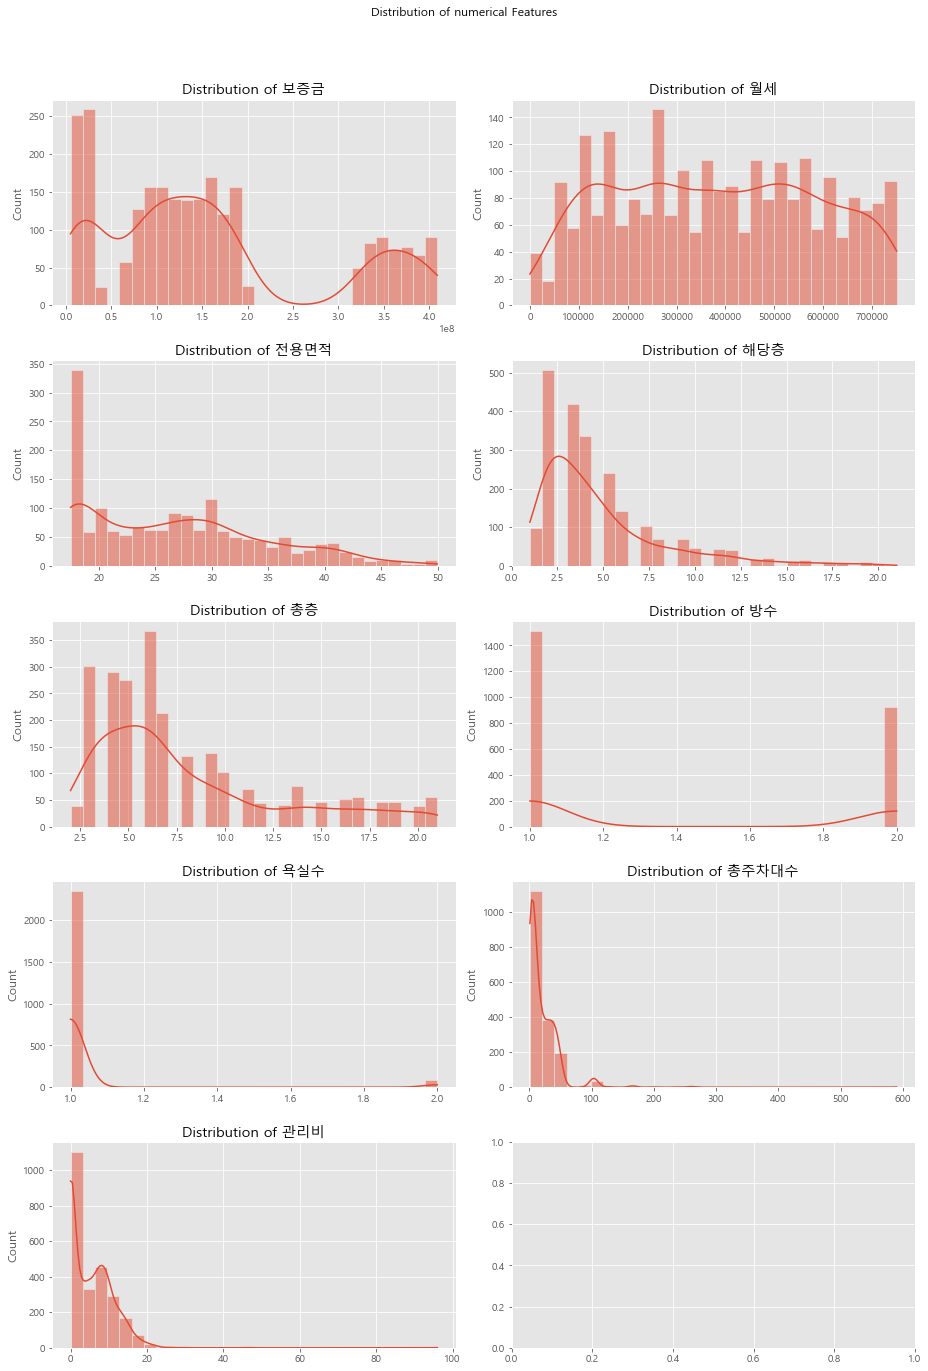

In [13]:
numeric_columns = train.select_dtypes(include=['int','float']).columns[:-1]

fig, axes = plt.subplots(5, 2, figsize=(13,20))
fig.suptitle('Distribution of numerical Features')

for i, col in enumerate(numeric_columns):
    sns.histplot(train[col], kde=True, bins=30, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].set_xlabel('')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

보증금은 0에서 0.5 미만의 수가 가장 많으며 1.0과 2.0 사이의 값도 매우 많다. 2.0에서 3.0 사이는 거의 존재하지 않으며 3.2부터 다시 수가 증가하여 4.0까지의 수도 꽤나 많은 편이다.

월세의 형태는 중간중간 튀는 높은 값들이 있지만 꽤나 정규화된 형태를 띄고 있다.

전용면적은 0일때가 가장 많은것으로 나타난다. 0인값들을 제외하고는 월세와 마찬가지로 정규분포에 가까운 형태를 띄고있다. 몇몇 극단치를 확인할 수 있다.

해당층은 1일때의 값이 가장 많으며 점점 줄어드는 형태를 띄고 있다.

총층은 6일때가 가장 많다. 저층 아파트 혹은 빌라에 해당하는 것 같으며 이를 통해 건축물 형태를 구분지어 분석하면 좋을 듯 하다.

방수는 1혹은 2의 두가지 값만 존재한다. 1개의 방인 경우가 1500여건, 나머지 900여건은 방이 2개인 경우이다.

욕실수는 대부분이 1개인경우이다. 예외적으로 몇개의 매물만 욕실수가 2개인데, 일반적으로 욕실이 2개이려면 집이 꽤나 넓어야 하기 때문에 면적과 연관지어야 할 것 같다.

총주차대수는 대부분이 0의 값을 갖는다. 대부분 50대 미만의 값을 갖지만 일부 100을 넘어가는 매물이 있으며 600정도의 값을 갖는 매물도 있다. 극단치를 처리해 줘야 할 것 같다. 일반적으로 아파트 단지여야 주차대수가 많을것 같다. 앞서 얘기한 층수를 통해 건축물 형태를 구분짓고 이를 연관지어주자

관리비는 대부분 0의 값을 갖고 10일때가 수가 다시 많아지며, 20부터는 그 수가 거의 없다. 일부 극단치가 확인된다.

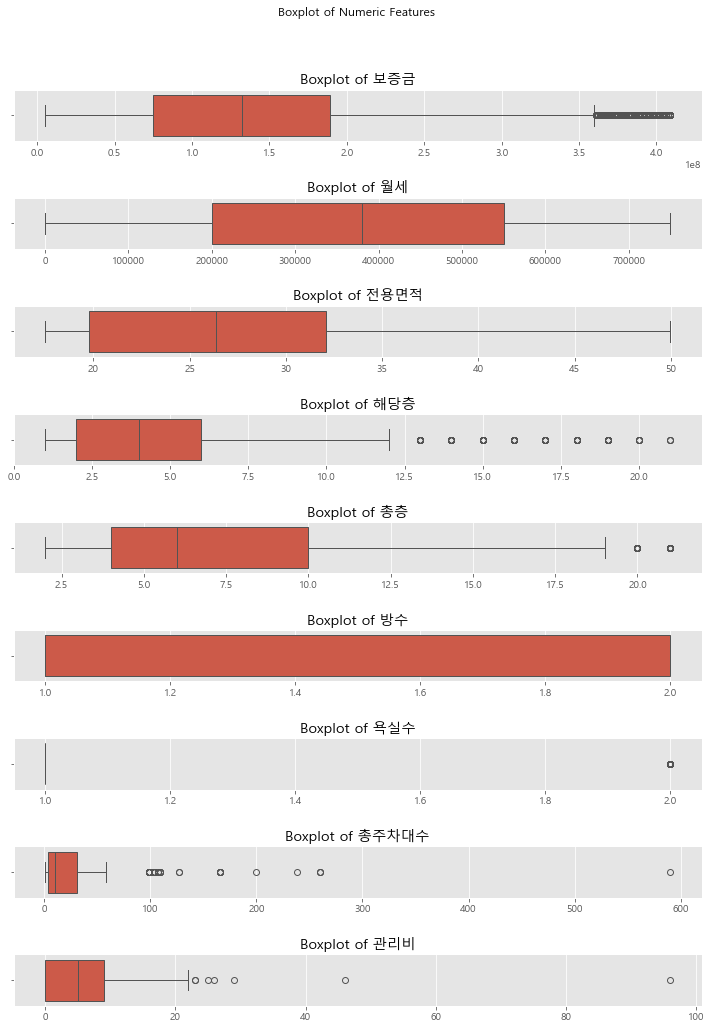

In [14]:
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 15))
fig.suptitle('Boxplot of Numeric Features')

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Box 플랏을 통해 확인한 데이터의 분포

보증금은 왼쪽으로 치우친 분포를 띄고 있다. 3.6을 넘어가는 극단치들이 여럿 분포하는 것을 확인할 수 있다.

월세는 균등한 분포를 띄고있으며 극단치는 확인되지 않는다.

전용면적은 왼쪽으로 치우친 분포를 확인할 수 있으며 극단치는 존재하지 않는다.

해당층은 12층을 넘어가는 층을 극단치로 보고 있다. 마찬가지로 왼쪽으로 치우친 분포를 하고 있다.

총층은 19층을 넘어가는 층을 극단치로 보며 마찬가지로 왼쪽으로 치우친 분포를 하고 있다.

욕실수는 2인 데이터를 극단치로 보고 있다.

총 주차대수는 50을 넘어가면 극단치로 보고 있다. 왼쪽으로 치우친 분포를 하고 있다.

관리비는 22정도를 넘어가면 극단치고 보고있다. 왼쪽으로 치우친 분포를 띄고 있다.

## 4) 시계열 피처의 분포

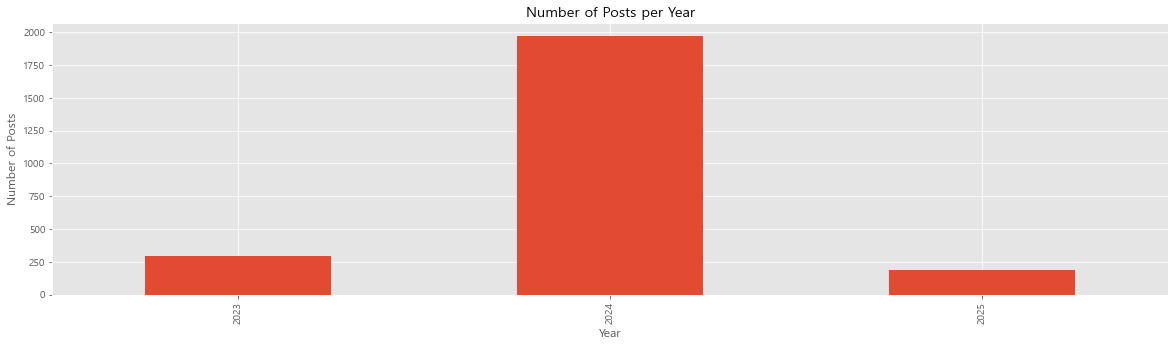

In [15]:
train['year'] = train['게재일'].dt.year

train['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.title("Number of Posts per Year")
plt.show()

In [16]:
train = train.drop(["year"], axis=1)

2023년 4월 28일부터 2025년 03월 03일까지의 데이터 이지만 대부분의 데이터는 2024년의 것임을 확인할 수 있다.

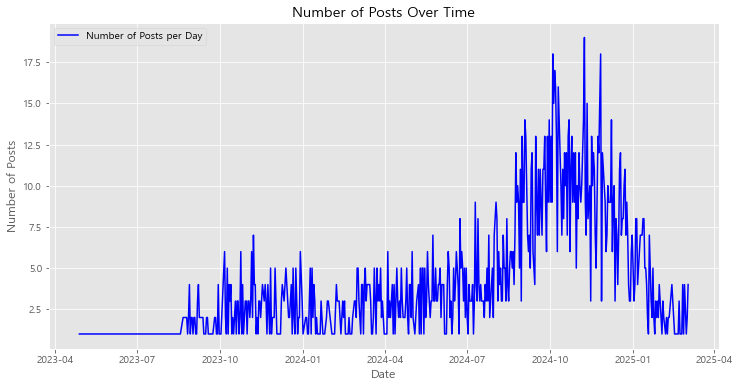

In [17]:
train_time_series = train.groupby(train['게재일'].dt.date).size()

plt.figure(figsize=(12,6))
plt.plot(train_time_series.index, train_time_series.values, label="Number of Posts per Day", color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.title("Number of Posts Over Time")
plt.legend()
plt.show()

전반적으로 2024년의 데이터 이지만, 2023년에도 유독 10월과 1월 사이에 데이터의 수가 많으며 2024년에도 마찬가지로 10월과 1월 사이에서 가장 데이터의 수가 많음을 알 수 있다.

실제 사례들을 살펴보자면 연말 이사철/ 입시 및 취업시즌/ 세금 및 투자자 매도 영향 등의 이유로 10월~12월 사이에 매물이 많아지는 경향을 띈다.

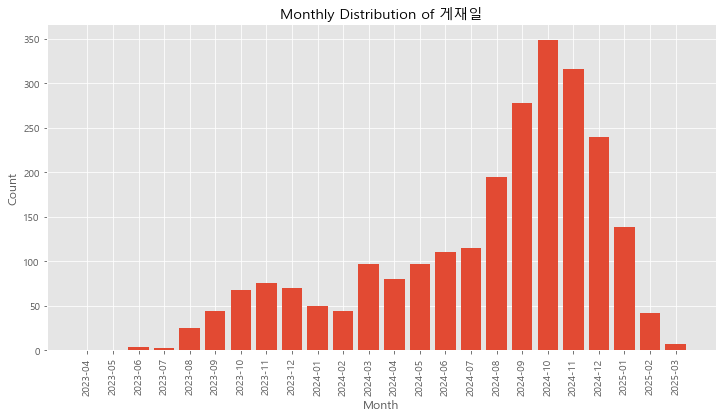

In [18]:
train = train.set_index("게재일")

monthly_counts = train.resample('M').size()

plt.figure(figsize=(12,6))
plt.bar(x=range(len(monthly_counts)), height=monthly_counts)
plt.title('Monthly Distribution of 게재일')
plt.xlabel('Month')
plt.ylabel('Count')

plt.xticks(ticks=range(len(monthly_counts)), labels=monthly_counts.index.strftime('%Y-%m'), rotation=90)

plt.show()

계절별로의 주기적인 변화를 관찰할 수는 있지만, 데이터가 많지 않으므로 속단할 수는 없을 것 같다.

## 5) 다중 공선성(VIF) 계산을 통한 피처 상관성 분석

In [19]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(train):
    vif_data = pd.DataFrame()
    vif_data["variable"] = train.columns
    vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
    return vif_data

numeric_train = train.select_dtypes(include=['int','float']).dropna()
vif = calculate_vif(numeric_train)
vif

,variable,VIF
0,보증금,2.667627
1,월세,3.896108
2,전용면적,10.785326
3,해당층,5.187629
4,총층,8.142754
5,방수,13.055638
6,욕실수,18.041172
7,총주차대수,2.385557
8,관리비,2.336389
9,허위매물여부,1.119742


VIF값이 10 이상이면 해당 변수는 다중공선성 문제가 있을 가능성이 높다.

5 이하일 때는 다중 공선성이 약하거나 문제가 없기 때문에 넘어가도록 하겠다.

보증금, 월세, 총주차대수, 관리비, 허위매물 여부 피처는 다중공선성 문제가 약하거나 문제가 없어 보인다.

해당층과 총층의 경우 다중공선성이 존재할 가능성이 있기 때문에 확인해봐야 할 것 같다.

전용면적, 욕실수, 방수, year의 경우 심한 다중공선성 문제가 있기때문에 모델의 재구성이 필요하다고 판단된다.

이를 확인하기 위해 VIF값이 높은 피처들의 다른 피처들과의 관계를 탐색해보자.

### (1) 다중 공선성 확인을 위한 '전용면적' , '욕실수', '방수' 피처 시각화

'전용면적' 피처의 VIF값은 10.7, '욕실수' 피처의 VIF값은 18.0, '방수' 피처의 VIF값은 13.0

In [20]:
train = train.drop_duplicates().reset_index(drop=False)

<Axes: xlabel='전용면적', ylabel='Count'>

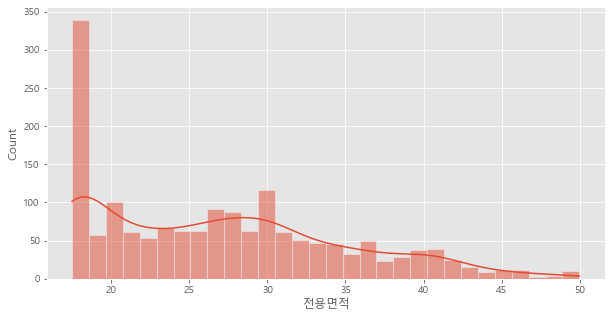

In [21]:
plt.figure(figsize=(10,5))

sns.histplot(train["전용면적"], kde=True, bins=30)

'전용면적' 피처의 경우 가장 면적이 작은 매물들의 수가 많으며, '전용면적이' 30까지는 골고루 많은 매물을 갖다가 그 후에는 점점 적어지는 형태의 분포를 갖고 있다.

일반적으로 전용면적이 넓은 매물일수록 방과 화장실이 많을 것이라 생각되어 그 사이의 관계를 확인해보자.

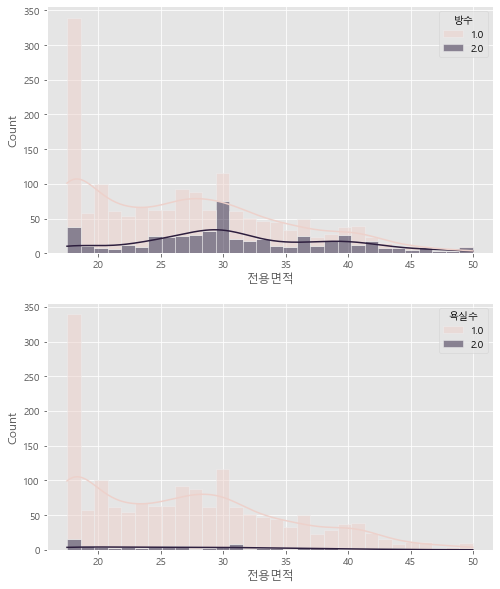

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(8,10))

sns.histplot(data=train, x="전용면적", hue="방수", kde=True, multiple="stack", bins=30, ax=axes[0])
axes[0].set_xlabel("전용면적")

sns.histplot(data=train, x="전용면적", hue="욕실수", kde=True, multiple="stack", bins=30, ax=axes[1])
axes[1].set_xlabel("전용면적")

plt.show()

전용면적이 30을 넘어가면서 부터는 전체 매물의 수가 줄어들기 때문에 비율을 확인하는 것이 좋을 것 같다.

-> 이후에는 더 큰 범주로 카테고리화 필요할듯 함.

전용면적 피처의 경우 결측치가 있기 때문에 결측치가 없는 데이터들에 대해서 탐색해보자.

In [23]:
train_area_not_null = train[~train["전용면적"].isnull()]
train_area_null = train[train["전용면적"].isnull()]

In [24]:
train_area_not_null["전용면적"] = round(train_area_not_null["전용면적"])

In [25]:
room_counts = train_area_not_null.groupby("전용면적").size().reset_index(name="매물 수")
mean_bath = train_area_not_null.groupby("전용면적")["욕실수"].mean().reset_index(name="전용면적 별 평균 욕실수")
mean_room = train_area_not_null.groupby("전용면적")["방수"].mean().reset_index(name="전용면적 별 평균 방수")

result = pd.merge(room_counts, pd.merge(mean_bath, mean_room))

result

,전용면적,매물 수,전용면적 별 평균 욕실수,전용면적 별 평균 방수
0,18.0,335,1.044776,1.113433
1,19.0,52,1.076923,1.173077
2,20.0,102,1.049020,1.078431
3,21.0,52,1.038462,1.096154
4,22.0,46,1.043478,1.130435
5,23.0,77,1.051948,1.142857
6,24.0,54,1.037037,1.500000
7,25.0,44,1.090909,1.159091
8,26.0,95,1.052632,1.315789
9,27.0,68,1.058824,1.367647


방수의 경우 전용면적이 커짐에 따라서 많아지는 경향성을 보인다. 넓은 면적일 수록 방의 수가 2에 가까워지는 경향성을 보이고 있으며, 좁은 면적일수록 방의 수가 1에 가까워지는 경향성을 띈다. 두 피처 사이에는 명확한 상관관계가 존재하는 것으로 보인다. 반면에 욕실수의 경우 전용면적이 넓어짐에 따라서 증가하는 경향성을 확인하기는 어려워 보인다.

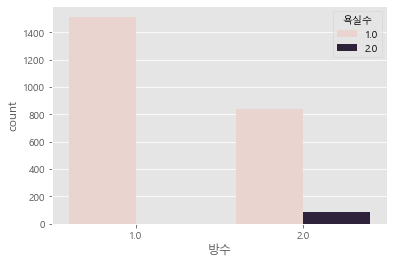

In [26]:
sns.countplot(data=train, x='방수', hue='욕실수')
plt.show()

먼저, 방수가 1일때는 욕실수가 2인 경우가 없었다. 방수가 2인 데이터 중의 일부만 2의 욕실수를 가지고 있기 때문에 욕실수는 방수에 대한 연관성이 큰 것 같다. 이를 반영하여 피처를 변형하여야 할 것 같다.

*** 욕실수는 전용면적과는 크게 관계가 없지만, 방수에 의해 결정되는 것으로 보인다. 

또한 방수는 전용면적이 넓어짐에 따라서 많아지는 경향성을 띈다는 것을 확인할 수 있다.

전용면적 피처의 경우 결측치가 많이 존재하는데, 이 결측치가 무엇을 의미하는지도 확인해야 한다.

매물들 중에서 350개로 가장 많은 매물들의 전용면적이 17(최소값)을 갖는다.

방수의 경우 1개인 경우가 1500, 2개인 경우 900개정도이다.

### (2) 다중 공선성 확인을 위한 '해당층', '총층' 피처 시각화
'해당층' 피처의 VIF값은 5.18, '총층' 피처의 VIF값은 8.14

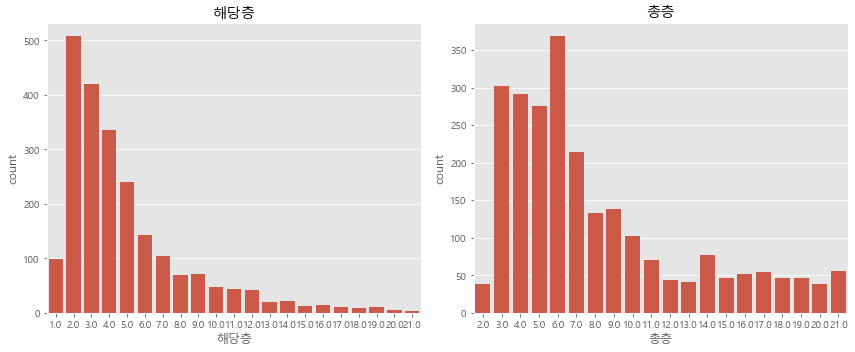

In [27]:
fig, axs = plt.subplots(figsize=(12,5), ncols=2)

sns.countplot(x="해당층", data=train, ax=axs[0])
axs[0].set_title('해당층')

sns.countplot(x="총층", data=train, ax=axs[1])
axs[1].set_title('총층')

plt.tight_layout()
plt.show()

두 피처 모두 왼쪽에 많은 값이 분포하고 있으며, 오른쪽으로 긴 꼬리가 있는 분포를 가지고 있다.

높은 총층을 가진 매물이여야 높은 해당층을 가질 수 있기 때문에 해당 두 피처에서 높은 공선성을 가지게 되었을거라 생각된다.

두 피처를 적절히 결합하여 새로운 피러를 생성해 모델에 포함시키는 것이 바람직해 보인다.

또한 총층의 경우 건축물의 유형을 구분지을 수 있는 피처로 새로운 파생 피처를 적절하게 만드는 것이 중요해 보인다.

## 6) 변수 간 상관 관계 시각화

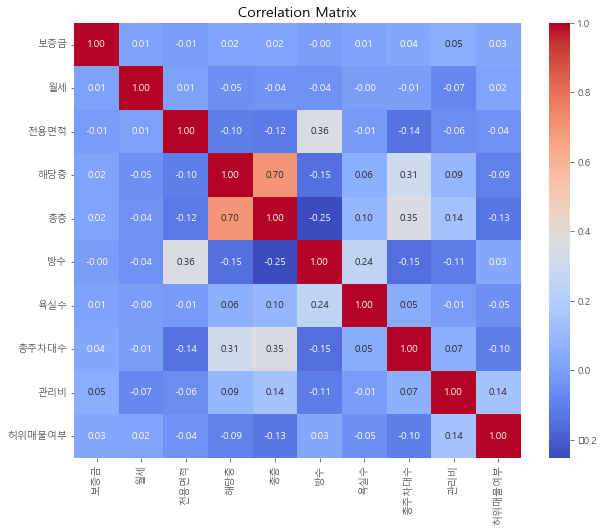

In [28]:
numeric_columns = train.select_dtypes(include=['int64','float64']).columns

corr_matrix = train[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

해당층과 총 층 사이의 상관관계가 매우 높은 값을 갖고 있다. 높은 공선성을 띄기 때문에 이를 처리해야 한다.

target과의 상관계수는 대부분 낮게 나왔지만, 총층이 -0.13으로 그 중 높은 음의 상관관계, 관리비가 높은 양의 상관관계를 띄고 있다.

관리비가 높을수록 허위매물일 가능성이 높으며, 총층은 낮을수록 허위매물일 가능성이 높게 확인되었다.

위에서 예상했던 대로, 총층 피처와 해당층 피처는 높은 상관관계를 갖으며, 방수와 전용면적, 욕실수와도 높은 상관관계를 갖는것으로 보인다.

반면에 욕실수와 전용면적은 크게 연관이 없는것으로 보인다.

예상하지 못했던 피처중에 총 주차대수 피처가 해당층 피처와 총층 피처와 큰 상관계수를 갖는 것으로 보인다.

이는 총층 피처를 통해 건축물 유형을 구분지었을 때, 큰 건축물 유형일 수록 주차대수가 많아야 하기 때문에 연관이 있어 보인다. 한번 확인해보자.

<Axes: xlabel='총층', ylabel='총주차대수'>

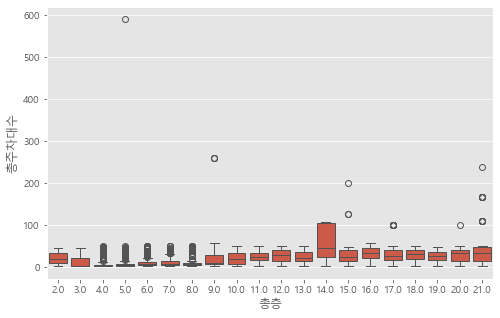

In [29]:
plt.figure(figsize=(8,5))

sns.boxplot(data=train, x="총층", y="총주차대수")

총 주차대수가 100을 넘는 경우는 많이 없기때문에 100 이하의 값들에 대해서만 확인해보면,

<Axes: xlabel='총층', ylabel='총주차대수'>

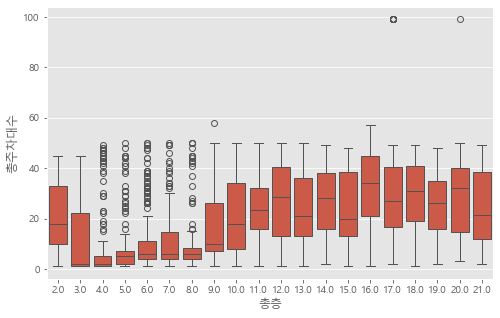

In [30]:
plt.figure(figsize=(8,5))

sns.boxplot(data=train[train["총주차대수"]<=100], x="총층", y="총주차대수")

총층이 4에서 8인경우, 이상치가 상당히 많이 검출되었다. 이를 해결할 방법을 확인해 봐야 할 것 같다.

전체적인 분포를 봤을때, 총층이 높아질수록 총주차대수가 많아지는 경향성을 보이고 있다.

## 7) 범주형 변수와 Target(허위매물여부)의 분포

매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼

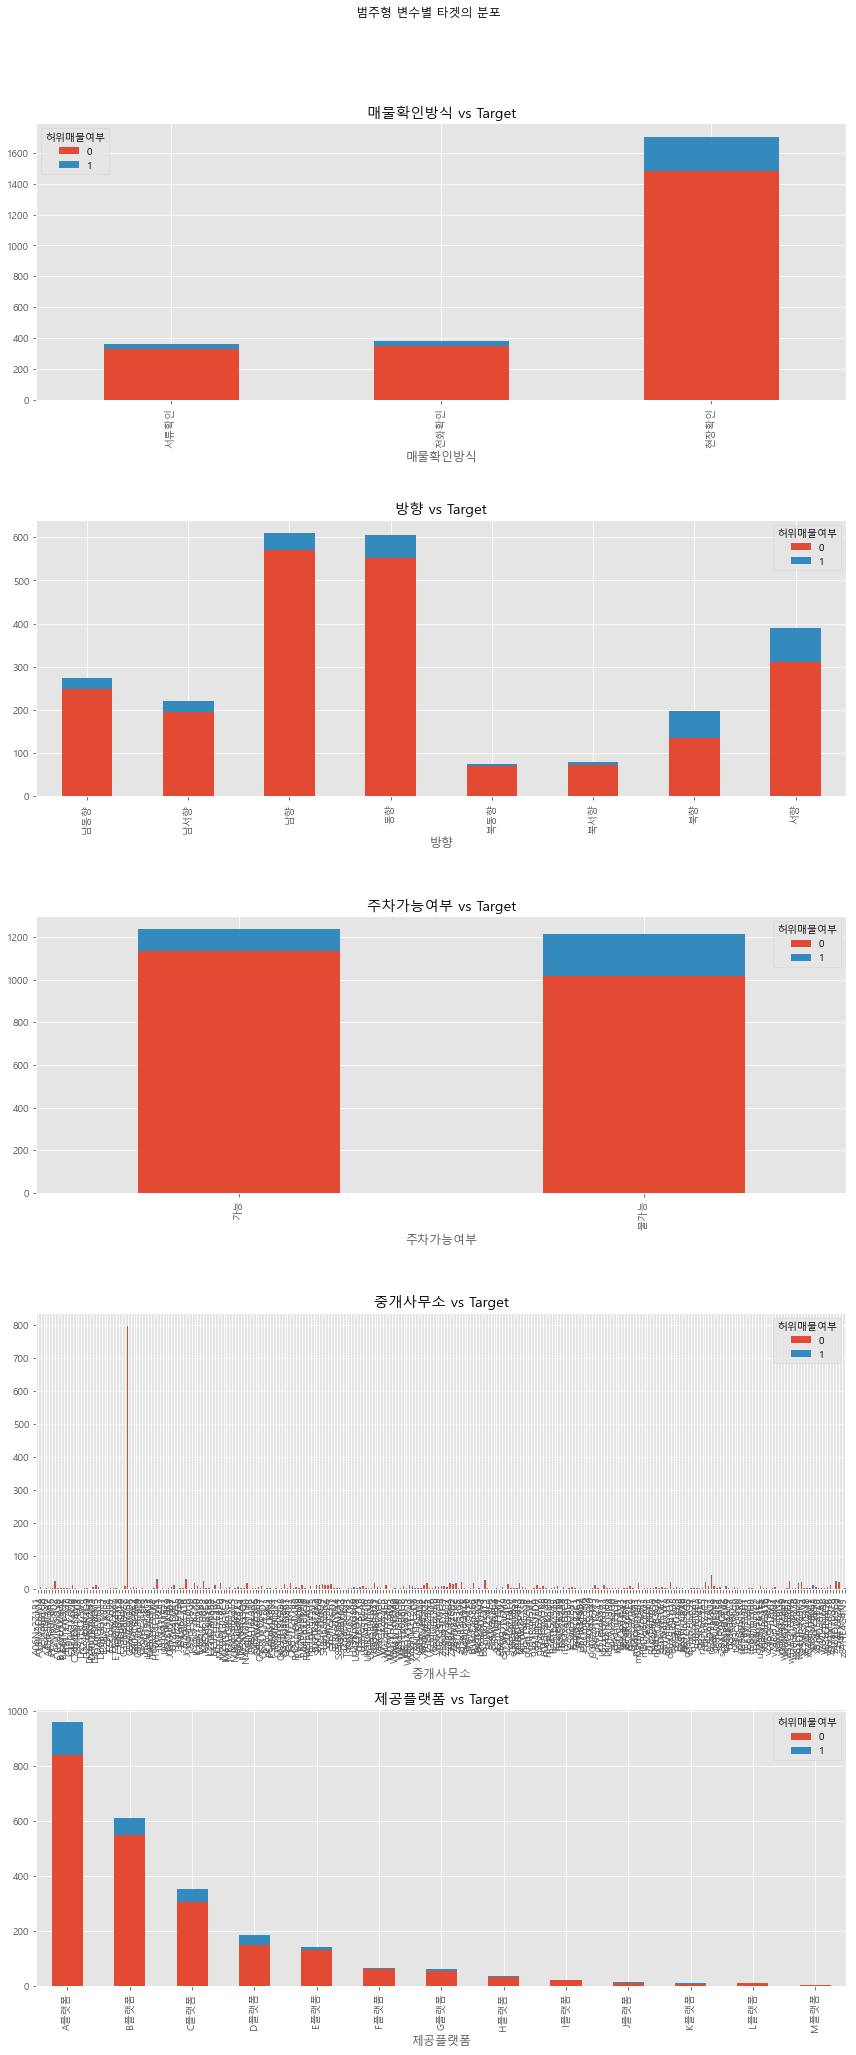

In [31]:
fig, axes = plt.subplots(5, 1, figsize=(12, 30))
fig.suptitle('범주형 변수별 타겟의 분포')

categorical_columns = ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼']

for i, cat in enumerate(categorical_columns) :
    target_counts = train.groupby([cat, '허위매물여부']).size().unstack()
    target_counts.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{cat} vs Target')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
for i, cat in enumerate(categorical_columns) :
    cat_mean = train.groupby(cat)['허위매물여부'].mean().sort_values(ascending=False).reset_index(name="허위매물비율")
    cat_count = train.groupby(cat)['허위매물여부'].size().reset_index(name="총매물수")
    
    result = pd.merge(cat_mean, cat_count, on=cat)
    print(result)

  매물확인방식    허위매물비율  총매물수
0   현장확인  0.131378  1705
1   서류확인  0.104110   365
2   전화확인  0.094241   382
    방향    허위매물비율  총매물수
0   북향  0.318182   198
1   서향  0.203085   389
2  남서향  0.109091   220
3  북서향  0.100000    80
4  남동향  0.098182   275
5   동향  0.087603   605
6   남향  0.065574   610
7  북동향  0.053333    75
  주차가능여부    허위매물비율  총매물수
0    불가능  0.162963  1215
1     가능  0.080841  1237
          중개사무소  허위매물비율  총매물수
0    H48dV2F8M5     1.0     1
1    j28Cm6F1K6     1.0     1
2    c57Ws2D6M9     1.0     1
3    M83sI5S2E5     1.0     1
4    A40fe5W3A7     1.0     1
..          ...     ...   ...
274  v90xr4Z8N1     0.0     1
275  z27aA7D3L8     0.0     1
276  A06Nz2Z1R1     0.0     1
277  z78FX7A1I1     0.0     1
278  z81HE4G4N5     0.0     2

[279 rows x 3 columns]
   제공플랫폼    허위매물비율  총매물수
0   D플랫폼  0.201087   184
1   J플랫폼  0.166667    12
2   C플랫폼  0.134286   350
3   A플랫폼  0.125261   958
4   K플랫폼  0.125000     8
5   H플랫폼  0.117647    34
6   B플랫폼  0.104918   610
7   G플랫폼  0.101695    59
8   L플랫폼 

매물확인방식

매물확인 방식은 배부분 현장확인 방식이다.
매물의 수 자체는 현장확인이 1700여개로 가장 많고 허위매물의 비율도 0.13으로 가장 많다. 서류확인과 전화확인의 경우 총 매물수는 400정도이며 허위매물 비율도 0.1로 비슷하다.
매물의 직접적인 확인이 불가한 전화확인에서 허위매물이 많을 것이라 생각했지만 아니였다.

방향

방향의 경우 북향과 서향이 허위매물의 비율이 상당히 높았다. 북향은 200건중에 0.31퍼센트가 허위매물이였으며, 서향은 400건의 매물중 0.2퍼센트가 허위매물이다. 남서향,북서향,남동향은 매물수의 차이는 있지만 0.1정도의 허위매물 비율이 나왔으며, 동향 남동향 북동향은 0.087, 0.065, 0.053으로 낮은 허위매물 비율이 나왔다. 
사람들이 선호하는 남향과 남동향, 동향의 경우 허위매물 비율이 낮았으며, 선호하지 않는 서향과 북향은 허위매물의 비율이 매우 높았다. 
방향 피처가 허위매물인지 판단하는데에 매우 영향력이 큰 피처일 것이라 생각된다.

주차가능 여부

주차가능여부의 가능과 불가능의 총 매물수는 1200여건으로 거의 비슷하지만, 허위매물의 비율은 2배정도로 큰 차이가 난다. 불가능일때의 허위매물 비율은 0.16, 가능일때의 허위매물 비율은 0.08로 큰 차이를 보인다.

제공 플랫폼은 총 13개가 있으며, 플랫폼 간의 허위매물 비율이 꽤나 큰 차이를 보인다. D의 경우 184개중 0.2퍼센트의 허위매물 비율을 보이며, 가장 매물의 수(958)가 많은 A 플랫폼은 0.12의 비율, 플랫폼 M은 매물수는 2개, 허위매물의 비율은 0이다. 총 매물의 수가 현저히 낮은 플랫폼의 경우는 허위매물 비율이 비슷한 다른 플랫폼에 통합하여 재범주화를 진행해야 할 것이다. 
    
중개사무소는 특정 중개사무소를 제외하고는 매물수가 매우 적다. 총 엔트리가 2400여개인데 중개사무소가 278이며, 대부분의 매물수는 1~2개 인것으로 확인된다. 좀 더 정확한 데이터의 분포를 확인해 보자.

In [33]:
filtered_df = train.groupby("중개사무소").filter(lambda x: len(x) > 30)

office_count = filtered_df.groupby("중개사무소")["허위매물여부"].size().reset_index(name="수")
office_sum = filtered_df.groupby("중개사무소")["허위매물여부"].mean().reset_index(name="허위매물비율")

result = pd.merge(office_count,office_sum)
result

,중개사무소,수,허위매물비율
0,G52Iz8V2B9,799,0.000000
1,J52gJ2E4T6,32,0.250000
2,r82ax9M3U3,43,0.186047


In [34]:
filtered_df = train.groupby("중개사무소").filter(lambda x: 30 >len(x) >= 10)

office_count = filtered_df.groupby("중개사무소")["허위매물여부"].size().reset_index(name="수")
office_sum = filtered_df.groupby("중개사무소")["허위매물여부"].mean().reset_index(name="허위매물비율")

result = pd.merge(office_count,office_sum)
result

,중개사무소,수,허위매물비율
0,A72Mx9C8U2,24,0.166667
1,C41wx1K6U9,13,0.000000
2,D47oH9N4M3,12,0.083333
3,G38pb6B9C7,11,0.090909
4,J07Zn4B0R7,12,0.250000
5,K25cF2K7X6,18,0.222222
6,K86UF7I0P3,24,0.166667
7,L43HH2L9R7,12,0.333333
8,M02bn7Y4P0,19,0.263158
9,N45gM0M7R0,19,0.052632


중개사무소의 경우 G52Iz8V2B9는 매물수가 800으로 가장 많고 허위매물의 비율이 0이다. 이는 매우 중요한 지표인 것 같다. 매물수가 30 이상인 중개사무소는 3개이며 그중 하나가 'G52Iz8V2B9', 나머지 두개는 매물수가 각각 32, 43이다. 그 외에 매물수가 10개 이상인 중개사무소는 53개, 나머지 200여개는 모두 매물수가 10개 이하이다. 마찬가지로 재범주화를 통해 허위매물 비율이 비슷한 중개사무소를 묶어야 할 것이다.

## 8) 수치형 변수와 Target(허위매물여부)의 분포

보증금, 월세, 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수, 관리비

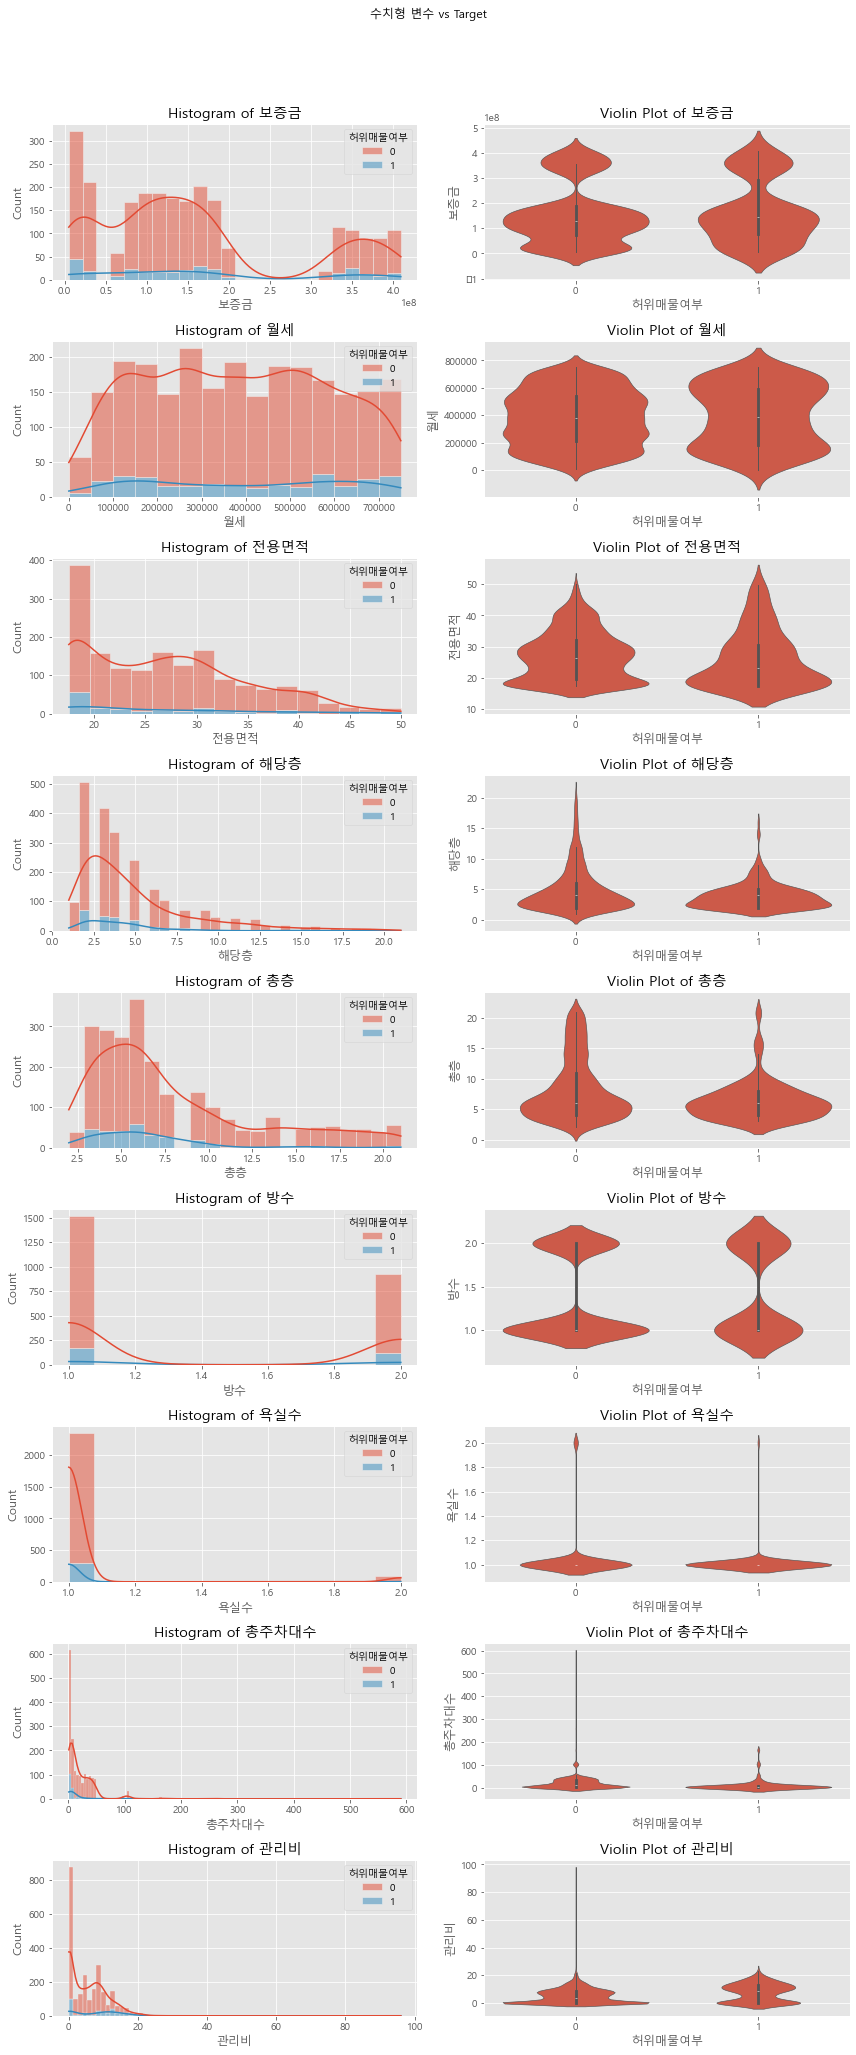

In [35]:
numeric_columns = ['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비']

fig, axs = plt.subplots(len(numeric_columns), 2, figsize=(12, 30))
fig.suptitle('수치형 변수 vs Target')

for i, col in enumerate(numeric_columns):

    # 히스토그램(Histogram)
    sns.histplot(train, x=col, hue='허위매물여부', multiple="stack", ax=axs[i,0], kde=True, element="bars")
    axs[i,0].set_title(f'Histogram of {col}')
    
    # 바이올린 플롯(Violin Plot)
    sns.violinplot(x='허위매물여부', y=col, data=train, ax=axs[i,1])
    axs[i,1].set_title(f'Violin Plot of {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

보증금

보증금의 경우 0.5미만일떄 가장 많은 값이 분포하고 있으며 2와 3사이에는 매물이 분포하지 않는다.
전체 매물의 분포에 따라서 거의 비슷한 비율로 허위매물이 존재하는 것을 확인할 수 있다.

월세

월세는 양쪽으로는 적고 중심부분에서 매물의 수가 많다. 반면, 허위매물의 비율은 중심부분에서 살짝 낮아지는 것을 확인할 수 있다.

전용면적

매물수는 전용면적이 넓어짐에따라 매물수가 적어지는데, 허위매물의 비율은 매물수보다 좀 더 드라마틱하게 변한다. 허위매물의 비율은 전용면적이 좁을때가 가장 많고, 전용면적이 넓어짐에 따라 더 급격히 비율이 줄어든다.

해당층 

해당층은 2일때가 가장 매물수가 많으며, 해당층이 높아질수록 매물수가 줄어든다. 허위매물의 비율은 해당층이 10층 이상으로 넘어가면 급격히 줄어든다. 허위매물의 비율이 가장 높은 구간은 해당층이 5층보다 낮을때이다. 해당층은 적당히 범주화가 필요하다고 생각한다.

총층

총층 피처에서 매물수는 해당층 보다 더 윗 구간이 넓은 분포를 가지고 있다. 해당층의 경우 10층을 넘어가는 매물이 거의 없지만, 총층은 10층을 넘어가는 매물의 수도 상당히 많다. 그에 따라 허위매물의 비율은 총층에서 10층까지는 꽤 많이 분포하고, 마찬가지로 해당층과는 다르게 10층보다 높은 곳에서도 몇몇 발견된다.

방수

방수가 1개일때의 매물이 방수가 2개일때 보다 2배 정도 많고, 허위매물의 비율은 거의 비슷하다.

욕실수

욕실수는 2개일때 매물의 수가 거의 없다. 또한 허위매물의 비율이 욕실수가 2일때는 거의 없는 것을 확인할 수 있다.

총주차대수 

주차대수가 0에 가까울수록 매물수가 많고, 총주차대수가 많아짐에따라 급격히 적어진다. 허위매물의 비율은 총주차대수가 200보다 낮을때 까지만 분포하고, 거의 0에 가까울때 대부분의 허위매물이 존재한다.

관리비 

관리비가 0에 가까울때 대부분의 매물이 위치한다. 그리고 낮아지는 분포인데, 중간에 10 부근에서 매물수가 잠깐 증가한다. 허위매물의 비율도 이와 유사한데, 매물수보다 좀더 굴곡진 분포를 가지고 있다.

## 9) 게재일과 Target(허위매물여부)의 분포

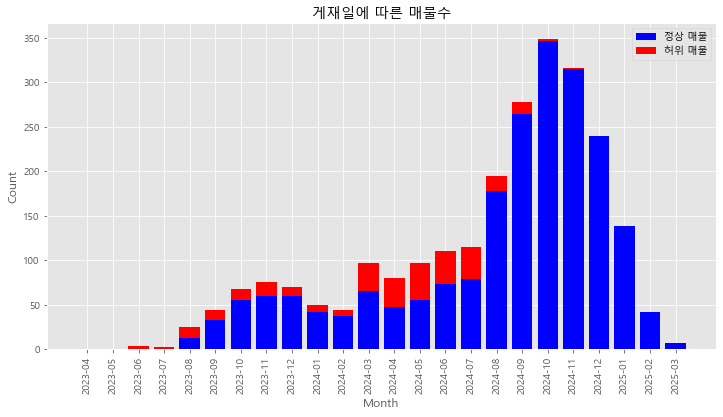

In [36]:
train = train.set_index("게재일")

monthly_counts = train.resample('M').size()
monthly_fake_counts = train.resample('M')["허위매물여부"].sum()

plt.figure(figsize=(12, 6))

plt.bar(range(len(monthly_counts)), monthly_counts - monthly_fake_counts, label="정상 매물", color="blue")
plt.bar(range(len(monthly_counts)), monthly_fake_counts, label="허위 매물", color="red", 
        bottom=monthly_counts - monthly_fake_counts)

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("게재일에 따른 매물수")
plt.xticks(ticks=range(len(monthly_counts)), labels=monthly_counts.index.strftime('%Y-%m'), rotation=90)
plt.legend()

plt.show()

In [37]:
monthly_counts = train.groupby([train.index.year, train.index.month]).size().to_frame(name="매물수")
monthly_mean = train.groupby([train.index.year, train.index.month])["허위매물여부"].mean().to_frame(name="허위매물비율")

result = monthly_counts.merge(monthly_mean, left_index=True, right_index=True)
result

매물수    허위매물비율
게재일  게재일               
2023 4      1  1.000000
     5      1  1.000000
     6      4  1.000000
     7      3  1.000000
     8     25  0.480000
     9     44  0.250000
     10    68  0.176471
     11    76  0.210526
     12    70  0.142857
2024 1     50  0.160000
     2     44  0.159091
     3     97  0.319588
     4     80  0.400000
     5     97  0.432990
     6    111  0.342342
     7    115  0.313043
     8    195  0.087179
     9    278  0.046763
     10   349  0.008596
     11   316  0.003165
     12   240  0.000000
2025 1    139  0.000000
     2     42  0.000000
     3      7  0.000000

특정 일을 기준으로 매물 전체가 허위매물이고, 전체가 허위매물이 아닌 구간이 있다.

2024년 8월을 기점으로 허위매물의 비율이 현저히 낮아졌으며, 그전까지는 매우 높은 허위매물 비율을 보인다. 2024년 3월부터 2024년 7월까지는 허위매물의 비율이 0.3-0.4정도로 상당히 높다.
또한 2023년 10월부터 2024년 2월까지는 0.1-0.2정도로 낮은 비율을 보인다.

적절히 범주화하는 것이 중요해 보인다.

In [38]:
train = train.drop_duplicates().reset_index(drop=False)

# 결측값 처리

## 1) 결측값 분포의 시각화

In [39]:
train_miss_frame = train[train.columns[train.isnull().any(axis=0)]]

train_miss = pd.DataFrame({
    'missing': train_miss_frame.isnull().sum(),
    'ratio': np.round(train_miss_frame.isnull().sum() / train_miss_frame.shape[0], 4) * 100
})

display(train_miss)

,missing,ratio
전용면적,787,32.10
해당층,229,9.34
총층,16,0.65
방수,16,0.65
욕실수,18,0.73
총주차대수,696,28.38


결측치의 비율은 다음과 같다. 전체 엔트리 2452개 중에서 전용면적이 32.1퍼센트로 가장 많은 결측치의 비율을 갖는다. 그다음으로는 총주차대수, 해당층이며 총층과 방수 욕실수는 결측치의 비율이 매우 적다.

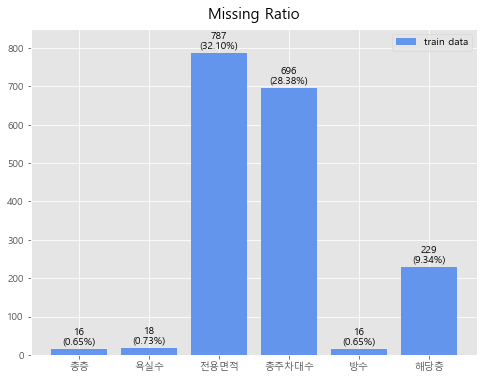

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.35

train_miss_col = ['총층','욕실수','전용면적','총주차대수','방수','해당층']

x = np.arange(len(train_miss_col))

y1 = train_miss['missing'].sort_index()
y1_ = train_miss['ratio'].sort_index()

bar1 = ax.bar(x, y1, label="train data", color="cornflowerblue")
ax.set_ylim(0, 850)
ax.set_xticks(x, train_miss_col)

ax.bar_label(bar1, padding=12, size=10)
ax.bar_label(bar1, labels=['(%.2f%%)' % y for y in y1_], padding=3, size=10)
ax.set_title("Missing Ratio", pad=10, size=15)
ax.legend(loc='best', fontsize=10)

plt.show()

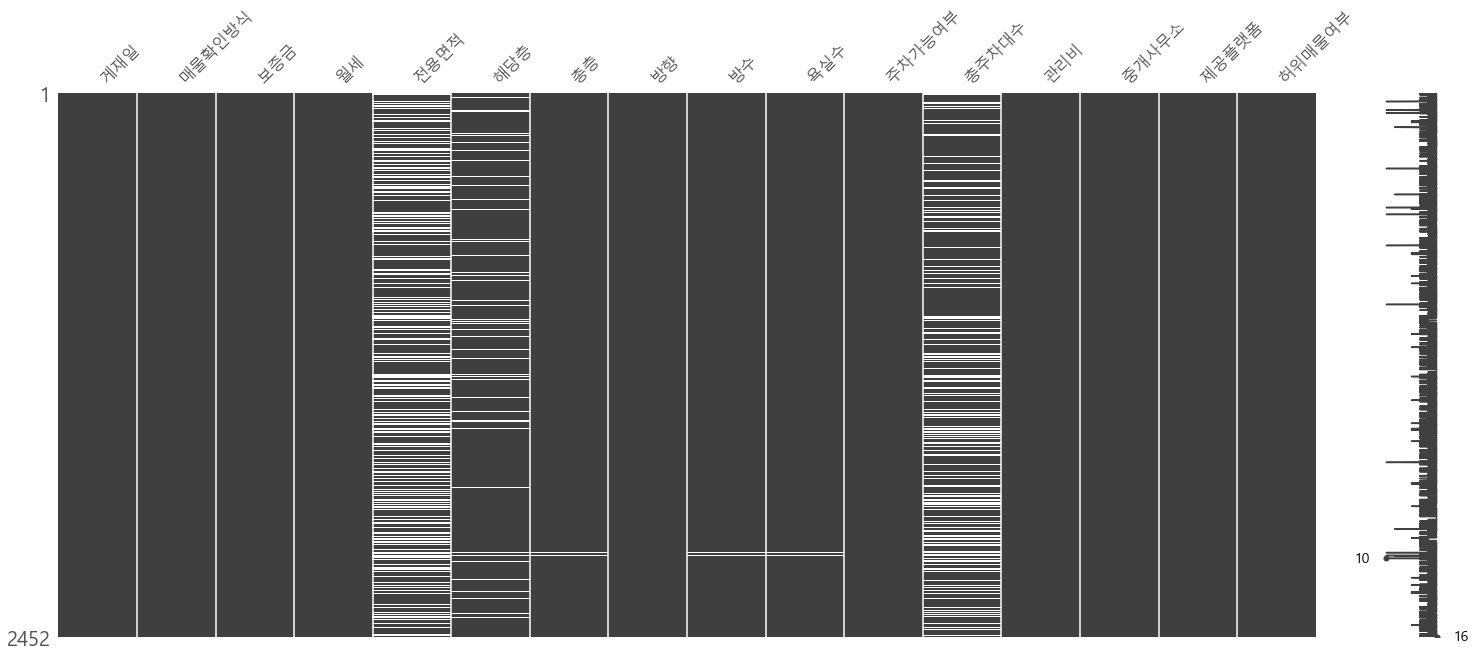

In [41]:
import missingno as msno
msno.matrix(train)
plt.show()

총층과 방수 욕실수에서 결측치가 유사한 행에서 발생하는 것을 볼 수 있다.

이를 확인해보자.

In [42]:
train[train["욕실수"].isnull()]

,게재일,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,허위매물여부
37,2024-10-06,현장확인,25000000.0,520000,NaN,NaN,NaN,동향,NaN,NaN,불가능,NaN,4,k74XT0T1B8,D플랫폼,0
76,2025-01-04,전화확인,81000000.0,70000,NaN,NaN,NaN,남향,NaN,NaN,불가능,NaN,0,K48zc2G4K8,D플랫폼,0
88,2025-01-16,현장확인,151000000.0,50000,NaN,NaN,NaN,서향,NaN,NaN,불가능,NaN,0,M02bn7Y4P0,D플랫폼,0
153,2024-08-29,현장확인,167000000.0,380000,NaN,NaN,NaN,동향,NaN,NaN,가능,1.0,0,c14YI4Z7E6,D플랫폼,0
163,2024-09-30,현장확인,128000000.0,360000,NaN,2.0,5.0,북동향,1.0,NaN,가능,1.0,0,l96pE8X9A9,D플랫폼,0
339,2025-01-13,서류확인,194000000.0,360000,NaN,NaN,NaN,남향,NaN,NaN,불가능,NaN,0,M02bn7Y4P0,D플랫폼,0
456,2024-10-15,전화확인,65500000.0,100000,NaN,NaN,NaN,북서향,NaN,NaN,가능,4.0,9,l84az9J6A2,C플랫폼,0
515,2024-07-25,전화확인,189500000.0,500000,NaN,NaN,NaN,북서향,NaN,NaN,불가능,NaN,0,M02bn7Y4P0,D플랫폼,0
546,2024-11-07,서류확인,116000000.0,180000,NaN,NaN,NaN,남동향,NaN,NaN,불가능,NaN,9,o07ZC4L7V4,C플랫폼,0
686,2024-08-15,현장확인,181500000.0,520000,NaN,NaN,NaN,서향,NaN,NaN,불가능,NaN,0,M02bn7Y4P0,D플랫폼,0


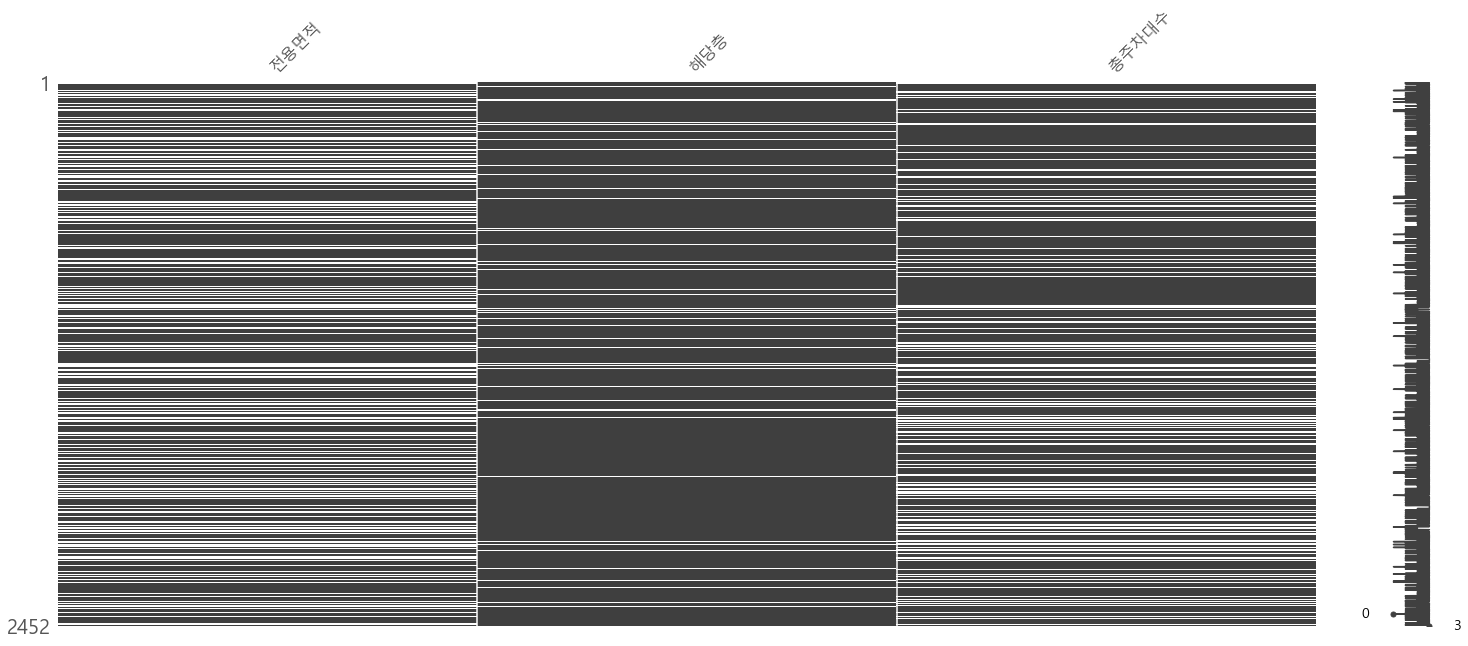

In [43]:
msno.matrix(train[["전용면적","해당층","총주차대수"]])
plt.show()

먼저 욕실수, 방수, 총층의 결측치는 유사한 행에서 발생했다. 모든 방수의 결측치는 총층의 결측치와 같은행이였으며, 방수와 총층이 결측치인경우에는 욕실수도 결측치가 발생했다. 전제 데이터의 엔트리수에 비해 현저히 적은양의 결측치이므로 제거해주는 것이 좋을것이라 판단된다.

또한, 상대적으로 결측치의 수가 많은 전용면적, 총주차대수, 해당층의 경우 결측치를 적절하게 채우는 방식으로 진행할 것이다.

## 2) '욕실수', '방수', '총층' 피처의 결측치 제거

해당 피처들의 타겟과의 상관계수는 0.1정도로 매우 크지 않으며, 결측치가 발생할때의 특정 패턴이 존재한다고 보기 어렵고 이로인해 랜덤하게 발생한 결측치라고 판단되었다. 따라서 해당 행들을 제거하여 주자.

In [44]:
train_origin = pd.read_csv('train.csv')

In [45]:
train_origin = train_origin.dropna(subset=["욕실수"])

## 3) "전용면적","해당층","총주차대수" 피처의 결측치 대체

### (1) 결측치 여부 피처 추가

결측치를 대체하기 이전에, 해당 피처들의 결측치 자체에 의미가 있는지 확인해 보자.

In [46]:
print(train_origin[train_origin["전용면적"].isnull()]["허위매물여부"].mean())
print(train_origin[~train_origin["전용면적"].isnull()]["허위매물여부"].mean())

0.17532467532467533
0.09555288461538461


먼저 전용면적 피처의 경우, 전용면적이 결측치일때와 아닐때 허위매물의 비율이 0.17과 0.095로 유의미한 차이를 보였다. 따라서 "전용면적_결측여부" 피처를 추가해 주도록 하자.

In [47]:
print(train_origin[train_origin["해당층"].isnull()]["허위매물여부"].mean())
print(train_origin[~train_origin["해당층"].isnull()]["허위매물여부"].mean())

0.23113207547169812
0.11026102610261027


마찬가지로 해당층 피처도 결측치일때와 아닐때의 허위매물의 비율이 0.23과 0.11로 유의미한 차이를 보인다. 따라서 "해당층_결측여부" 피처도 추가해 주도록 하자.

In [48]:
print(train_origin[train_origin["총주차대수"].isnull()]["허위매물여부"].mean())
print(train_origin[~train_origin["총주차대수"].isnull()]["허위매물여부"].mean())

0.17251461988304093
0.10057142857142858


총주차대수 피처도 결측치일때와 아닐때 허위매물의 비율이 0.17과 0.1정도로 유의미한 차이를 보이기 때문에 "총주차대수" 피처도 추가해주자.

In [49]:
train_origin["전용면적_결측여부"] = train_origin["전용면적"].isnull().astype(int)
train_origin["해당층_결측여부"] = train_origin["해당층"].isnull().astype(int)
train_origin["총주차대수_결측여부"] = train_origin["총주차대수"].isnull().astype(int)

In [50]:
train_origin.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,1,1,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0,1,0,1
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0,1,0,1
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,0,0,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1,1,0,1


### (2) 랜덤포레스트를 통해 세 피처의 결측치 대체

순서는 target("허위매물여부") 와의 상관계수가 큰 순서대로 진행한다.

결측여부 피처는 우선적으로 제외한 뒤 대체한다.

총주차대수 : -0.1

해당층 : -0.09

전용면적 : -0.04

In [51]:
# 결측치를 채우는 함수 정의
from sklearn.ensemble import RandomForestRegressor

def fill_missing_values(df, target_col):

    df_no_nan = df[df[target_col].notnull()] 
    df_nan = df[df[target_col].isnull()]
    
    numeric_columns = df_no_nan.select_dtypes(include=['int', 'float']).columns.tolist()

    X_train = df_no_nan[numeric_columns].drop([target_col], axis=1)
    y_train = df_no_nan[target_col]
    
    X_valid = df_nan[numeric_columns].drop([target_col], axis=1)
    y_valid = df_nan[target_col]

    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    predicted_value = model.predict(X_valid)
    
    df_nan[target_col] = predicted_value
    
    df = pd.concat([df_no_nan,df_nan])
    
    return df

먼저 결측여부들에 대한 컬럼들을 따로 분리해 새로운 데이터프레임을 따로 생성하고, train_origin에서는 해당 컬럼들을 제거

In [52]:
train_if_missing = train_origin[["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"]]

In [53]:
train_origin = train_origin.drop(["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"], axis=1)

In [54]:
train_origin.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [55]:
train_origin = fill_missing_values(train_origin, "총주차대수")

In [56]:
train_origin = fill_missing_values(train_origin, "해당층")

In [57]:
train_origin.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
8,TRAIN_0008,현장확인,120500000.0,440000,31.55,1.0,2.0,북향,2.0,2.0,가능,18.0,3,G52Iz8V2B9,B플랫폼,2024-05-23,0
9,TRAIN_0009,현장확인,79500000.0,260000,39.66,2.0,3.0,남동향,2.0,1.0,불가능,2.0,0,M90Ph8W9V3,B플랫폼,2024-11-30,0
10,TRAIN_0010,현장확인,187500000.0,390000,23.69,1.0,15.0,남향,1.0,1.0,불가능,15.0,5,G52Iz8V2B9,A플랫폼,2023-12-16,0
11,TRAIN_0011,서류확인,91500000.0,750000,31.32,9.0,15.0,북동향,2.0,2.0,가능,44.0,8,G52Iz8V2B9,B플랫폼,2024-03-25,0


In [58]:
train_origin = fill_missing_values(train_origin, "전용면적")

In [59]:
train_origin = pd.concat([train_origin,train_if_missing], axis=1).sort_index()

In [60]:
train_origin.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부
0,TRAIN_0000,현장확인,402500000.0,470000,23.839319,8.179642,15.0,서향,1.0,1.0,가능,40.000000,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,1,1,0
1,TRAIN_0001,현장확인,170500000.0,200000,46.167216,3.000000,4.0,남동향,2.0,1.0,불가능,2.182833,0,q39iV5J4E6,D플랫폼,2024-12-26,0,1,0,1
2,TRAIN_0002,전화확인,114000000.0,380000,23.558431,2.000000,3.0,동향,1.0,1.0,불가능,1.071744,0,b03oE4G3F6,A플랫폼,2024-11-28,0,1,0,1
3,TRAIN_0003,현장확인,163500000.0,30000,36.300000,3.000000,9.0,남동향,2.0,1.0,가능,13.000000,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,0,0,0
4,TRAIN_0004,현장확인,346000000.0,530000,44.841246,3.000000,3.0,동향,2.0,1.0,불가능,1.416809,0,N45gM0M7R0,B플랫폼,2024-06-25,1,1,0,1


In [61]:
train_origin.isnull().sum()

ID            0
매물확인방식        0
보증금           0
월세            0
전용면적          0
해당층           0
총층            0
방향            0
방수            0
욕실수           0
주차가능여부        0
총주차대수         0
관리비           0
중개사무소         0
제공플랫폼         0
게재일           0
허위매물여부        0
전용면적_결측여부     0
해당층_결측여부      0
총주차대수_결측여부    0
dtype: int64

의 방법으로 결측값들이 1차적으로 대체되었다.

### (3) 학습 및 테스트 데이터의 결측값 확인

In [62]:
test_origin = pd.read_csv('test.csv')

In [63]:
test_origin.isnull().sum()

ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64

In [64]:
test_origin = test_origin.dropna(subset=["욕실수"])

In [65]:
test_origin["전용면적_결측여부"] = test_origin["전용면적"].isnull().astype(int)
test_origin["해당층_결측여부"] = test_origin["해당층"].isnull().astype(int)
test_origin["총주차대수_결측여부"] = test_origin["총주차대수"].isnull().astype(int)

In [66]:
test_if_missing = test_origin[["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"]]
test_origin = test_origin.drop(["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"], axis=1)

In [67]:
test_origin = fill_missing_values(test_origin, "총주차대수")
test_origin = fill_missing_values(test_origin, "해당층")
test_origin = fill_missing_values(test_origin, "전용면적")

test_origin = pd.concat([test_origin,test_if_missing], axis=1).sort_index()

test_origin.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부
0,TEST_000,서류확인,223000000.0,530000,20.76963,5.0,5.0,남향,1.0,1.0,불가능,3.690279,7,Z86Th6S3K5,D플랫폼,2024-10-21,1,0,1
1,TEST_001,서류확인,150500000.0,590000,30.26000,7.0,11.0,서향,1.0,1.0,불가능,16.000000,11,G52Iz8V2B9,D플랫폼,2023-09-02,0,0,0
2,TEST_002,현장확인,47000000.0,200000,41.50000,2.0,3.0,남서향,2.0,1.0,불가능,10.102166,0,N45gM0M7R0,B플랫폼,2024-04-03,0,0,1
3,TEST_003,서류확인,133000000.0,250000,31.35000,5.0,6.0,남향,2.0,1.0,가능,12.450360,5,C41wx1K6U9,B플랫폼,2024-09-19,0,0,1
4,TEST_004,현장확인,108000000.0,380000,23.14000,2.0,3.0,남향,1.0,1.0,불가능,15.479120,0,Z68ZJ6F6L4,A플랫폼,2024-11-10,0,0,1


In [68]:
test_origin.isnull().sum()

ID            0
매물확인방식        0
보증금           0
월세            0
전용면적          0
해당층           0
총층            0
방향            0
방수            0
욕실수           0
주차가능여부        0
총주차대수         0
관리비           0
중개사무소         0
제공플랫폼         0
게재일           0
전용면적_결측여부     0
해당층_결측여부      0
총주차대수_결측여부    0
dtype: int64

같은 방식으로 테스트 데이터의 결측값들도 모두 대체 되었다.

# 이상치 처리

## 1) 이상치 검출과 시각화

이상치를 검출하기에 앞서, 결측치를 처리하기전 데이터를 사용할지 처리한 후의 데이터를 사용할지 결정

In [69]:
train = pd.read_csv('train.csv')

In [70]:
train = train.drop(["ID"], axis=1)

In [71]:
# 퀀타일 함수와 IQR 계산 함수

def out_iqr(df, column):

    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr = q75 - q25
    lower, upper = q25 - (iqr * 1.5), q75 + (iqr * 1.5)

    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    total_outliers = df1.shape[0] + df2.shape[0]

    return iqr, lower, upper, total_outliers

In [72]:
check_columns = ['보증금', '해당층', '총층', '욕실수', '총주차대수', '관리비']

결측치를 포함하지않은 보증금 피처의 iqr값은 114000000.0, 하한값은 -96000000.0, 상한값은 360000000.0, 이상치의 갯수는 279입니다.
결측치를 대체한 보증금 피처의 iqr값은 114000000.0, 하한값은 -96000000.0, 상한값은 360000000.0, 이상치의 갯수는 277입니다.
결측치를 포함하지않은 해당층 피처의 iqr값은 4.0, 하한값은 -4.0, 상한값은 12.0, 이상치의 갯수는 104입니다.
결측치를 대체한 해당층 피처의 iqr값은 3.952956435642742, 하한값은 -3.8823910891068545, 상한값은 11.929434653464114, 이상치의 갯수는 149입니다.
결측치를 포함하지않은 총층 피처의 iqr값은 6.0, 하한값은 -5.0, 상한값은 19.0, 이상치의 갯수는 95입니다.
결측치를 대체한 총층 피처의 iqr값은 6.0, 하한값은 -5.0, 상한값은 19.0, 이상치의 갯수는 95입니다.
결측치를 포함하지않은 욕실수 피처의 iqr값은 0.0, 하한값은 1.0, 상한값은 1.0, 이상치의 갯수는 84입니다.
결측치를 대체한 욕실수 피처의 iqr값은 0.0, 하한값은 1.0, 상한값은 1.0, 이상치의 갯수는 84입니다.
결측치를 포함하지않은 총주차대수 피처의 iqr값은 27.0, 하한값은 -36.5, 상한값은 71.5, 이상치의 갯수는 60입니다.
결측치를 대체한 총주차대수 피처의 iqr값은 20.0, 하한값은 -27.0, 상한값은 53.0, 이상치의 갯수는 71입니다.
결측치를 포함하지않은 관리비 피처의 iqr값은 9.0, 하한값은 -13.5, 상한값은 22.5, 이상치의 갯수는 7입니다.
결측치를 대체한 관리비 피처의 iqr값은 9.0, 하한값은 -13.5, 상한값은 22.5, 이상치의 갯수는 7입니다.


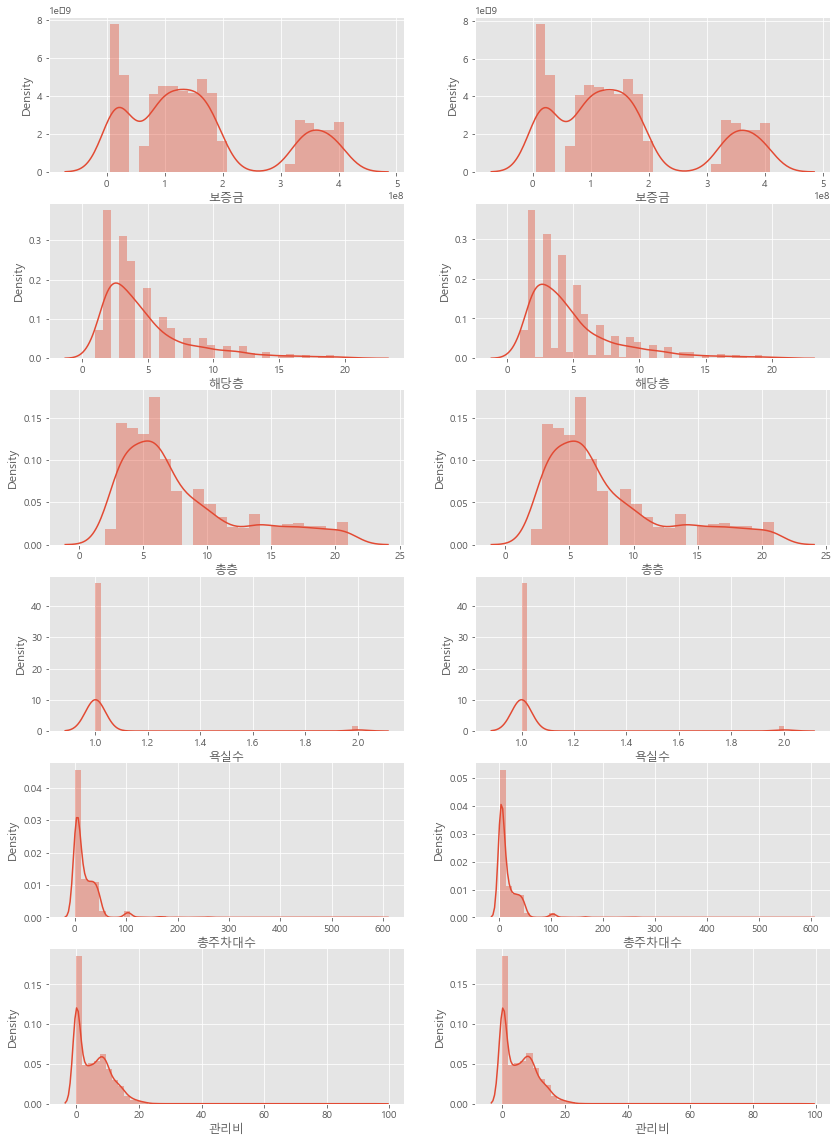

In [73]:
fig, axes = plt.subplots(len(check_columns), 2, figsize=(14, 20))

for i, col in enumerate(check_columns):
    
    train_cleaned = train.dropna(subset=[col])
    iqr_null, lower_null, upper_null, total_outliers_null = out_iqr(train_cleaned, col)
    sns.distplot(train_cleaned[col], kde=True, ax=axes[i,0])
    
    iqr_not_null, lower_not_null, upper_not_null, total_outliers_not_null = out_iqr(train_origin, col)
    sns.distplot(train_origin[col], kde=True, ax=axes[i,1])
    

    print(f'결측치를 포함하지않은 {col} 피처의 iqr값은 {iqr_null}, 하한값은 {lower_null}, 상한값은 {upper_null}, 이상치의 갯수는 {total_outliers_null}입니다.')
    print(f'결측치를 대체한 {col} 피처의 iqr값은 {iqr_not_null}, 하한값은 {lower_not_null}, 상한값은 {upper_not_null}, 이상치의 갯수는 {total_outliers_not_null}입니다.')
    
plt.show()

보증금 피처 

-> iqr, 하한값, 상한값에는 차이가 없으며 이상치의 개수는차이가 없다.

해당층 피처

-> iqr, 하한값, 상한값에는 차이가 크게 없으며 이상치의 개수가 45개 증가하였다.
-> 결측치 보완 전과 후에 플랏의 전체적인 형태에 큰 차이는 없어 보인다.

총층 피처 

-> iqr, 하한값, 상한값 이상치에는 차이가 없었다.(결측치를 제거함)

욕실수 피처 

-> 마찬가지로 모두 제거했기때문에 차이가 없음.

총주차대수 피처 

-> iqr, 상한값, 하한값에 큰 차이가 있었으며, 이상치의 갯수가 11개 늘었다.(확인필요)
-> 결측치 보완 후 총주차대수가 0에 가까운 값의 밀도가 0.03에서 0.04로 크게 증가하였다. 그 외에는 플랏에 큰 변화는 없었음. 따라서 모든값들이 다 작아졌으며, 이상치가 증가한것으로 보인다.

관리비 피처 

-> iqr, 상한값, 하한값, 이상치갯수에 차이가 없음.

## 2) 이상치 처리를  위한 데이터 변환 및 왜도 시각화

In [74]:
from scipy import stats

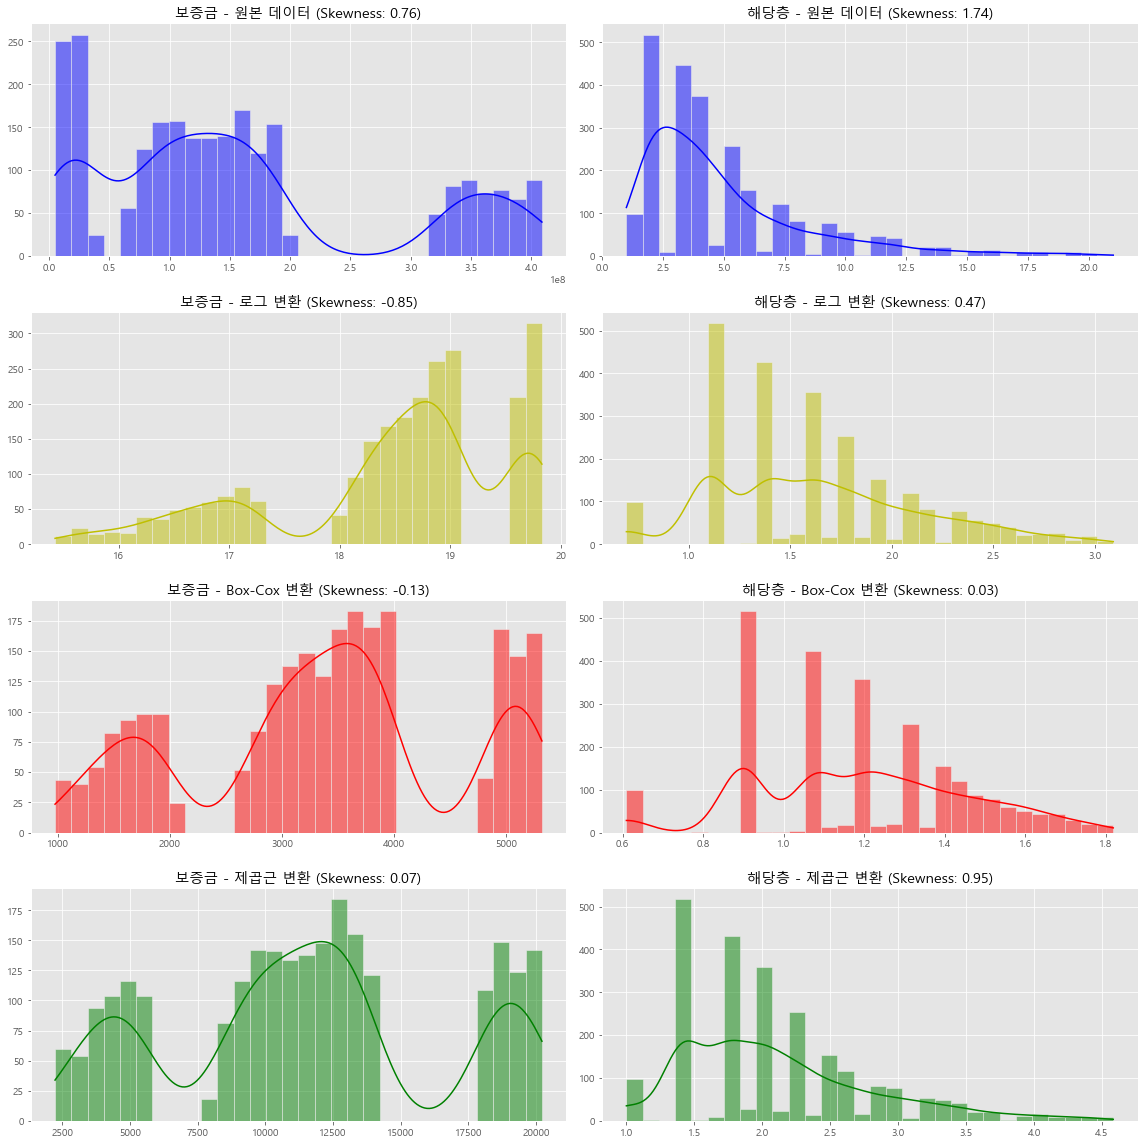

In [75]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
check_columns = ['보증금', '해당층']
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 2, figsize=(16,16))

for i, col in enumerate(check_columns):
    
    log_data = np.log1p(train_origin[col])
    # box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
    boxcox_data = pd.Series(stats.boxcox(train_origin[col]+1)[0])
    # 제곱근 변환
    sqrt_data = np.sqrt(train_origin[col])
    data_list = [train_origin[col], log_data, boxcox_data, sqrt_data]

    # 시각화
    for j, data in enumerate(data_list):
        sns.histplot(data, kde=True, ax=axes[j,i], color=colors[j], bins=30)
        axes[j, i].set_title(f"{check_columns[i]} - {transformations[j]} (Skewness: {data.skew():.2f})")
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')

plt.tight_layout()
plt.show()

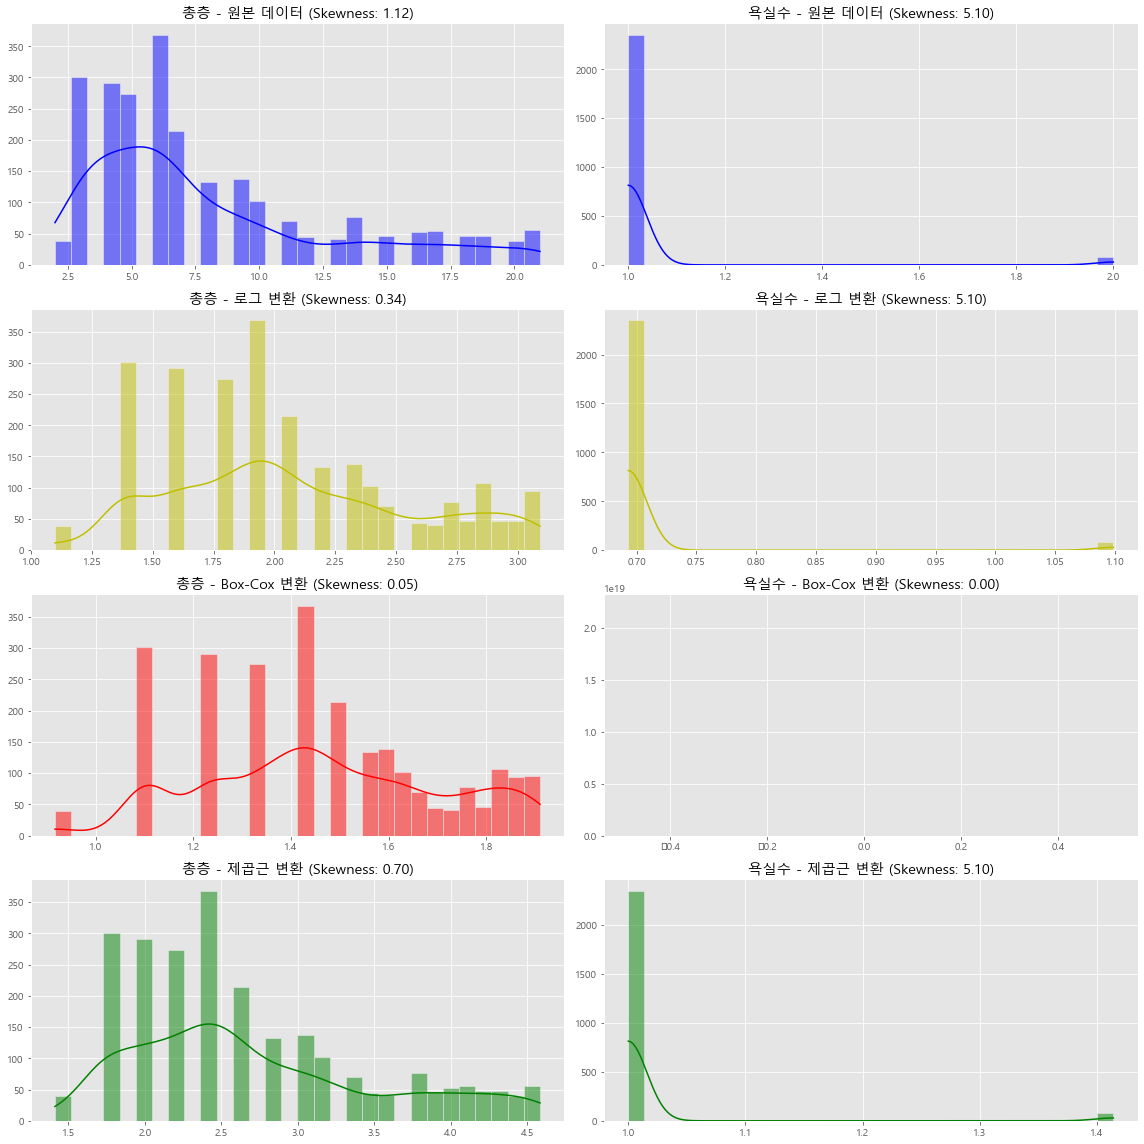

In [76]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
check_columns =  ['총층', '욕실수']
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 2, figsize=(16,16))

for i, col in enumerate(check_columns):
    
    log_data = np.log1p(train_origin[col])
    # box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
    boxcox_data = pd.Series(stats.boxcox(train_origin[col]+1)[0])
    # 제곱근 변환
    sqrt_data = np.sqrt(train_origin[col])
    data_list = [train_origin[col], log_data, boxcox_data, sqrt_data]

    # 시각화
    for j, data in enumerate(data_list):
        sns.histplot(data, kde=True, ax=axes[j,i], color=colors[j], bins=30)
        axes[j, i].set_title(f"{check_columns[i]} - {transformations[j]} (Skewness: {data.skew():.2f})")
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')

plt.tight_layout()
plt.show()

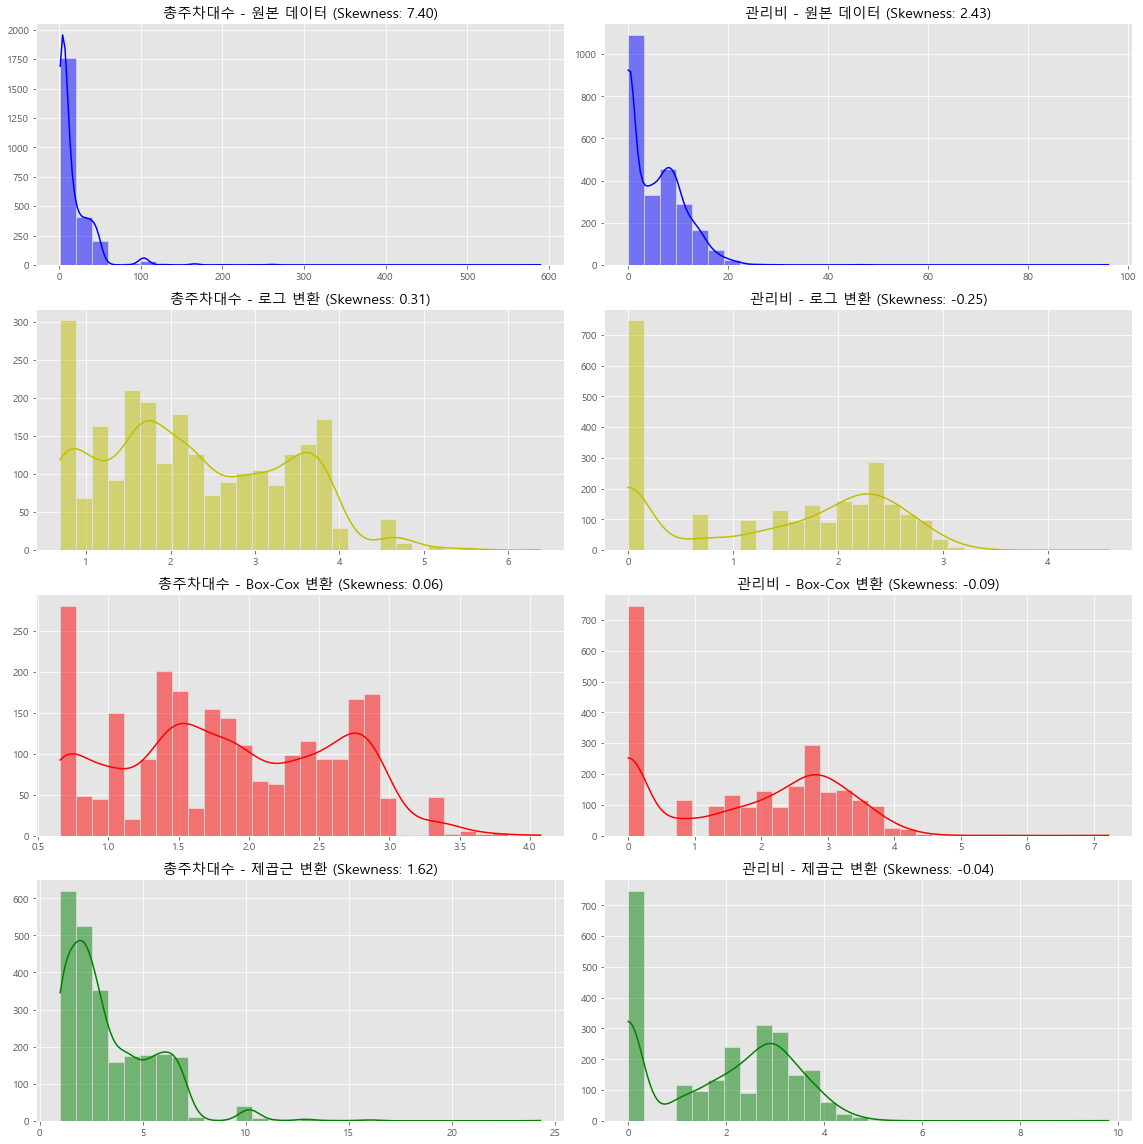

In [77]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
check_columns = ['총주차대수', '관리비']
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 2, figsize=(16,16))

for i, col in enumerate(check_columns):
    
    log_data = np.log1p(train_origin[col])
    # box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
    boxcox_data = pd.Series(stats.boxcox(train_origin[col]+1)[0])
    # 제곱근 변환
    sqrt_data = np.sqrt(train_origin[col])
    data_list = [train_origin[col], log_data, boxcox_data, sqrt_data]

    # 시각화
    for j, data in enumerate(data_list):
        sns.histplot(data, kde=True, ax=axes[j,i], color=colors[j], bins=30)
        axes[j, i].set_title(f"{check_columns[i]} - {transformations[j]} (Skewness: {data.skew():.2f})")
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')

plt.tight_layout()
plt.show()

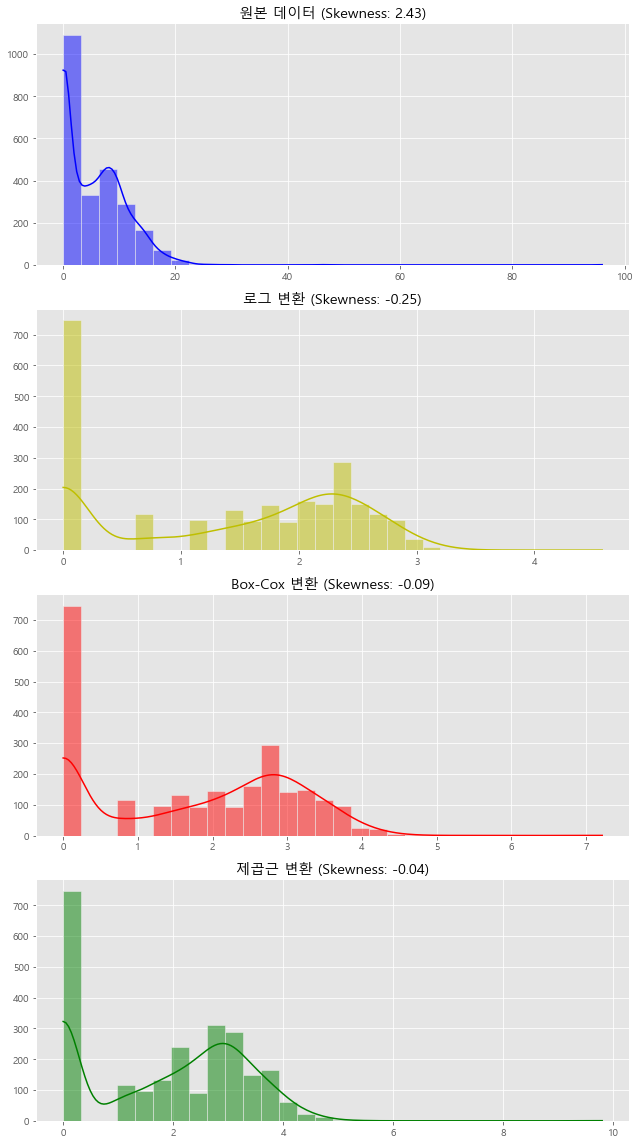

In [78]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
check_columns = ['전용면적']
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 1, figsize=(9,16))

log_data = np.log1p(train_origin[col])
# box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
boxcox_data = pd.Series(stats.boxcox(train_origin[col]+1)[0])
# 제곱근 변환
sqrt_data = np.sqrt(train_origin[col])
data_list = [train_origin[col], log_data, boxcox_data, sqrt_data]

# 시각화
for i, data in enumerate(data_list):
    sns.histplot(data, kde=True, ax=axes[i], color=colors[i], bins=30)
    axes[i].set_title(f"{transformations[i]} (Skewness: {data.skew():.2f})")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

보증금 피처의 경우 원본 데이터의 왜도는 0.76이였고, 
제곱근 변환을 했을때의 왜도가 0.07로 가장 낮다. 그다음이 box-cox로 -0.13이다.

해당층 피처의 경우 원본 데이터의 왜도는 1.74로 낮은층에 대부분의 매물이 몰려있다.
box-cox 변환을 했을때의 왜도는 0.03으로 매우 낮아진다. 그다음은 로그변환으로 0.47이다.

총층 피처의 원본 데이터 왜도는 1.12로 마찬가지로 낮은 층에 많은 매물이 몰려있지만 고른 분포를 가지고 있다.
box-cox 변환시의 왜도는 0.05, 다음이 로그변환으로 0.34의 값을 갖는다.

욕실수 피처의 경우 원본과 변환시 모두 5.1의 왜도를 갖는다.

총주차대수 피처의 경우 원본데이터의 왜도가 7.4로 매우 큰 값을 값을 갖는다.
box-cox 변환시의 왜도는 0.06, 로그변환시의 왜도는 0.31이다.

관리비 피처의 경우 원본 데이터의 왜도가 2.43, 제곱근변환시의 왜도는 -0.04, box-cox변환시의 왜도는 -0.09이다.

### 3) Z-score를 사용한 이상치의 검출과 시각화

In [79]:
def find_and_plot_zscore_outliers(data, threshold):
    z_scores = (data - data.mean()) / data.std()
    outliers = data[abs(z_scores) > threshold]
    return f"Total number of outliers are {len(outliers)}"

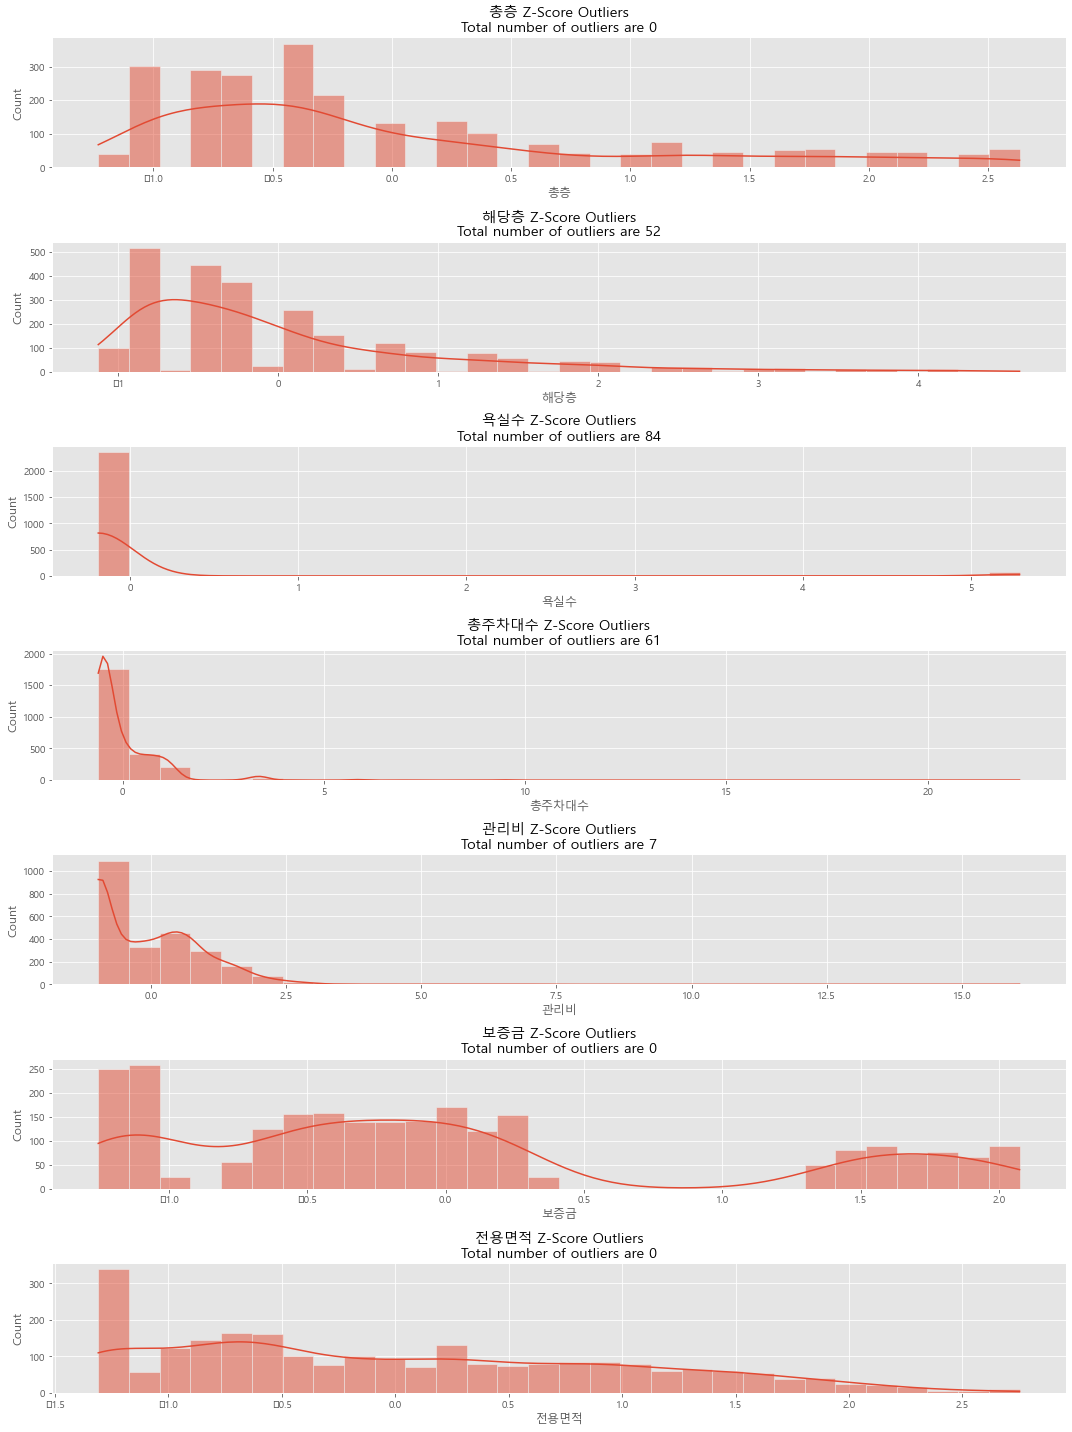

In [80]:
# 시각화
fig, axis = plt.subplots(7, 1, figsize=(15, 20))

total_floor = find_and_plot_zscore_outliers(train_origin['총층'], threshold=3)
floor = find_and_plot_zscore_outliers(train_origin['해당층'], threshold=3)
bathrooms = find_and_plot_zscore_outliers(train_origin['욕실수'], threshold=3)
parking = find_and_plot_zscore_outliers(train_origin['총주차대수'], threshold=3)
cost = find_and_plot_zscore_outliers(train_origin['관리비'], threshold=3)
deposit = find_and_plot_zscore_outliers(train_origin['보증금'], threshold=3)
area = find_and_plot_zscore_outliers(train_origin['전용면적'], threshold=3)


axis[0].set_title('총층 Z-Score Outliers\n' + total_floor)
axis[1].set_title('해당층 Z-Score Outliers\n' + floor)
axis[2].set_title('욕실수 Z-Score Outliers\n' + bathrooms)
axis[3].set_title('총주차대수 Z-Score Outliers\n' + parking)
axis[4].set_title('관리비 Z-Score Outliers\n' + cost)
axis[5].set_title('보증금 Z-Score Outliers\n' + deposit)
axis[6].set_title('전용면적 Z-Score Outliers\n' + area)



sns.histplot((train_origin['총층'] - train_origin['총층'].mean()) / train_origin['총층'].std(), ax=axis[0], kde=True, bins=30)
sns.histplot((train_origin['해당층'] - train_origin['해당층'].mean()) / train_origin['해당층'].std(), ax=axis[1], kde=True, bins=30)
sns.histplot((train_origin['욕실수'] - train_origin['욕실수'].mean()) / train_origin['욕실수'].std(), ax=axis[2], kde=True, bins=30)
sns.histplot((train_origin['총주차대수'] - train_origin['총주차대수'].mean()) / train_origin['총주차대수'].std(), ax=axis[3], kde=True, bins=30)
sns.histplot((train_origin['관리비'] - train_origin['관리비'].mean()) / train_origin['관리비'].std(), ax=axis[4], kde=True, bins=30)
sns.histplot((train_origin['보증금'] - train_origin['보증금'].mean()) / train_origin['보증금'].std(), ax=axis[5], kde=True, bins=30)
sns.histplot((train_origin['전용면적'] - train_origin['전용면적'].mean()) / train_origin['전용면적'].std(), ax=axis[6], kde=True, bins=30)

plt.tight_layout()
plt.show()

총층 피처에서는 이상치가 없다.
해당층은 52개의 매물이 이상치로 간주되었다.
욕실수의 경우 84개, 총주차대수에서 61개, 관리비에서 7개, 보증금에서는 0개로 확인되었다.

### 4) DBSCAN을 활용한 이상치 탐지

-1      142
 113     17
 19      15
 0       14
 17      14
       ... 
 420      2
 421      2
 422      2
 423      2
 424      2
Name: count, Length: 426, dtype: int64

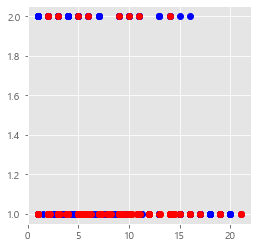

In [81]:
from sklearn.cluster import DBSCAN

X_db = train_origin[['해당층', '욕실수','총주차대수','총층','관리비','보증금']].values

db = DBSCAN(eps=30, min_samples=2).fit(X_db)
labels = db.labels_

display(pd.Series(labels).value_counts())

fig, ax = plt.subplots(figsize=(4,4))
colors = ['blue', 'red']

for color in colors:
    outlier_mask = labels == -1 if color == 'red' else labels != -1
    x = X_db[:, 0][outlier_mask]
    y = X_db[:, 1][outlier_mask]
    ax.plot(x, y, 'o', color=color)
    
plt.show()

In [82]:
outliers = train_origin[labels == -1]
outliers.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부
count,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.919754e+08,380633.802817,23.745840,8.062674,12.823944,1.218310,1.063380,73.013951,7.521127,0.091549,0.105634,0.218310,0.084507
std,1.318487e+08,224199.805735,7.748320,4.680624,5.872522,0.414561,0.244508,69.201286,9.879213,0.289410,0.308456,0.414561,0.279131
min,9.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.512500e+07,162500.000000,17.500000,5.000000,8.000000,1.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.475000e+08,390000.000000,20.352197,7.179272,14.000000,1.000000,1.000000,48.500000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,3.420000e+08,580000.000000,27.412500,11.064282,17.000000,1.000000,1.000000,104.000000,11.000000,0.000000,0.000000,0.000000,0.000000
max,4.075000e+08,750000.000000,48.100000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
train_origin.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부
count,2.434000e+03,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,1.573344e+08,380369.761709,27.960612,4.911883,8.055875,1.377979,1.034511,16.579283,5.495892,0.120789,0.316352,0.087099,0.281019
std,1.213162e+08,206414.069955,7.999572,3.473464,4.920678,0.484982,0.182575,25.732633,5.633135,0.325949,0.465147,0.282039,0.449589
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000e+07,200000.000000,21.490000,2.047044,4.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.325000e+08,380000.000000,26.450000,4.000000,6.000000,1.000000,1.000000,7.662637,5.000000,0.000000,0.000000,0.000000,0.000000
75%,1.890000e+08,550000.000000,34.241049,6.000000,10.000000,2.000000,1.000000,23.000000,9.000000,0.000000,1.000000,0.000000,1.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000,1.000000,1.000000,1.000000


DBSCAN을 통해 142개의 이상치가 식별되었으며, 원본데이터에 비해 극단치들이 많이 포함된 형태를 보이고 있다.

### 5) ExtraTreesClassifier 모델을 사용한 valid 데이터 예측 및 평가

In [84]:
from sklearn.model_selection import train_test_split

train_origin = pd.read_csv('train.csv')
train_data, valid_data = train_test_split(train_origin, test_size=0.2, random_state=42, stratify=train_origin['허위매물여부'])

In [85]:
train_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
55,TRAIN_0055,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,2025-03-02,0
564,TRAIN_0564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,2023-09-10,0
820,TRAIN_0820,전화확인,393000000.0,250000,NaN,2.0,3.0,동향,2.0,1.0,불가능,NaN,0,N00fb8Z9A4,D플랫폼,2024-10-07,0
2395,TRAIN_2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,2023-09-28,0
1809,TRAIN_1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,2024-07-31,0


#### (1) 전처리 - 결측치 제거 / 대체

In [86]:
def impute_missing_occupation(train_data):

    # 욕실수가 결측치인 피처 제거
    train_data = train_data.dropna(subset=["욕실수"])

    # 제거할 컬럼 설정
    cols_to_impute = ['전용면적','해당층','총주차대수']
    
    # 결측치 여부 피처 생성
    train_data["전용면적_결측여부"] = train_data["전용면적"].isnull().astype(int)
    train_data["해당층_결측여부"] = train_data["해당층"].isnull().astype(int)
    train_data["총주차대수_결측여부"] = train_data["총주차대수"].isnull().astype(int)
    
    # 결측치 여부 피처는 나중에 다시 concat
    train_if_missing = train_data[["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"]]
    train_data = train_data.drop(["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"], axis=1)
    
    for i, col in enumerate(cols_to_impute) :
    
        # 결측치가 있는 행과 없는 행의 분리
        train_no_nan = train_data[train_data[col].notnull()]
        train_nan = train_data[train_data[col].isnull()]
        
        # 랜덤 포레스트에 사용할 수치형 데이터 선택
        numeric_columns = train_no_nan.select_dtypes(include=['int', 'float']).columns.tolist()
        
        # 모델 학습
        X_train = train_no_nan[numeric_columns].drop([col], axis=1)
        y_train = train_no_nan[col]
    
        X_valid = train_nan[numeric_columns].drop([col], axis=1)
        y_valid = train_nan[col]
        
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)
        predicted_value = model.predict(X_valid)
        
        train_nan[col] = predicted_value
        
        train_data = pd.concat([train_no_nan,train_nan])
        
    train_imputed = pd.concat([train_data,train_if_missing], axis=1).sort_index()
    
    return train_imputed

imputed_train = impute_missing_occupation(train_data)

In [87]:
from sklearn.impute import SimpleImputer

In [88]:
def impute_missing_values(imputed_train, valid):
    
    imputed_train_data = imputed_train.copy()
    imputed_valid_data = valid.copy()
    
    imputed_train_data = imputed_train_data.drop(['ID'], axis=1)
    imputed_valid_data = imputed_valid_data.drop(['ID'], axis=1)
    
    # 결측치 여부 피처 생성
    imputed_valid_data["전용면적_결측여부"] = imputed_valid_data["전용면적"].isnull().astype(int)
    imputed_valid_data["해당층_결측여부"] = imputed_valid_data["해당층"].isnull().astype(int)
    imputed_valid_data["총주차대수_결측여부"] = imputed_valid_data["총주차대수"].isnull().astype(int)

    freq_imputer = SimpleImputer(strategy='most_frequent')
    freq_imputer.fit(imputed_train_data[['해당층','총주차대수']])
    imputed_valid_data[['해당층','총주차대수']]= freq_imputer.transform(imputed_valid_data[['해당층','총주차대수']])
    
    median_imputer = SimpleImputer(strategy='median')
    median_imputer.fit(imputed_train_data[['전용면적']])
    imputed_valid_data[['전용면적']] = median_imputer.transform(imputed_valid_data[['전용면적']])

    return imputed_train_data, imputed_valid_data

In [89]:
imputed_train_data, imputed_valid_data = impute_missing_values(imputed_train, valid_data)

In [90]:
imputed_train_data.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부
0,현장확인,402500000.0,470000,21.412540,8.137562,15.0,서향,1.0,1.0,가능,40.000000,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,1,1,0
2,전화확인,114000000.0,380000,24.281994,2.000000,3.0,동향,1.0,1.0,불가능,6.843690,0,b03oE4G3F6,A플랫폼,2024-11-28,0,1,0,1
3,현장확인,163500000.0,30000,36.300000,3.000000,9.0,남동향,2.0,1.0,가능,13.000000,10,G52Iz8V2B9,A플랫폼,2024-11-26,0,0,0,0
4,현장확인,346000000.0,530000,35.744219,3.000000,3.0,동향,2.0,1.0,불가능,3.006634,0,N45gM0M7R0,B플랫폼,2024-06-25,1,1,0,1
5,전화확인,153000000.0,530000,29.500000,2.024930,3.0,남향,2.0,1.0,가능,1.000000,0,Q42YF3Y0I2,A플랫폼,2024-09-12,0,0,1,0


In [91]:
imputed_valid_data.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부
1641,현장확인,125000000.0,100000,29.79,5.0,7.0,동향,2.0,1.0,가능,8.0,0,R20Vy9K9I8,C플랫폼,2024-09-05,0,0,0,0
439,현장확인,153500000.0,10000,30.12,1.0,15.0,동향,2.0,2.0,불가능,4.0,0,G52Iz8V2B9,B플랫폼,2024-10-06,0,0,0,0
1713,전화확인,328000000.0,530000,25.42,2.0,3.0,남향,2.0,1.0,불가능,1.0,0,Q42YF3Y0I2,A플랫폼,2024-09-15,0,0,0,1
1859,서류확인,27500000.0,720000,19.83,2.0,4.0,동향,1.0,1.0,가능,1.0,3,a15xR3G4V0,A플랫폼,2025-01-08,0,0,0,0
2024,전화확인,171000000.0,60000,17.50,2.0,9.0,남서향,1.0,1.0,불가능,8.0,9,f41Wq8P7T9,A플랫폼,2024-09-10,0,0,1,0


#### (2) 전처리 - Datatime형 피처 레이블인코딩

In [92]:
def Datetime_Conversion(train_data, test_data) :
    
    train_data["게재일"] = pd.to_datetime(train_data["게재일"])
    test_data["게재일"] = pd.to_datetime(test_data["게재일"])
    
    # 연도, 월, 요일 정보 추가
    train_data["연도"] = train_data["게재일"].dt.year
    train_data["월"] = train_data["게재일"].dt.month
    train_data["요일"] = train_data["게재일"].dt.dayofweek  # 0=월요일, 6=일요일
    
    test_data["연도"] = test_data["게재일"].dt.year
    test_data["월"] = test_data["게재일"].dt.month
    test_data["요일"] = test_data["게재일"].dt.dayofweek
    
    train_datetime_converted = pd.get_dummies(train_data, columns=['월', '요일'], drop_first=True)
    train_datetime_converted = train_datetime_converted.drop(["게재일"], axis=1)
    
    test_datetime_converted = pd.get_dummies(test_data, columns=['월', '요일'], drop_first=True)
    test_datetime_converted = test_datetime_converted.drop(["게재일"], axis=1)
    
    return train_datetime_converted, test_datetime_converted

train_datetime_converted, test_datetime_converted = Datetime_Conversion(imputed_train_data, imputed_valid_data)

#### (3) 전처리 - 레이블 인코딩

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
def Label_encoding(train_data, test_data):
    
    # 카테고리 수가 많은 중개사무로 피처 제거
    train_data = train_data.drop(["중개사무소"], axis=1)
    test_data = test_data.drop(["중개사무소"], axis=1)
    
    # target 피처 제외
    for col in train_data.columns[0:-1]: 
        if train_data[col].dtypes == 'object':

            le = LabelEncoder()
            train_data[col] = le.fit_transform(train_data[col])

            for label in np.unique(test_data[col]):
                if label not in le.classes_:
                    le.classes_ = np.append(le.classes_, label)
            test_data[col] = le.transform(test_data[col])
    return train_data, test_data

encoded_train, encoded_valid = Label_encoding(train_datetime_converted, test_datetime_converted)

In [95]:
encoded_train.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,...,월_9,월_10,월_11,월_12,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,2,402500000.0,470000,21.412540,8.137562,15.0,7,1.0,1.0,0,...,False,True,False,False,False,True,False,False,False,False
2,1,114000000.0,380000,24.281994,2.000000,3.0,3,1.0,1.0,1,...,False,False,True,False,False,False,True,False,False,False
3,2,163500000.0,30000,36.300000,3.000000,9.0,0,2.0,1.0,0,...,False,False,True,False,True,False,False,False,False,False
4,2,346000000.0,530000,35.744219,3.000000,3.0,3,2.0,1.0,1,...,False,False,False,False,True,False,False,False,False,False
5,1,153000000.0,530000,29.500000,2.024930,3.0,2,2.0,1.0,0,...,True,False,False,False,False,False,True,False,False,False


#### (4) 전처리 - Z-score변환을 통한 이상치 제거

'해당층', '욕실수','총주차대수','총층','관리비','보증금'

In [96]:
Z_encoded_train = encoded_train.copy()
Z_encoded_valid = encoded_valid.copy()

# Train 데이터의 평균, 표준편차 계산
mean_train = Z_encoded_train[['해당층', '욕실수','총주차대수','총층','관리비','보증금']].mean()
std_train = Z_encoded_train[['해당층', '욕실수','총주차대수','총층','관리비','보증금']].std()

# Train 데이터로 Z-점수 계산
Z_encoded_train['z_score_floor'] = (Z_encoded_train['해당층'] - mean_train['해당층']) / std_train['해당층']
Z_encoded_train['z_score_bath'] = (Z_encoded_train['욕실수'] - mean_train['욕실수']) / std_train['욕실수']
Z_encoded_train['z_score_parking'] = (Z_encoded_train['총주차대수'] - mean_train['총주차대수']) / std_train['총주차대수']
Z_encoded_train['z_score_total_floor'] = (Z_encoded_train['총층'] - mean_train['총층']) / std_train['총층']
Z_encoded_train['z_score_cost'] = (Z_encoded_train['관리비'] - mean_train['관리비']) / std_train['관리비']
Z_encoded_train['z_score_deposit'] = (Z_encoded_train['보증금'] - mean_train['보증금']) / std_train['보증금']

# Train 데이터에서 이상치 제거
threshold = 3
train_no_outliers = Z_encoded_train[(Z_encoded_train['해당층'].abs() <= threshold) & (Z_encoded_train['욕실수'].abs() <= threshold) & (Z_encoded_train['총주차대수'].abs() <= threshold) & (Z_encoded_train['총층'].abs() <= threshold) & (Z_encoded_train['관리비'].abs() <= threshold) & (Z_encoded_train['보증금'].abs() <= threshold)]

# Test 데이터에서도 동일한 Z-점수 변환을 적용
Z_encoded_valid['z_score_floor'] = (Z_encoded_valid['해당층'] - mean_train['해당층']) / std_train['해당층']
Z_encoded_valid['z_score_bath'] = (Z_encoded_valid['욕실수'] - mean_train['욕실수']) / std_train['욕실수']
Z_encoded_valid['z_score_parking'] = (Z_encoded_valid['총주차대수'] - mean_train['총주차대수']) / std_train['총주차대수']
Z_encoded_valid['z_score_total_floor'] = (Z_encoded_valid['총층'] - mean_train['총층']) / std_train['총층']
Z_encoded_valid['z_score_cost'] = (Z_encoded_valid['관리비'] - mean_train['관리비']) / std_train['관리비']
Z_encoded_valid['z_score_deposit'] = (Z_encoded_valid['보증금'] - mean_train['보증금']) / std_train['보증금']

#### (5) ExtraTreesClassifier 모델을 사용한 valid 데이터 예측 및 평가 - Z-score변환

In [97]:
Z_encoded_train.columns

Index(['매물확인방식', '보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '주차가능여부',
       '총주차대수', '관리비', '제공플랫폼', '허위매물여부', '전용면적_결측여부', '해당층_결측여부',
       '총주차대수_결측여부', '연도', '월_2', '월_3', '월_4', '월_5', '월_6', '월_7', '월_8',
       '월_9', '월_10', '월_11', '월_12', '요일_1', '요일_2', '요일_3', '요일_4', '요일_5',
       '요일_6', 'z_score_floor', 'z_score_bath', 'z_score_parking',
       'z_score_total_floor', 'z_score_cost', 'z_score_deposit'],
      dtype='object')

In [98]:
from sklearn.metrics import f1_score

def macro_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

# 독립변수 종속변수 분리
train_y = Z_encoded_train['허위매물여부']
train_x = Z_encoded_train.drop(['허위매물여부','보증금','해당층','총층','욕실수','총주차대수','관리비'], axis=1)

valid_y = Z_encoded_valid['허위매물여부']
valid_x = Z_encoded_valid.drop(['허위매물여부','보증금','해당층','총층','욕실수','총주차대수','관리비'], axis=1)

# 모델 학습/예측/평가
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier(random_state=42)
extra.fit(train_x,train_y)
Z_pred = extra.predict(valid_x)
macro_f1_score(valid_y,Z_pred)

0.7638287638287637

Z-score변환 후의 Macro F1 Score는 0.6875596563792554로 나왔다.

#### (6) ExtraTreesClassifier 모델을 사용한 valid 데이터 예측 및 평가 - 로그변환

In [99]:
L_encoded_train = encoded_train.copy()
L_encoded_valid = encoded_valid.copy()

L_encoded_train['log1p_해당층'] = np.log1p(L_encoded_train['해당층'])
L_encoded_train['log1p_욕실수'] = np.log1p(L_encoded_train['욕실수'])
L_encoded_train['log1p_총주차대수'] = np.log1p(L_encoded_train['총주차대수'])
L_encoded_train['log1p_총층'] = np.log1p(L_encoded_train['총층'])
L_encoded_train['log1p_관리비'] = np.log1p(L_encoded_train['관리비'])
L_encoded_train['log1p_보증금'] = np.log1p(L_encoded_train['보증금'])

L_encoded_valid['log1p_해당층'] = np.log1p(L_encoded_valid['해당층'])
L_encoded_valid['log1p_욕실수'] = np.log1p(L_encoded_valid['욕실수'])
L_encoded_valid['log1p_총주차대수'] = np.log1p(L_encoded_valid['총주차대수'])
L_encoded_valid['log1p_총층'] = np.log1p(L_encoded_valid['총층'])
L_encoded_valid['log1p_관리비'] = np.log1p(L_encoded_valid['관리비'])
L_encoded_valid['log1p_보증금'] = np.log1p(L_encoded_valid['보증금'])

# 독립변수 종속변수 분리
train_y = L_encoded_train['허위매물여부']
train_x = L_encoded_train.drop(['허위매물여부','보증금','해당층','총층','욕실수','총주차대수','관리비'], axis=1)

valid_y = L_encoded_valid['허위매물여부']
valid_x = L_encoded_valid.drop(['허위매물여부','보증금','해당층','총층','욕실수','총주차대수','관리비'], axis=1)

extra = ExtraTreesClassifier(random_state=42)
extra.fit(train_x,train_y)
Z_pred = extra.predict(valid_x)
macro_f1_score(valid_y,Z_pred)

0.7565102749253118

로그 변환 후의 macro_f1_score가 0.7414627881589931로 조금 더 높아진 것을 확인할 수 있다.

#### (7) ExtraTreesClassifier 모델을 사용한 valid 데이터 예측 및 평가 - Box-cox변환

In [100]:
B_encoded_train = encoded_train.copy()
B_encoded_valid = encoded_valid.copy()

# Box-Cox 변환을 적용하기 위해 offset 값을 설정
offset = 1  # 0보다 큰 값 (예: 1)으로 설정

# Train 데이터에 Box-Cox 변환 적용
train_floor_boxcox, floor_lambda = stats.boxcox(B_encoded_train['해당층'] + offset)
train_bath_boxcox, bath_lambda = stats.boxcox(B_encoded_train['욕실수'] + offset)
train_parking_boxcox, parking_lambda = stats.boxcox(B_encoded_train['총주차대수'] + offset)
train_total_floor_boxcox, total_floor_lambda = stats.boxcox(B_encoded_train['총층'] + offset)
train_cost_boxcox, cost_lambda = stats.boxcox(B_encoded_train['관리비'] + offset)
train_deposit_boxcox, deposit_lambda = stats.boxcox(B_encoded_train['보증금'] + offset)

# Train 데이터의 lambda 값 확인
print("Lambda for 해당층 (train):", floor_lambda)
print("Lambda for 욕실수 (train):", bath_lambda)
print("Lambda for 총주차대수 (train):", parking_lambda)
print("Lambda for 총층 (train):", total_floor_lambda)
print("Lambda for 관리비 (train):", cost_lambda)
print("Lambda for 보증금 (train):", deposit_lambda)

# valid 데이터에 Train 데이터와 같은 lambda 값을 사용하여 Box-Cox 변환 적용
valid_floor_boxcox = stats.boxcox(B_encoded_valid['해당층'] + offset, lmbda=floor_lambda)
valid_bath_boxcox = stats.boxcox(B_encoded_valid['욕실수'] + offset, lmbda=bath_lambda)
valid_parking_boxcox = stats.boxcox(B_encoded_valid['총주차대수'] + offset, lmbda=parking_lambda)
valid_total_floor_boxcox = stats.boxcox(B_encoded_valid['총층'] + offset, lmbda=total_floor_lambda)
valid_cost_boxcox = stats.boxcox(B_encoded_valid['관리비'] + offset, lmbda=cost_lambda)
valid_deposit_boxcox = stats.boxcox(B_encoded_valid['보증금'] + offset, lmbda=deposit_lambda)

# Box-Cox 변환된 Train 데이터와 valid 데이터로 업데이트
B_encoded_train['해당층'] = train_floor_boxcox
B_encoded_train['욕실수'] = train_bath_boxcox
B_encoded_train['총주차대수'] = train_parking_boxcox
B_encoded_train['총층'] = train_total_floor_boxcox
B_encoded_train['관리비'] = train_cost_boxcox
B_encoded_train['보증금'] = train_deposit_boxcox

B_encoded_valid['해당층'] = valid_floor_boxcox
B_encoded_valid['욕실수'] = valid_bath_boxcox
B_encoded_valid['총주차대수'] = valid_parking_boxcox
B_encoded_valid['총층'] = valid_total_floor_boxcox
B_encoded_valid['관리비'] = valid_cost_boxcox
B_encoded_valid['보증금'] = valid_deposit_boxcox

# 모델 예측
train_y = B_encoded_train['허위매물여부']
train_x = B_encoded_train.drop(['허위매물여부','보증금','해당층','총층','욕실수','총주차대수','관리비'],axis = 1)

valid_y = B_encoded_valid['허위매물여부']
valid_x = B_encoded_valid.drop(['허위매물여부','보증금','해당층','총층','욕실수','총주차대수','관리비'],axis = 1)

extra = ExtraTreesClassifier(random_state=42)
extra.fit(train_x, train_y)
B_pred = extra.predict(valid_x)
macro_f1_score(valid_y,B_pred)

Lambda for 해당층 (train): -0.40614327332901845
Lambda for 욕실수 (train): -72.60647725804286
Lambda for 총주차대수 (train): -0.1868389570269154
Lambda for 총층 (train): -0.3612420583490681
Lambda for 관리비 (train): 0.1581082515948401
Lambda for 보증금 (train): 0.3774443617147152


0.7377914911291759

Box-cox변환 후의 macro_f1_score는 0.6823605520414031

#### (8) ExtraTreesClassifier 모델을 사용한 valid 데이터 예측 및 평가 - DBSCAN 변환

In [101]:
D_encoded_train = encoded_train.copy()
D_encoded_valid = encoded_valid.copy()

X_sample_scaled = D_encoded_train[['해당층', '욕실수','총주차대수','총층','관리비','보증금']]

dbscan = DBSCAN(eps=30, min_samples=2)
clusters_sample = dbscan.fit_predict(X_sample_scaled)

D_encoded_train['clusters'] = clusters_sample
sample_no_outliers = D_encoded_train[D_encoded_train['clusters'] != -1]

train_y = sample_no_outliers['허위매물여부']
train_x = sample_no_outliers.drop(['허위매물여부','보증금','해당층','총층','욕실수','총주차대수','관리비','clusters'],axis = 1)

valid_y = D_encoded_valid['허위매물여부']
valid_x = D_encoded_valid.drop(['허위매물여부','보증금','해당층','총층','욕실수','총주차대수','관리비'],axis = 1)

extra = ExtraTreesClassifier(random_state=42)
extra.fit(train_x, train_y)
D_pred = extra.predict(valid_x)
macro_f1_score(valid_y,D_pred)

0.7105215419501134

DBSCAN 변환 후의 macro_f1_score는 0.6790493457160124

모든 변환중에서 로그 변환 후의 점수가 가장 높게 측정되었다.

# 특성공학을 활용한 데이터 품질개선 / 모델 성능 최적화

## 1) 카이제곱 통계 분석 및 시각화

타겟과 특정 피처 사이의 유의미한 관계가 있는지 확인

('매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼')

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, average_precision_score, precision_recall_curve, accuracy_score, roc_auc_score

In [103]:
eda_data = pd.read_csv('train.csv')

In [104]:
from scipy.stats import chi2_contingency

def chi2_plot(data, column1, column2):

    cross_tab = pd.crosstab(data[column1], data[column2])

    chi2_statistic, p_value, _, _ = chi2_contingency(cross_tab)
    return cross_tab, chi2_statistic, p_value

#### (1) 매물확인방식

카이제곱 통계량: 5.25
p-값: 0.07240525881328504
귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.


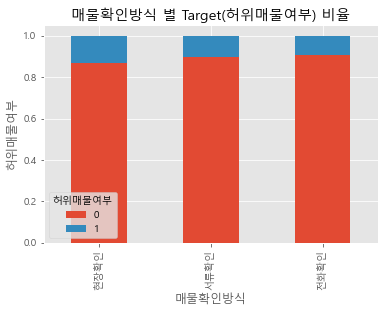

In [105]:
cross_tab, chi2_statistic, p_value = chi2_plot(eda_data, '매물확인방식', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis='index')

ratio_table_sorted = ratio_table.sort_values(by=0)


axs = ratio_table_sorted.plot(kind='bar', stacked=True) 
axs.set_ylabel('허위매물여부')  
axs.set_title('매물확인방식 별 Target(허위매물여부) 비율')
plt.show()

*** 중요도 확인

In [106]:
eda_data.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [107]:
y = eda_data["허위매물여부"]
X = eda_data.drop(["중개사무소","허위매물여부"], axis=1)

In [108]:
cat_columns = X.select_dtypes(include=['object']).columns

In [109]:
label_encoders = {}

for col in cat_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [110]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

print(feature_importance)

   Feature  Importance
14     게재일    0.276052
12     관리비    0.114464
11   총주차대수    0.102638
3       월세    0.077324
4     전용면적    0.064206
2      보증금    0.061751
6       총층    0.061255
0       ID    0.057251
5      해당층    0.050960
7       방향    0.050503
10  주차가능여부    0.031411
13   제공플랫폼    0.023121
1   매물확인방식    0.012613
8       방수    0.012201
9      욕실수    0.004253


*** 제거 전후 모델의 성능 확인

In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# '매물확인방식' 피처 제거 전
rf_before = RandomForestClassifier(random_state=42)
rf_before.fit(X_train, y_train)
y_pred_before = rf_before.predict(X_valid)

# '매물확인방식'피처 제거 후
X_train_reduced = X_train.drop(columns=['매물확인방식'])
X_valid_reduced = X_valid.drop(columns=['매물확인방식'])

rf_after = RandomForestClassifier(random_state=42)
rf_after.fit(X_train_reduced, y_train)
y_pred_after = rf_after.predict(X_valid_reduced)

acc_before = accuracy_score(y_valid, y_pred_before)
acc_after = accuracy_score(y_valid, y_pred_after)
f1_before = f1_score(y_valid, y_pred_before)
f1_after = f1_score(y_valid, y_pred_after)

print(f"피처 제거 전 정확도: {acc_before:.4f}, F1-score: {f1_before:.4f}")
print(f"피처 제거 후 정확도: {acc_after:.4f}, F1-score: {f1_after:.4f}")

# 교차검증(K-fold)
rf_original = RandomForestClassifier(random_state=42)
acc_original_cv = cross_val_score(rf_original, X_train, y_train, cv=5, scoring='accuracy').mean()
f1_original_cv = cross_val_score(rf_original, X_train, y_train, cv=5, scoring='f1').mean()

rf_reduced = RandomForestClassifier(random_state=42)
acc_reduced_cv = cross_val_score(rf_reduced, X_train_reduced, y_train, cv=5, scoring='accuracy').mean()
f1_reduced_cv = cross_val_score(rf_reduced, X_train_reduced, y_train, cv=5, scoring='f1').mean()

print(f"교차 검증 - 원본 모델 정확도: {acc_original_cv:.4f}, F1-score: {f1_original_cv:.4f}")
print(f"교차 검증 - 피처 제거 후 정확도: {acc_reduced_cv:.4f}, F1-score: {f1_reduced_cv:.4f}")

피처 제거 전 정확도: 0.9409, F1-score: 0.7184
피처 제거 후 정확도: 0.9389, F1-score: 0.7059
교차 검증 - 원본 모델 정확도: 0.9419, F1-score: 0.7047
교차 검증 - 피처 제거 후 정확도: 0.9414, F1-score: 0.7046


In [112]:
X.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,제공플랫폼,게재일
0,0,2,402500000.0,470000,NaN,NaN,15.0,7,1.0,1.0,0,40.0,96,1,394
1,1,2,170500000.0,200000,NaN,3.0,4.0,0,2.0,1.0,1,NaN,0,3,472
2,2,1,114000000.0,380000,NaN,2.0,3.0,3,1.0,1.0,1,NaN,0,0,444
3,3,2,163500000.0,30000,36.3,3.0,9.0,0,2.0,1.0,0,13.0,10,0,442
4,4,2,346000000.0,530000,NaN,3.0,3.0,3,2.0,1.0,1,NaN,0,1,288


In [113]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 원본 모델 학습
rf_original = RandomForestClassifier(random_state=42, n_estimators=100)
rf_original.fit(X_train, y_train)

# 피처 제거 후 학습
removed_features = ['매물확인방식'] 
X_train_reduced = X_train.drop(columns=removed_features)
X_valid_reduced = X_valid.drop(columns=removed_features)

rf_reduced = RandomForestClassifier(random_state=42, n_estimators=100)
rf_reduced.fit(X_train_reduced, y_train)

y_pred_proba_original = rf_original.predict_proba(X_valid)[:, 1]
y_pred_proba_reduced = rf_reduced.predict_proba(X_valid_reduced)[:, 1]

auc_original = roc_auc_score(y_valid, y_pred_proba_original)
auc_reduced = roc_auc_score(y_valid, y_pred_proba_reduced)

print(f"전체 데이터 학습 후 AUC - 원본 모델: {auc_original:.4f}")
print(f"전체 데이터 학습 후 AUC - 피처 제거 모델: {auc_reduced:.4f}")

전체 데이터 학습 후 AUC - 원본 모델: 0.9640
전체 데이터 학습 후 AUC - 피처 제거 모델: 0.9626


*** VIF값 확인

In [114]:
eda_data["게재일"] = pd.to_datetime(eda_data["게재일"])

# 연도, 월, 요일 정보 추가
eda_data["연도"] = eda_data["게재일"].dt.year
eda_data["월"] = eda_data["게재일"].dt.month
eda_data["요일"] = eda_data["게재일"].dt.dayofweek  # 0=월요일, 6=일요일

# One-Hot Encoding 수행 (연도는 연속형이므로 제외)
train_encoded = pd.get_dummies(eda_data, columns=['월', '요일'], drop_first=True)

train_encoded = train_encoded.drop(["게재일"], axis=1)

In [115]:
train_encoded = train_encoded.drop(["ID","중개사무소"], axis=1)

In [116]:
categorical_columns = train_encoded.select_dtypes(include=['object']).columns

data_encoded = pd.get_dummies(train_encoded, columns=categorical_columns, drop_first=True)

In [117]:
data_encoded = data_encoded.fillna(0)

data_encoded = data_encoded.astype(float)

In [118]:
vif_data = pd.DataFrame()
vif_data["Feature"] = data_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(data_encoded.values, i) for i in range(data_encoded.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

        Feature        VIF
10           연도  73.712033
6           욕실수  32.327983
5            방수  11.023623
4            총층   7.910027
29  매물확인방식_현장확인   5.800573
1            월세   4.501780
3           해당층   4.180264
19         월_10   3.278834
31        방향_남향   3.276075
32        방향_동향   3.241756
2          전용면적   3.234623
20         월_11   3.144954
18          월_9   2.764529
0           보증금   2.736184
21         월_12   2.696165
36        방향_서향   2.478390
37   주차가능여부_불가능   2.256580
17          월_8   2.208844
8           관리비   2.149142
28  매물확인방식_전화확인   2.093329
27         요일_6   2.069644
23         요일_2   2.016002
24         요일_3   2.012283
22         요일_1   2.006487
26         요일_5   2.000728
25         요일_4   1.992649
30       방향_남서향   1.842351
35        방향_북향   1.800838
7         총주차대수   1.752371
16          월_7   1.706259
15          월_6   1.693330
38   제공플랫폼_B플랫폼   1.677018
14          월_5   1.624247
12          월_3   1.615283
9        허위매물여부   1.560041
13          월_4   1.493932
1

매물확인방식 피처의 제거 전후 성능과 VIF 값을 확인해본 결과,

피처 제거 전 정확도: 0.9409, F1-score: 0.7184  
피처 제거 후 정확도: 0.9389, F1-score: 0.7059  
교차 검증 - 원본 모델 정확도: 0.9419, F1-score: 0.7047  
교차 검증 - 피처 제거 후 정확도: 0.9414, F1-score: 0.7046  

전체 데이터 학습 후 AUC - 원본 모델: 0.9640  
전체 데이터 학습 후 AUC - 피처 제거 모델: 0.9626  

매물확인방식_현장확인   5.800573  
매물확인방식_전화확인   2.093329

VIF값과 타겟 피처와의 독립성 등과 해당 피처 제거 전후의 성능을 비교했을때, 조금이나마 정확도와 성능이 낮아졌기 때문에 해당 피처는 유지하기로 결정.

#### (2) 방향

카이제곱 통계량: 125.70
p-값: 4.957818506024278e-24
귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.


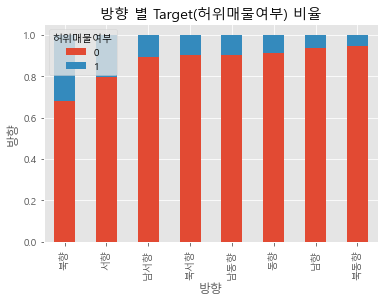

In [119]:
cross_tab, chi2_statistic, p_value = chi2_plot(eda_data, '방향', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis='index')

ratio_table_sorted = ratio_table.sort_values(by=0)


axs = ratio_table_sorted.plot(kind='bar', stacked=True) 
axs.set_ylabel('방향')  
axs.set_title('방향 별 Target(허위매물여부) 비율')
plt.show()

In [120]:
eda_data.groupby('방향')["허위매물여부"].mean()

방향
남동향    0.098182
남서향    0.109091
남향     0.065574
동향     0.087603
북동향    0.053333
북서향    0.100000
북향     0.318182
서향     0.203085
Name: 허위매물여부, dtype: float64

허위매물 비율이 비슷한 항목끼리 묶어서 재범주화를 진행하자.

북향과 서향은 그대로 둔 상태에서, 북동향과 남향을 묶고, 나머지 네 항목을 묶어서 진행하도록 하자.

북동향과 남향을 주거선호향, 나머지는 그외 로 포함시켜서 재범주화를 진행하면 

카이제곱 통계량: 124.85
p-값: 6.9747766091336e-27
귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.


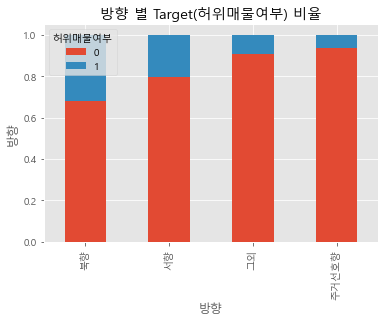

In [121]:
eda_data['방향'].replace(['북동향','남향'], '주거선호향', inplace=True)
eda_data['방향'].replace(['남동향','남서향','동향','북서향'], '그외', inplace=True)

cross_tab, chi2_statistic, p_value = chi2_plot(eda_data, '방향', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis='index')

ratio_table_sorted = ratio_table.sort_values(by=0)


axs = ratio_table_sorted.plot(kind='bar', stacked=True) 
axs.set_ylabel('방향')  
axs.set_title('방향 별 Target(허위매물여부) 비율')
plt.show()

범주화 이전

카이제곱 통계량: 125.70  
p-값: 4.957818506024278e-24

범주화 이후

카이제곱 통계량: 124.85
p-값: 6.9747766091336e-27

범주화 이후의 카이제곱 통계량과 p값이 모두 작아졌다.  
p값은 여전히 매우 작기 때문에 두 변수 사이에 여전히 강한 연관성이 있다.  
카이제곱 통계량에는 큰 차이가 없고 p값은 여전히 충분히 작기 때문에 차원축소의 이점을 살려서 범주화를 유지

#### (3) 주차가능여부

카이제곱 통계량: 37.95
p-값: 7.244090385630417e-10
귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.


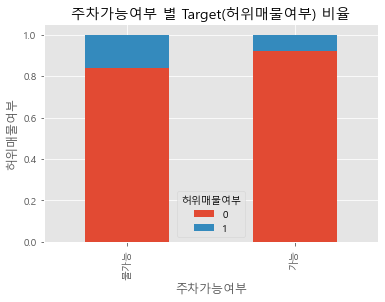

In [122]:
cross_tab, chi2_statistic, p_value = chi2_plot(eda_data, '주차가능여부', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis='index')

ratio_table_sorted = ratio_table.sort_values(by=0)


axs = ratio_table_sorted.plot(kind='bar', stacked=True) 
axs.set_ylabel('허위매물여부')  
axs.set_title('주차가능여부 별 Target(허위매물여부) 비율')
plt.show()

주차가능여부 피처는 통계적으로 타겟과 독립적이지 않으므로 그대로 유지.

#### (4) 제공플랫폼

카이제곱 통계량: 19.92
p-값: 0.06860329781525687
귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.


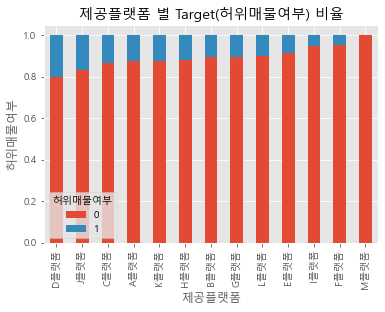

In [123]:
cross_tab, chi2_statistic, p_value = chi2_plot(eda_data, '제공플랫폼', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis='index')

ratio_table_sorted = ratio_table.sort_values(by=0)

axs = ratio_table_sorted.plot(kind='bar', stacked=True) 
axs.set_ylabel('허위매물여부')  
axs.set_title('제공플랫폼 별 Target(허위매물여부) 비율')
plt.show()

In [124]:
eda_data.groupby('제공플랫폼')['허위매물여부'].mean().sort_values(ascending=False)

제공플랫폼
D플랫폼    0.201087
J플랫폼    0.166667
C플랫폼    0.134286
A플랫폼    0.125261
K플랫폼    0.125000
H플랫폼    0.117647
B플랫폼    0.104918
G플랫폼    0.101695
L플랫폼    0.100000
E플랫폼    0.084507
I플랫폼    0.050000
F플랫폼    0.047619
M플랫폼    0.000000
Name: 허위매물여부, dtype: float64

카이제곱 통계량: 19.08
p-값: 0.000263774061839507
귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.


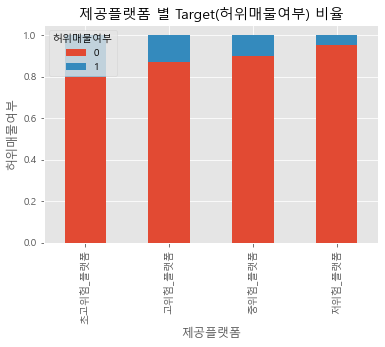

In [125]:
eda_data['제공플랫폼'].replace(['D플랫폼','J플랫폼'], '초고위험_플랫폼', inplace=True)
eda_data['제공플랫폼'].replace(['C플랫폼','A플랫폼','K플랫폼','H플랫폼'], '고위험_플랫폼', inplace=True)
eda_data['제공플랫폼'].replace(['B플랫폼','G플랫폼','L플랫폼','E플랫폼'], '중위험_플랫폼', inplace=True)
eda_data['제공플랫폼'].replace(['I플랫폼','F플랫폼','M플랫폼'], '저위험_플랫폼', inplace=True)

cross_tab, chi2_statistic, p_value = chi2_plot(eda_data, '제공플랫폼', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

ratio_table = cross_tab.div(cross_tab.sum(axis=1), axis='index')

ratio_table_sorted = ratio_table.sort_values(by=0)

axs = ratio_table_sorted.plot(kind='bar', stacked=True) 
axs.set_ylabel('허위매물여부')  
axs.set_title('제공플랫폼 별 Target(허위매물여부) 비율')
plt.show()

범주화 이전 

카이제곱 통계량: 19.92  
p-값: 0.06860329781525687

범주화 이후

카이제곱 통계량: 19.08  
p-값: 0.000263774061839507

범주화 후에는 제공플랫폼이 허위매물여부와 더 강한 연관성을 가지므로, 범주화 후의 피처를 사용하는 것이 적절

#### (5) 중개사무소

In [126]:
cross_tab, chi2_statistic, p_value = chi2_plot(eda_data, '중개사무소', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

카이제곱 통계량: 524.45
p-값: 2.3719684314814195e-17
귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.


In [127]:
eda_data['중개사무소'].nunique()

279

In [128]:
eda_data.groupby('중개사무소')['허위매물여부'].count().sort_values(ascending=False)

중개사무소
G52Iz8V2B9    799
r82ax9M3U3     43
J52gJ2E4T6     32
H90uE4C0W5     30
b87Td0W4Y3     27
             ... 
v93Nq7T8G6      1
w00Ns9M8U9      1
A21Yr4B1U8      1
z78FX7A1I1      1
A06Nz2Z1R1      1
Name: 허위매물여부, Length: 279, dtype: int64

In [129]:
### 매물수를 따라서 재범주화

eda_by_count = eda_data.copy()

agency_counts = eda_by_count['중개사무소'].value_counts()

def categorize_agency(agency):
    if agency == 'G52Iz8V2B9':
        return '특이 중개사무소'
    elif agency_counts[agency] >= 30:
        return '대형 중개사무소'
    elif agency_counts[agency] >= 10:
        return '중형 중개사무소'
    else:
        return '소형 중개사무소'
    
eda_by_count['중개사무소_재범주화(매물수)'] = eda_by_count['중개사무소'].apply(categorize_agency)

cross_tab, chi2_statistic, p_value = chi2_plot(eda_by_count, '중개사무소_재범주화(매물수)', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

카이제곱 통계량: 165.55
p-값: 1.1623724005009008e-35
귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.


In [130]:
### 허위매물비율을 따라서 재범주화(카테고리수 4개)

eda_by_rate = eda_data.copy()

agency_fake_rates = eda_by_rate.groupby('중개사무소')['허위매물여부'].mean()

def categorize_agency_by_fake_rate(agency):
    if agency == 'G52Iz8V2B9':
        return '특이 중개사무소'
    elif agency_fake_rates[agency] >= 0.15:
        return '고위험 중개사무소'
    elif agency_fake_rates[agency] >= 0.05:
        return '중위험 중개사무소'
    else:
        return '저위험 중개사무소'
    
eda_by_rate['중개사무소_재범주화(비율)'] = eda_by_rate['중개사무소'].apply(categorize_agency_by_fake_rate)

cross_tab, chi2_statistic, p_value = chi2_plot(eda_by_rate, '중개사무소_재범주화(비율)', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

카이제곱 통계량: 399.47
p-값: 2.879865410413118e-86
귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.


범주화 이전

카이제곱 통계량: 524.45  
p-값: 2.3719684314814195e-17

범주화 이후(매물수 기준)

카이제곱 통계량: 165.55  
p-값: 1.1623724005009008e-35  

범주화 이후(허위매물비율 기준)

카이제곱 통계량: 399.47  
p-값: 2.879865410413118e-86  

허위매물비율을 기준으로 범주화를 했을때, p값은 낮은 상태를 유지하면서  
카이제곱 통계량이 130정도 감소하였다. 정보의 손실은 있지만, 연관성은 유지되는 편.  
조금 더 정밀한 그룹화를 하여 테스트해보자.

In [131]:
### 허위매물비율을 따라서 재범주화(카테고리수 6개)

re_eda_by_rate = eda_data.copy()

re_agency_fake_rates = re_eda_by_rate.groupby('중개사무소')['허위매물여부'].mean()

def re_categorize_agency_by_fake_rate(agency):
    if agency == 'G52Iz8V2B9':
        return '특이 중개사무소'
    elif agency_fake_rates[agency] >= 0.2:
        return '초고위험 중개사무소'
    elif agency_fake_rates[agency] >= 0.15:
        return '고위험 중개사무소'
    elif agency_fake_rates[agency] >= 0.1:
        return '중위험 중개사무소'
    elif agency_fake_rates[agency] >= 0.05:
        return '저위험 중개사무소'
    else:
        return '안전 중개사무소'
    
re_eda_by_rate['중개사무소_재범주화(비율)'] = re_eda_by_rate['중개사무소'].apply(re_categorize_agency_by_fake_rate)

cross_tab, chi2_statistic, p_value = chi2_plot(re_eda_by_rate, '중개사무소_재범주화(비율)', '허위매물여부')

print(f'카이제곱 통계량: {chi2_statistic:.2f}')
print(f'p-값: {p_value}')

alpha = 0.05 
if p_value < alpha:
    print('귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.')
else:
    print('귀무가설 채택: 두 변수는 통계적으로 독립적일 가능성이 있습니다.')

카이제곱 통계량: 433.82
p-값: 1.517800982863838e-91
귀무가설 기각: 두 변수는 통계적으로 독립적이지 않습니다.


In [132]:
re_eda_by_rate.groupby('중개사무소_재범주화(비율)')['허위매물여부'].count()

중개사무소_재범주화(비율)
고위험 중개사무소     191
안전 중개사무소      371
저위험 중개사무소     158
중위험 중개사무소     239
초고위험 중개사무소    694
특이 중개사무소      799
Name: 허위매물여부, dtype: int64

중개사무소 피처를 6개의 카테고리로 재범주화 한 이후, 각 카테고리별 매물의 수도 적당히 분배가 되었으며, 

(카테고리 4개)  
카이제곱 통계량: 399.47  
p-값: 2.879865410413118e-86

(카테고리 6개)  
카이제곱 통계량: 433.82  
p-값: 1.517800982863838e-91

로 카이제곱 통계량이 조금 더 원본 데이터에 가까워졌다. 적당히 카테고리화가 이루어진 것 같으므로 범주화를 유지해주자.

## (6) 범주화 함수 정의

In [133]:
A = []
B = []
C = []
D = []
E = []
F = []

for office in eda_data['중개사무소'].unique():
    
    fake_rate = eda_data[eda_data['중개사무소']==office]['허위매물여부'].mean()
    
    if office == 'G52Iz8V2B9':
        A.append(office)
    elif fake_rate >= 0.2:
        B.append(office)
    elif fake_rate >= 0.15:
        C.append(office)
    elif fake_rate >= 0.1:
        D.append(office)
    elif fake_rate >= 0.05:
        E.append(office)
    else:
        F.append(office)

print('특이 중개사무소:', A)
print('초고위험 중개사무소:', B)
print('고위험 중개사무소:', C)
print('중위험 중개사무소:', D)
print('저위험 중개사무소:', E)
print('안전 중개사무소:', E)

특이 중개사무소: ['G52Iz8V2B9']
초고위험 중개사무소: ['t93Nt6I2I0', 'J30yG7F1O0', 'H90uE4C0W5', 'a15xR3G4V0', 'W88DA3W2Q3', 'o80Xg3Q1Q7', 'Z18up3D1C3', 'S12iP7V0Q9', 'm69GM9O9B3', 'r16Dr6Z7C3', 'J07Zn4B0R7', 'D49QC8I7L2', 'o61te4S1W1', 'K38kY2R6G0', 'K48zc2G4K8', 'f41Wq8P7T9', 'J52gJ2E4T6', 'M02bn7Y4P0', 'Y65Hw0Z3K0', 'X71Iq5L2C6', 'z54Fl0B2P9', 's37cv8A6L4', 'K25cF2K7X6', 'U93ap2F8Z1', 'w14tG2G0E3', 'M92wE9E7E5', 'X95Bu4S5H2', 'j90UQ8N6M3', 'D24eh4J3C3', 'n74bA7B3O7', 'j79Xs5I3K0', 'D25dP0R4Q9', 'S00TK4T8K2', 'r74nn1Y4T7', 'k52HR5N1Z1', 'q18xI5H8Z1', 'V19Zw6E4O7', 'S78Le0Y9Y4', 'w85cb3W8U9', 'i22so9D4E0', 'j28Cm6F1K6', 'I97SP1K4K9', 'J00Mu6V1D3', 'n17xB4N6P5', 'Q65VU2R1S3', 'W88hM2E2A9', 'x68FU7B0S3', 'D30QB7N3P2', 'J99uP8I8G0', 'm80Ig6Q6D3', 'T96lA6S7X2', 'S75yJ5K6D2', 'P88lE8L8Y1', 'R51nD5V3T5', 'E65ar6O9X7', 'o77mL4X3T8', 'n12ez5E0F1', 'J34zf6Z7T0', 'x64HR1L6M1', 'y86qM5T6T6', 'd24sj2E4L0', 'L25uD9A1R8', 't30Ne9Y5A6', 'h32je0U3R6', 'l84az9J6A2', 'c57Ws2D6M9', 'R17wi5N4M8', 'o07ZC4L7V4', 'P16QI7E8K

In [134]:
def categorize_features(data):
    
    # 방향 범주화
    data['방향'].replace(['북동향','남향'], '주거선호향', inplace=True)
    data['방향'].replace(['남동향','남서향','동향','북서향'], '그외', inplace=True)
    
    # 제공 플랫폼 범주화
    data['제공플랫폼'].replace(['D플랫폼','J플랫폼'], '초고위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['C플랫폼','A플랫폼','K플랫폼','H플랫폼'], '고위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['B플랫폼','G플랫폼','L플랫폼','E플랫폼'], '중위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['I플랫폼','F플랫폼','M플랫폼'], '저위험_플랫폼', inplace=True)
    
    # 중개사무소 범주화
    data['중개사무소'] = data['중개사무소'].replace(A, '특이 중개사무소')
    data['중개사무소'] = data['중개사무소'].replace(B, '초고위험 중개사무소')
    data['중개사무소'] = data['중개사무소'].replace(C, '고위험 중개사무소')
    data['중개사무소'] = data['중개사무소'].replace(D, '중위험 중개사무소')
    data['중개사무소'] = data['중개사무소'].replace(E, '저위험 중개사무소')
    data['중개사무소'] = data['중개사무소'].replace(F, '안전 중개사무소')
    
    return data

## 2) 파생 변수의 생성 - 성능이 개선되는지 확인

#### (2) 해당층과 총층, 총주차대수

해당층이 높기 위해서는 총층이 높아야 하므로, 둘 사이의 높은 공선성이 있을것이라 판단.  
두 피처를 적절히 결합하는 것이 필요하다.

또한 총층 피처는 건축물의 유형을 구분할 수 있기 때문에 파생변수로 만드는 것이 의미가 있는지 확인 필요.

해당층의 VIF값은 5.187629  
총층의 VIF값은 8.142754  
총주차대수의 VIF값은 2.385557

In [135]:
eda_data = pd.read_csv('train.csv')

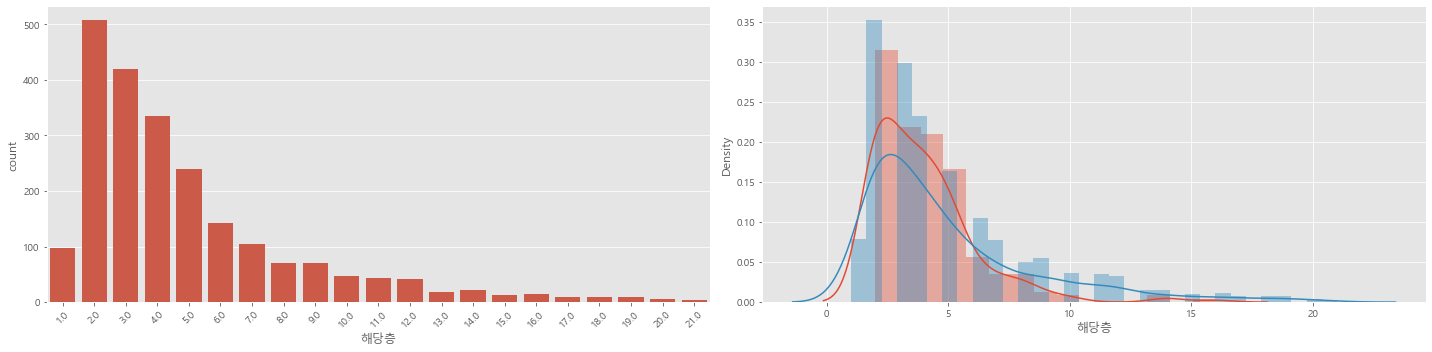

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# 첫 번째 서브플롯: 해당층 별 허위매울비율
sns.countplot(x="해당층", data=eda_data, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

# 두 번째 서브플롯: 해당층 분포 비교
sns.distplot(eda_data[eda_data['허위매물여부'] == 1]['해당층'], kde_kws={"label": "허위매물"}, ax=axs[1])
sns.distplot(eda_data[eda_data['허위매물여부'] == 0]['해당층'], kde_kws={"label": "정상매물"}, ax=axs[1])

plt.tight_layout()
plt.show()

해당층의 분포는 2층일때 가장 많으며, 층이 높아질수록 매물의 수가 줄어드는 형태를 띈다.  
정상 매물과 허위 매물 모두 해당층이 2-4 사이가 가장 비율이 많은 형태를 보이고 있다.

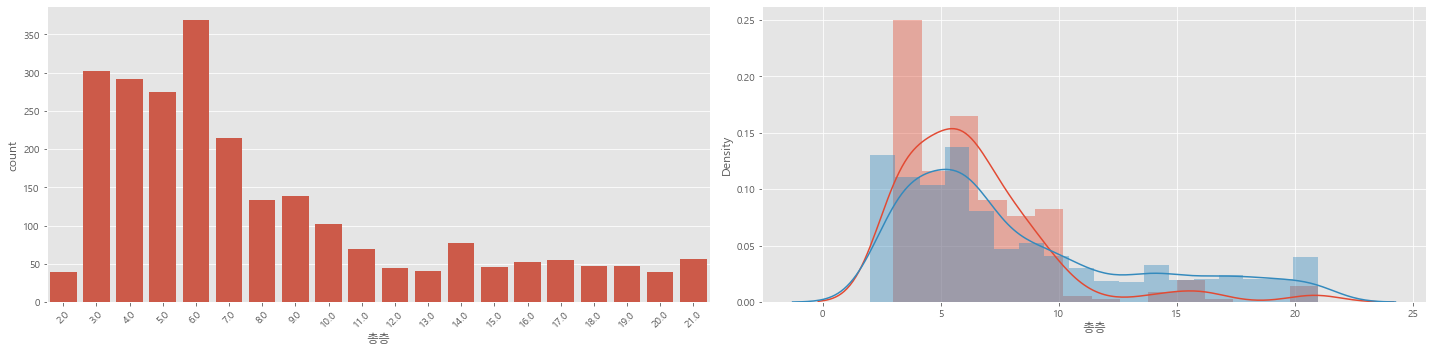

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# 첫 번째 서브플롯: 총층 별 허위매울비율
sns.countplot(x="총층", data=eda_data, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

# 두 번째 서브플롯: 해당층 분포 비교
sns.distplot(eda_data[eda_data['허위매물여부'] == 1]['총층'], kde_kws={"label": "허위매물"}, ax=axs[1])
sns.distplot(eda_data[eda_data['허위매물여부'] == 0]['총층'], kde_kws={"label": "정상매물"}, ax=axs[1])

plt.tight_layout()
plt.show()

총층의 경우, 해당층보다는 매물의 수가 고른 형태를 띄고 있다. 총층이 2인경우가 가장 적고, 3에서 6사이가 가장 많으며, 7에서 10사이는 중간, 11층 이상부터는 적은 형태를 띄고 있다.  
허위매물의 비율도 정상매물의 비율과 비슷한데, 허위매물이 좀 더 고른 분포를 띄고 있다.

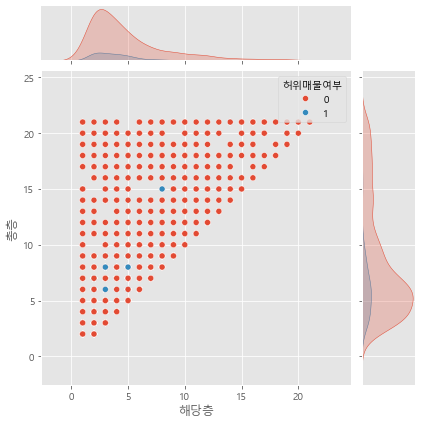

In [138]:
sns.jointplot(data=eda_data, x="해당층", y="총층", hue="허위매물여부")
plt.show()

두 피처간의 뚜렷한 상관관계를 플랏을 통해서 확인할 수는 없지만, 해당층이 총층을 넘을 수 없기 떄문에, 이 관계를 사용할 수 있을 것 같다.

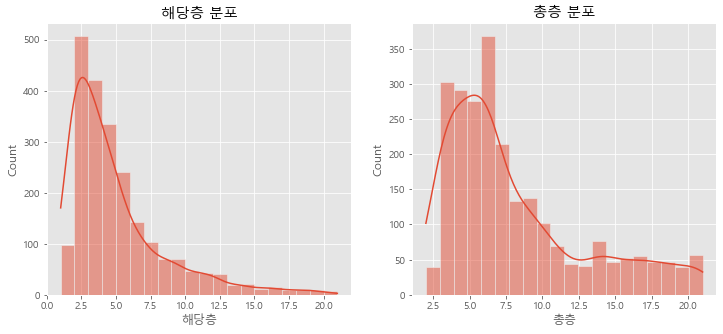

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(eda_data['해당층'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("해당층 분포")

sns.histplot(eda_data['총층'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("총층 분포")

plt.show()

In [140]:
eda_data[['해당층', '총층', '허위매물여부']].corr()

,해당층,총층,허위매물여부
해당층,1.000000,0.700091,-0.090369
총층,0.700091,1.000000,-0.125895
허위매물여부,-0.090369,-0.125895,1.000000


피처 중요도

총층    0.061255  
해당층    0.050960

#### (3) 전용면적과 방수, 욕실수

#### (4) 월세와 보증금

# BorderlineSMOTE를 활용한 클래스 불균형 처리

## (1) 함수 정의

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
# 스케일 변환 (보증금','월세')
def rescale_data(data):
    data['보증금'] = data['보증금'] / 100000
    data['월세'] = data['월세'] / 100000
    return data

# 재범주화 함수 ('방향','제공플랫폼','중개사무소')
def categorize_features(data, offices):
    
    # 방향 범주화
    data['방향'].replace(['북동향','남향'], '주거선호향', inplace=True)
    data['방향'].replace(['남동향','남서향','동향','북서향'], '그외', inplace=True)
    
    # 제공 플랫폼 범주화
    data['제공플랫폼'].replace(['D플랫폼','J플랫폼'], '초고위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['C플랫폼','A플랫폼','K플랫폼','H플랫폼'], '고위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['B플랫폼','G플랫폼','L플랫폼','E플랫폼'], '중위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['I플랫폼','F플랫폼','M플랫폼'], '저위험_플랫폼', inplace=True)
    
    for office in offices:
        data['중개사무소'].replace(offices[office], office, inplace=True)
    
    return data

# 중개사무소 카테고리화 함수
def categorize_offices(df):
    offices = {'A':[], 'B':[], 'C':[], 'D':[], 'E':[], 'F':[]}
    for office in eda_data['중개사무소'].unique():
        fake_rate = eda_data[eda_data['중개사무소']==office]['허위매물여부'].mean()
    
        if office == 'G52Iz8V2B9':
            offices['A'].append(office)
        elif fake_rate >= 0.2:
            offices['B'].append(office)
        elif fake_rate >= 0.15:
            offices['C'].append(office)
        elif fake_rate >= 0.1:
            offices['D'].append(office)
        elif fake_rate >= 0.05:
            offices['E'].append(office)
        else:
            offices['F'].append(office)
    
    return offices

# 결측치 제거/대체
def impute_missing_occupation(train_data):

    # 욕실수가 결측치인 피처 제거
    train_data = train_data.dropna(subset=["욕실수"])

    # 제거할 컬럼 설정
    cols_to_impute = ['전용면적','해당층','총주차대수']
    
    # 결측치 여부 피처 생성
    train_data["전용면적_결측여부"] = train_data["전용면적"].isnull().astype(int)
    train_data["해당층_결측여부"] = train_data["해당층"].isnull().astype(int)
    train_data["총주차대수_결측여부"] = train_data["총주차대수"].isnull().astype(int)
    
    # 결측치 여부 피처는 나중에 다시 concat
    train_if_missing = train_data[["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"]]
    train_data = train_data.drop(["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"], axis=1)
    
    for i, col in enumerate(cols_to_impute) :
    
        # 결측치가 있는 행과 없는 행의 분리
        train_no_nan = train_data[train_data[col].notnull()]
        train_nan = train_data[train_data[col].isnull()]
        
        # 랜덤 포레스트에 사용할 수치형 데이터 선택
        numeric_columns = train_no_nan.select_dtypes(include=['int', 'float']).columns.tolist()
        
        # 모델 학습
        X_train = train_no_nan[numeric_columns].drop([col], axis=1)
        y_train = train_no_nan[col]
    
        X_valid = train_nan[numeric_columns].drop([col], axis=1)
        y_valid = train_nan[col]
        
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)
        predicted_value = model.predict(X_valid)
        
        train_nan[col] = predicted_value
        
        train_data = pd.concat([train_no_nan,train_nan])
        
    train_imputed = pd.concat([train_data,train_if_missing], axis=1).sort_index()
    
    return train_imputed

def impute_missing_values(imputed_train, valid):
    
    imputed_train_data = imputed_train.copy()
    imputed_valid_data = valid.copy()
    
    imputed_train_data = imputed_train_data.drop(['ID'], axis=1)
    imputed_valid_data = imputed_valid_data.drop(['ID'], axis=1)
    
    # 결측치 여부 피처 생성
    imputed_valid_data["전용면적_결측여부"] = imputed_valid_data["전용면적"].isnull().astype(int)
    imputed_valid_data["해당층_결측여부"] = imputed_valid_data["해당층"].isnull().astype(int)
    imputed_valid_data["총주차대수_결측여부"] = imputed_valid_data["총주차대수"].isnull().astype(int)

    freq_imputer = SimpleImputer(strategy='most_frequent')
    freq_imputer.fit(imputed_train_data[['해당층','총주차대수']])
    imputed_valid_data[['해당층','총주차대수']]= freq_imputer.transform(imputed_valid_data[['해당층','총주차대수']])
    
    median_imputer = SimpleImputer(strategy='median')
    median_imputer.fit(imputed_train_data[['전용면적']])
    imputed_valid_data[['전용면적']] = median_imputer.transform(imputed_valid_data[['전용면적']])

    return imputed_train_data, imputed_valid_data

# 게재일 피처 레이블인코딩
def Datetime_Conversion_label(train_data, test_data):
    
    train_data["게재일"] = pd.to_datetime(train_data["게재일"])
    test_data["게재일"] = pd.to_datetime(test_data["게재일"])
    
    # 연도, 월, 요일 정보 추가
    train_data["연도"] = train_data["게재일"].dt.year
    train_data["월"] = train_data["게재일"].dt.month
    train_data["요일"] = train_data["게재일"].dt.dayofweek  # 0=월요일, 6=일요일
    
    test_data["연도"] = test_data["게재일"].dt.year
    test_data["월"] = test_data["게재일"].dt.month
    test_data["요일"] = test_data["게재일"].dt.dayofweek

    # Label Encoding 적용 (같은 클래스 유지)
    le_month = LabelEncoder()
    le_day = LabelEncoder()
    
    train_data["월"] = le_month.fit_transform(train_data["월"])
    train_data["요일"] = le_day.fit_transform(train_data["요일"])

    # 테스트 데이터 변환 시 train에서 학습한 클래스 목록 유지
    test_data["월"] = test_data["월"].map(lambda x: le_month.transform([x])[0] if x in le_month.classes_ else -1)
    test_data["요일"] = test_data["요일"].map(lambda x: le_day.transform([x])[0] if x in le_day.classes_ else -1)

    # '게재일' 피처 제거
    train_datetime_converted = train_data.drop(["게재일"], axis=1)
    test_datetime_converted = test_data.drop(["게재일"], axis=1)
    
    return train_datetime_converted, test_datetime_converted

# 나머지 카테고리형 피처 인코딩
def Label_encoding(train_data, test_data):
    
    encoded_train = train_data.copy()
    encoded_valid = test_data.copy()
    
    # target 피처 제외
    for col in encoded_train.columns[0:-1]: 
        if encoded_train[col].dtypes == 'object':

            le = LabelEncoder()
            encoded_train[col] = le.fit_transform(encoded_train[col])

            for label in np.unique(encoded_valid[col]):
                if label not in le.classes_:
                    le.classes_ = np.append(le.classes_, label)
            encoded_valid[col] = le.transform(encoded_valid[col])
    return encoded_train, encoded_valid

In [143]:
train_origin = pd.read_csv('train.csv')
train_data, valid_data = train_test_split(train_origin, test_size=0.2, random_state=42, stratify=train_origin['허위매물여부'])

offices = categorize_offices(train_data)
train_origin =  categorize_features(train_data,offices)
valid_data = categorize_features(valid_data,offices)
train_imputed = impute_missing_occupation(train_origin)

imputed_train_data, imputed_valid_data = impute_missing_values(train_imputed,valid_data)
train_datetime_converted, test_datetime_converted = Datetime_Conversion_label(imputed_train_data, imputed_valid_data)
encoded_train, encoded_valid = Label_encoding(train_datetime_converted, test_datetime_converted)

encoded_train = rescale_data(encoded_train)
encoded_valid = rescale_data(encoded_valid)

In [144]:
train_datetime_converted.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,...,관리비,중개사무소,제공플랫폼,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부,연도,월,요일
0,현장확인,402500000.0,470000,21.412540,8.137562,15.0,서향,1.0,1.0,가능,...,96,B,중위험_플랫폼,0,1,1,0,2024,9,2
2,전화확인,114000000.0,380000,24.281994,2.000000,3.0,그외,1.0,1.0,불가능,...,0,E,고위험_플랫폼,0,1,0,1,2024,10,3
3,현장확인,163500000.0,30000,36.300000,3.000000,9.0,그외,2.0,1.0,가능,...,10,A,고위험_플랫폼,0,0,0,0,2024,10,1
4,현장확인,346000000.0,530000,35.744219,3.000000,3.0,그외,2.0,1.0,불가능,...,0,E,중위험_플랫폼,1,1,0,1,2024,5,1
5,전화확인,153000000.0,530000,29.500000,2.024930,3.0,주거선호향,2.0,1.0,가능,...,0,E,고위험_플랫폼,0,0,1,0,2024,8,3


In [145]:
encoded_train.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,...,관리비,중개사무소,제공플랫폼,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부,연도,월,요일
0,2,4025.0,4.7,21.412540,8.137562,15.0,2,1.0,1.0,0,...,96,1,2,0,1,1,0,2024,9,2
2,1,1140.0,3.8,24.281994,2.000000,3.0,0,1.0,1.0,1,...,0,4,0,0,1,0,1,2024,10,3
3,2,1635.0,0.3,36.300000,3.000000,9.0,0,2.0,1.0,0,...,10,0,0,0,0,0,0,2024,10,1
4,2,3460.0,5.3,35.744219,3.000000,3.0,0,2.0,1.0,1,...,0,4,2,1,1,0,1,2024,5,1
5,1,1530.0,5.3,29.500000,2.024930,3.0,3,2.0,1.0,0,...,0,4,0,0,0,1,0,2024,8,3


In [146]:
encoded_train.columns

Index(['매물확인방식', '보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '주차가능여부',
       '총주차대수', '관리비', '중개사무소', '제공플랫폼', '허위매물여부', '전용면적_결측여부', '해당층_결측여부',
       '총주차대수_결측여부', '연도', '월', '요일'],
      dtype='object')

## (2) DBSCAN을 통한 이상치 제거

In [147]:
D_encoded_train = encoded_train.copy()
D_encoded_valid = encoded_valid.copy()

X_sample_scaled = D_encoded_train[['해당층','욕실수','총주차대수','총층','관리비','보증금','전용면적']]

dbscan = DBSCAN(eps=25, min_samples=14)
clusters_sample = dbscan.fit_predict(X_sample_scaled)

D_encoded_train['clusters'] = clusters_sample
sample_no_outliers = D_encoded_train[D_encoded_train['clusters'] != -1]

train_y = sample_no_outliers['허위매물여부']
train_x = sample_no_outliers.drop(['허위매물여부','clusters'],axis = 1)

valid_y = D_encoded_valid['허위매물여부']
valid_x = D_encoded_valid.drop(['허위매물여부'],axis = 1)

 0     1026
 2      417
-1      222
 1       85
 4       38
 3       33
 9       26
 6       25
 7       22
 8       20
 5       17
 10      12
Name: count, dtype: int64

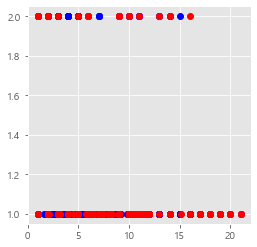

In [148]:
X_db = D_encoded_train[['해당층','욕실수','총주차대수','총층','관리비','보증금','전용면적']].values

db = DBSCAN(eps=25, min_samples=14).fit(X_db)
labels = db.labels_

display(pd.Series(labels).value_counts())

fig, ax = plt.subplots(figsize=(4,4))
colors = ['blue', 'red']

for color in colors:
    outlier_mask = labels == -1 if color == 'red' else labels != -1
    x = X_db[:, 0][outlier_mask]
    y = X_db[:, 1][outlier_mask]
    ax.plot(x, y, 'o', color=color)
    
plt.show()

In [149]:
outliers = D_encoded_train[labels == -1]
outliers.head(10)

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,...,중개사무소,제공플랫폼,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부,연도,월,요일,clusters
0,2,4025.0,4.7,21.412540,8.137562,15.0,2,1.0,1.0,0,...,1,2,0,1,1,0,2024,9,2,-1
11,0,915.0,7.5,31.320000,9.000000,15.0,3,2.0,2.0,0,...,0,2,0,0,0,0,2024,2,0,-1
14,1,4090.0,1.1,26.532251,3.000000,10.0,3,1.0,1.0,0,...,1,0,0,1,0,0,2024,10,5,-1
30,2,1020.0,4.0,29.480000,6.000000,8.0,0,2.0,2.0,1,...,0,2,0,0,0,0,2023,10,2,-1
34,2,3420.0,6.1,41.420000,8.000000,21.0,3,1.0,1.0,1,...,0,2,0,0,0,0,2024,7,5,-1
40,2,3610.0,4.4,17.500000,3.000000,9.0,0,1.0,1.0,0,...,0,0,0,0,0,0,2023,10,6,-1
62,2,4050.0,3.1,37.980000,4.000000,18.0,0,1.0,1.0,1,...,0,2,0,0,0,0,2024,3,1,-1
66,0,3215.0,2.3,26.440000,2.000000,3.0,3,2.0,1.0,1,...,1,0,0,0,0,1,2024,10,0,-1
84,2,3920.0,1.5,17.500000,12.000000,14.0,0,1.0,1.0,0,...,3,1,0,0,0,0,2024,9,2,-1
86,0,805.0,4.3,17.500000,12.000000,14.0,2,1.0,1.0,0,...,1,0,0,0,0,0,2024,9,1,-1


In [150]:
D_encoded_train.describe()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,...,중개사무소,제공플랫폼,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부,연도,월,요일,clusters
count,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,...,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000
mean,1.546577,1560.746269,3.799074,27.668038,4.821320,7.971179,1.247555,1.382913,1.033968,0.493567,...,1.753989,0.938240,0.120432,0.321668,0.084406,0.291302,2023.960371,7.109624,3.049923,0.952651
std,0.738640,1212.586225,2.059443,7.532310,3.419977,4.881731,1.307494,0.486222,0.181194,0.500087,...,1.803762,1.095959,0.325550,0.467236,0.278067,0.454479,0.439987,3.385439,2.006960,2.043004
min,0.000000,50.000000,0.000000,17.500000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,0.000000,0.000000,-1.000000
25%,1.000000,735.000000,2.000000,21.625428,2.000000,4.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.000000,5.000000,1.000000,0.000000
50%,2.000000,1315.000000,3.800000,26.720000,4.000000,6.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.000000,8.000000,3.000000,0.000000
75%,2.000000,1885.000000,5.500000,33.110968,6.000000,10.000000,3.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2024.000000,10.000000,5.000000,2.000000
max,2.000000,4090.000000,7.500000,49.970000,21.000000,21.000000,3.000000,2.000000,2.000000,1.000000,...,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2025.000000,11.000000,6.000000,10.000000


In [151]:
outliers.describe()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,...,중개사무소,제공플랫폼,허위매물여부,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부,연도,월,요일,clusters
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.0
mean,1.567568,2644.121622,3.696396,25.800174,7.059516,11.765766,1.405405,1.274775,1.081081,0.324324,...,1.180180,0.833333,0.072072,0.103604,0.135135,0.085586,2023.923423,6.972973,2.972973,-1.0
std,0.719749,1368.657984,2.142246,8.367872,4.894263,5.708539,1.361250,0.447410,0.273576,0.469180,...,1.635014,1.022005,0.259192,0.305434,0.342640,0.280383,0.492928,3.524855,1.974771,0.0
min,0.000000,95.000000,0.000000,17.500000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,0.000000,0.000000,-1.0
25%,1.000000,1303.750000,1.825000,17.500000,3.000000,6.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.000000,4.000000,1.000000,-1.0
50%,2.000000,3320.000000,3.700000,23.418889,6.000000,12.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.000000,8.000000,3.000000,-1.0
75%,2.000000,3871.250000,5.600000,32.169500,10.358573,16.000000,3.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2024.000000,10.000000,5.000000,-1.0
max,2.000000,4090.000000,7.500000,49.500000,21.000000,21.000000,3.000000,2.000000,2.000000,1.000000,...,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2025.000000,11.000000,6.000000,-1.0


DBSCAN을 통해 이상치를 제거한 모습. 이상치들의 값이 평균을 많이 벗어난 극단치이며, 이상치들의 허위매물비율이 평균과 크게 다르지 않으므로, 이상치 자체가 허위매물여부에 영향을 주지 않는 것으로 확인 되었다.

In [152]:
train_x['총주차대수'].describe()

count    1721.000000
mean       11.817847
std        12.047353
min         1.000000
25%         3.882415
50%         6.184624
75%        17.000000
max        54.000000
Name: 총주차대수, dtype: float64

## (3) 피처별로 적절한 변환 적용

왜도가 높은 피처를 탐색하여 왜도를 낮춰줌

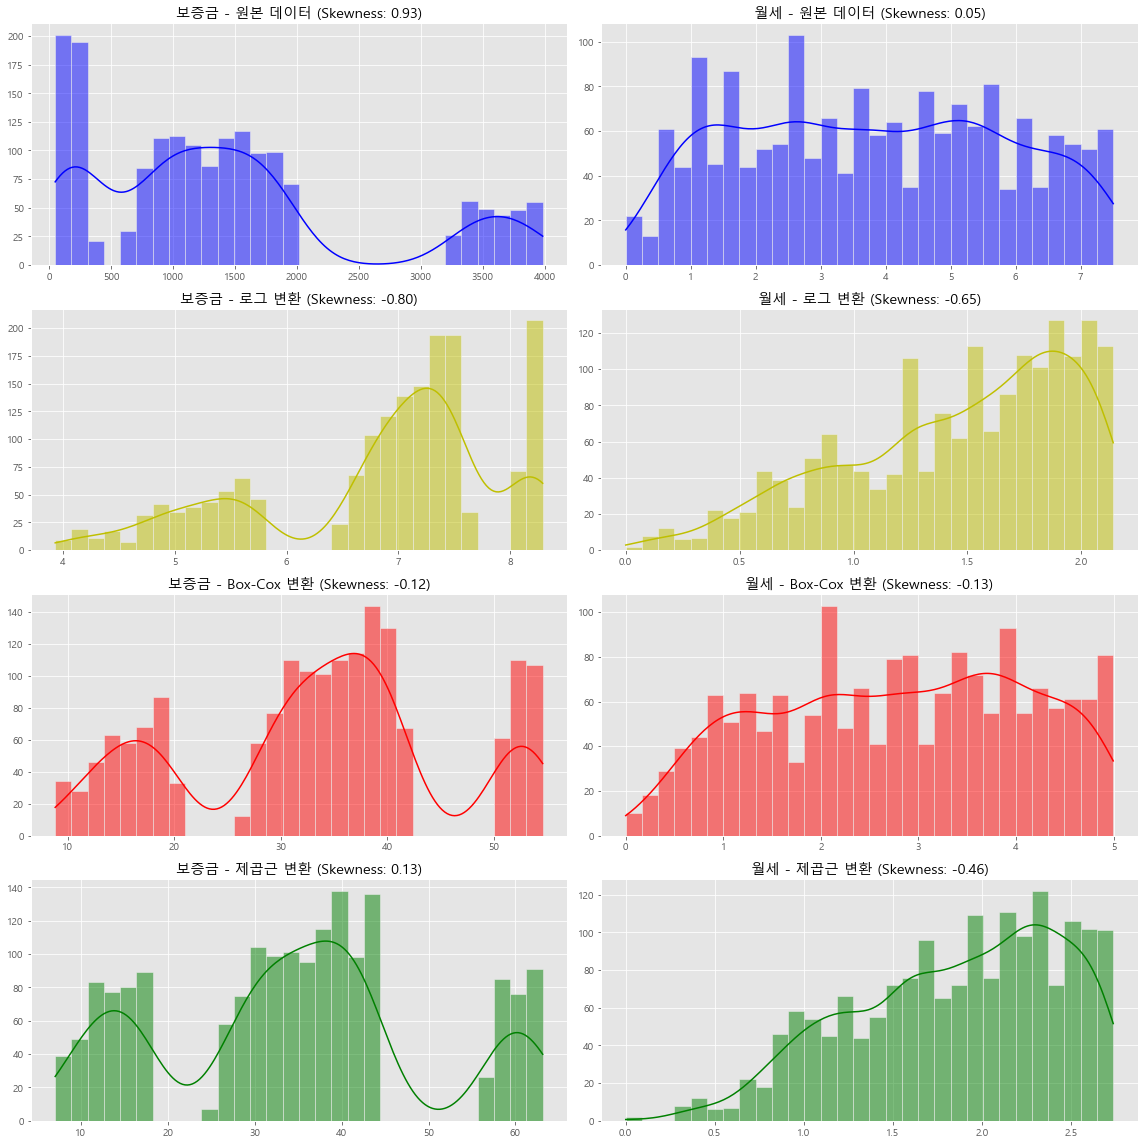

In [153]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
check_columns = ['보증금', '월세']
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 2, figsize=(16,16))

for i, col in enumerate(check_columns):
    
    log_data = np.log1p(train_x[col])
    # box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
    boxcox_data = pd.Series(stats.boxcox(train_x[col]+1)[0])
    # 제곱근 변환
    sqrt_data = np.sqrt(train_x[col])
    data_list = [train_x[col], log_data, boxcox_data, sqrt_data]

    # 시각화
    for j, data in enumerate(data_list):
        sns.histplot(data, kde=True, ax=axes[j,i], color=colors[j], bins=30)
        axes[j, i].set_title(f"{check_columns[i]} - {transformations[j]} (Skewness: {data.skew():.2f})")
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')

plt.tight_layout()
plt.show()

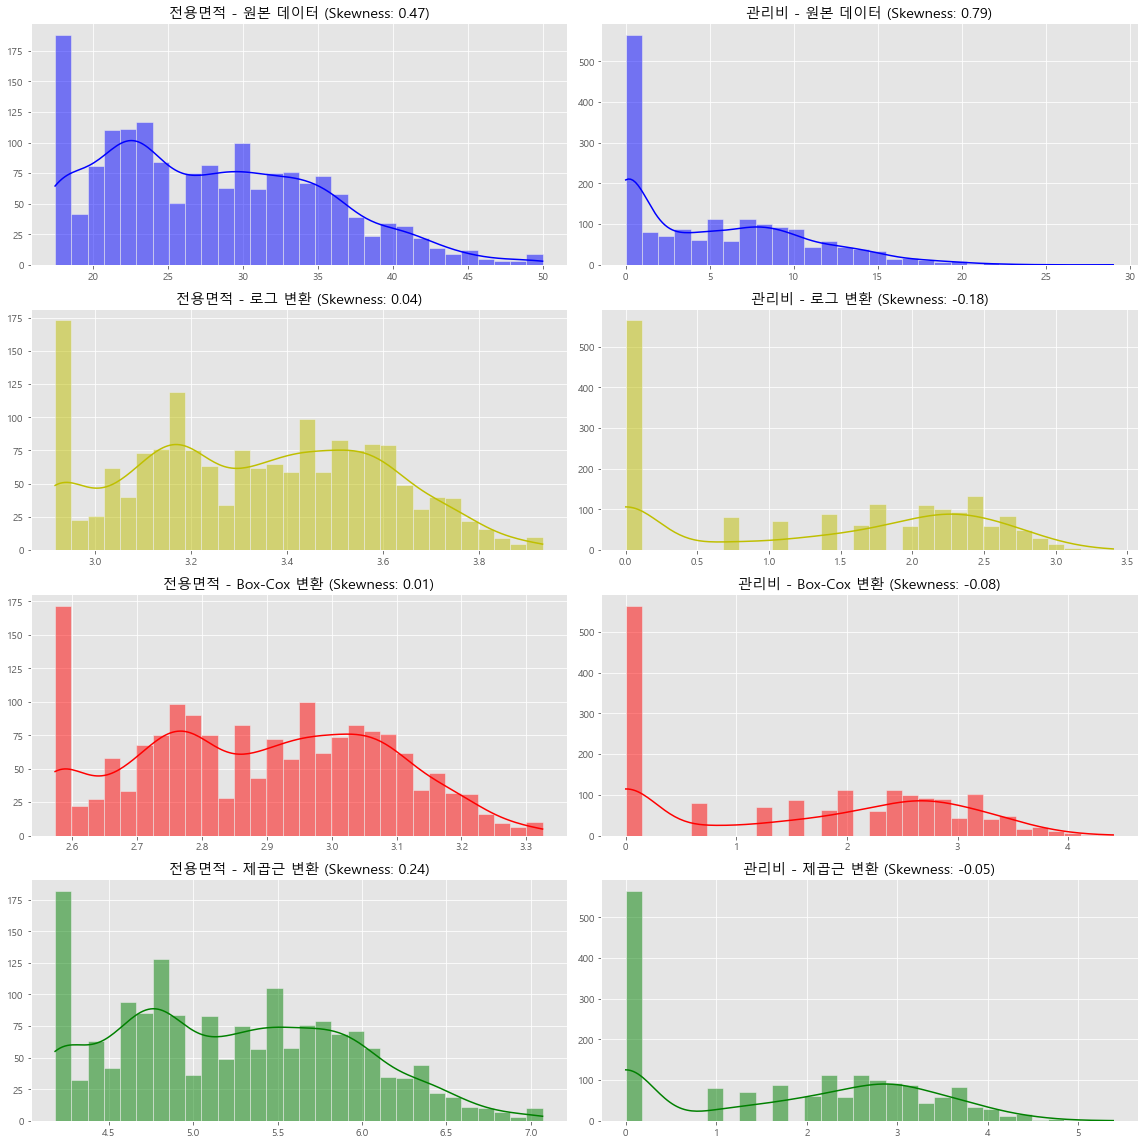

In [154]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
check_columns = ['전용면적', '관리비']
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 2, figsize=(16,16))

for i, col in enumerate(check_columns):
    
    log_data = np.log1p(train_x[col])
    # box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
    boxcox_data = pd.Series(stats.boxcox(train_x[col]+1)[0])
    # 제곱근 변환
    sqrt_data = np.sqrt(train_x[col])
    data_list = [train_x[col], log_data, boxcox_data, sqrt_data]

    # 시각화
    for j, data in enumerate(data_list):
        sns.histplot(data, kde=True, ax=axes[j,i], color=colors[j], bins=30)
        axes[j, i].set_title(f"{check_columns[i]} - {transformations[j]} (Skewness: {data.skew():.2f})")
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')

plt.tight_layout()
plt.show()

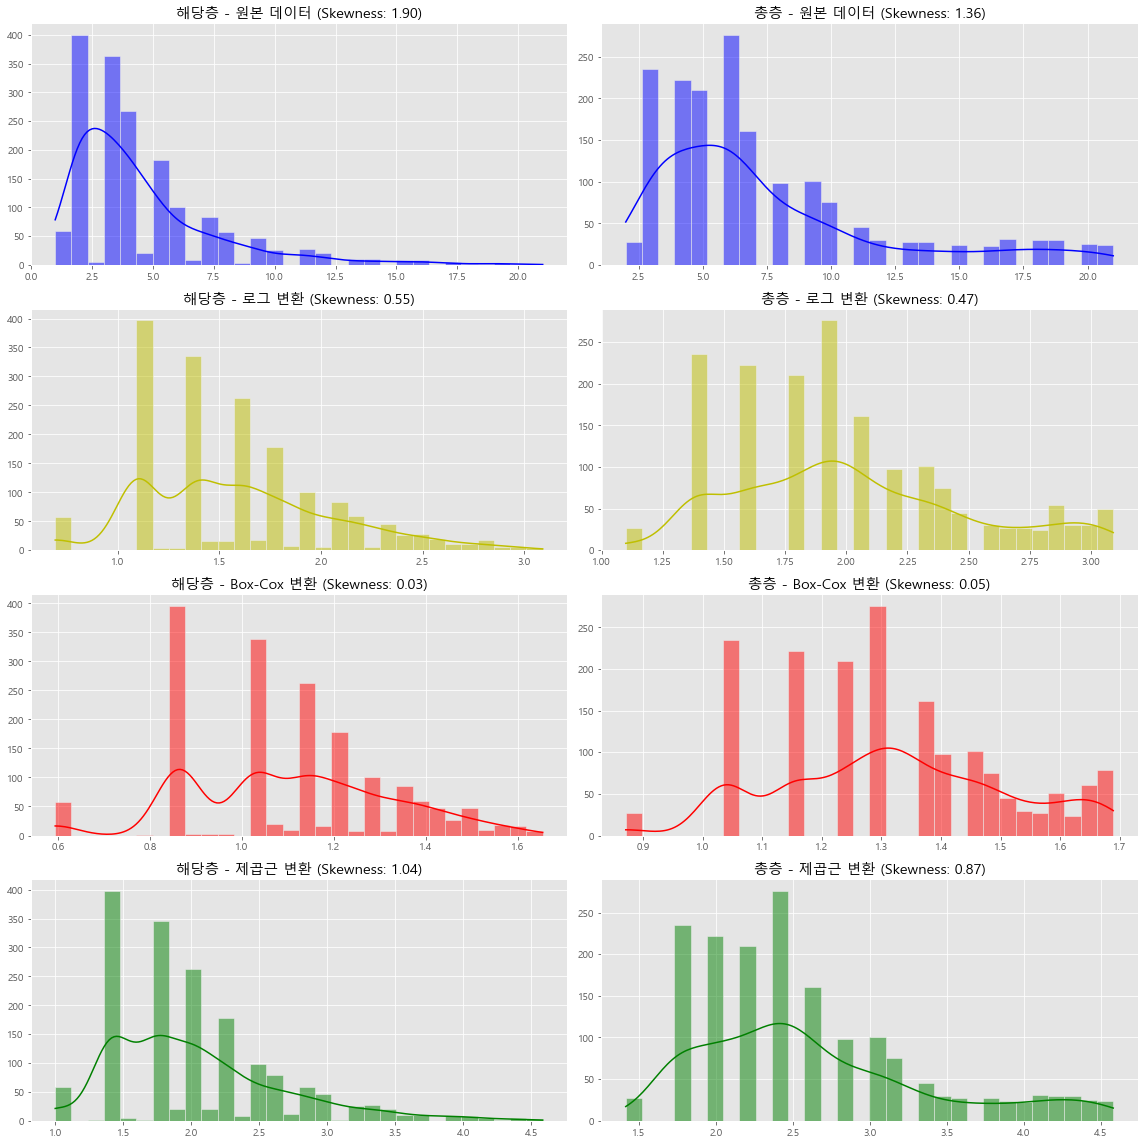

In [155]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
check_columns = ['해당층', '총층']
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 2, figsize=(16,16))

for i, col in enumerate(check_columns):
    
    log_data = np.log1p(train_x[col])
    # box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
    boxcox_data = pd.Series(stats.boxcox(train_x[col]+1)[0])
    # 제곱근 변환
    sqrt_data = np.sqrt(train_x[col])
    data_list = [train_x[col], log_data, boxcox_data, sqrt_data]

    # 시각화
    for j, data in enumerate(data_list):
        sns.histplot(data, kde=True, ax=axes[j,i], color=colors[j], bins=30)
        axes[j, i].set_title(f"{check_columns[i]} - {transformations[j]} (Skewness: {data.skew():.2f})")
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')

plt.tight_layout()
plt.show()

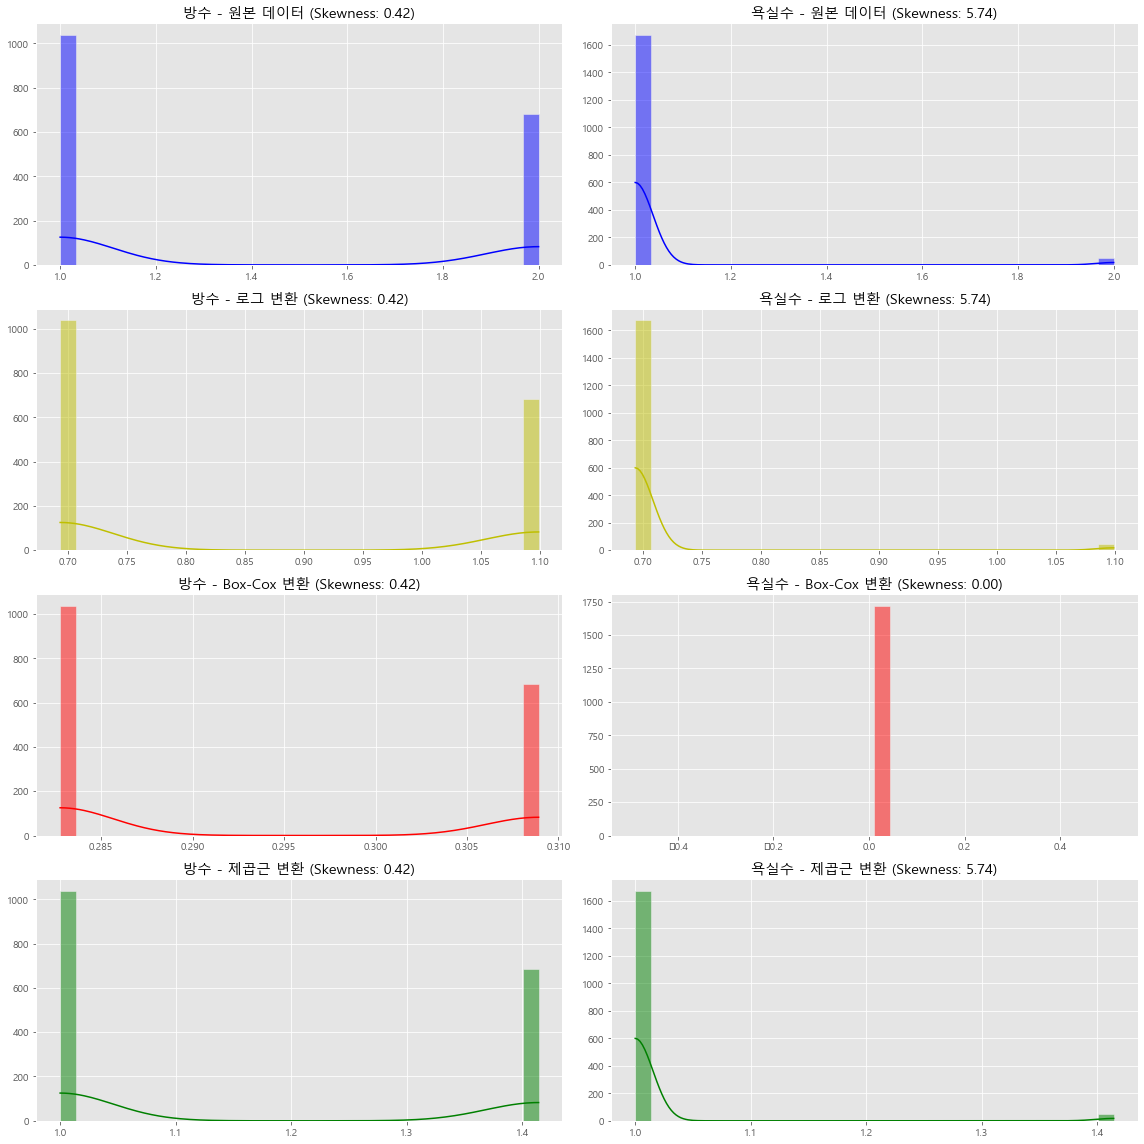

In [156]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
check_columns = ['방수', '욕실수']
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 2, figsize=(16,16))

for i, col in enumerate(check_columns):
    
    log_data = np.log1p(train_x[col])
    # box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
    boxcox_data = pd.Series(stats.boxcox(train_x[col]+1)[0])
    # 제곱근 변환
    sqrt_data = np.sqrt(train_x[col])
    data_list = [train_x[col], log_data, boxcox_data, sqrt_data]

    # 시각화
    for j, data in enumerate(data_list):
        sns.histplot(data, kde=True, ax=axes[j,i], color=colors[j], bins=30)
        axes[j, i].set_title(f"{check_columns[i]} - {transformations[j]} (Skewness: {data.skew():.2f})")
        axes[j, i].set_xlabel('')
        axes[j, i].set_ylabel('')

plt.tight_layout()
plt.show()

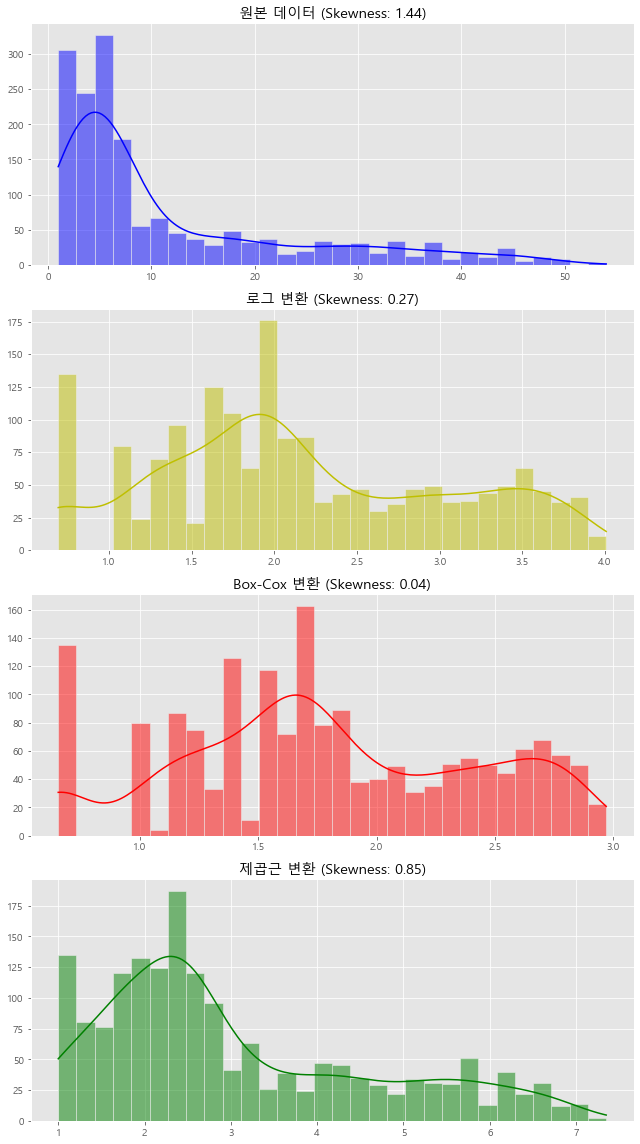

In [157]:
transformations = ["원본 데이터", "로그 변환", "Box-Cox 변환", "제곱근 변환"]
colors = ['b', 'y', 'r', 'g']

fig, axes = plt.subplots(4, 1, figsize=(9,16))

log_data = np.log1p(train_x['총주차대수'])
# box-cox변환 - stats.boxcox함수를 사용하여 변환을 수행한 후, 1을 더한다. [0] 인덱스로 변환된 데이터를 추출한 후, pandas Series로 변환한다.
boxcox_data = pd.Series(stats.boxcox(train_x['총주차대수']+1)[0])
# 제곱근 변환
sqrt_data = np.sqrt(train_x['총주차대수'])
data_list = [train_x['총주차대수'], log_data, boxcox_data, sqrt_data]

# 시각화
for i, data in enumerate(data_list):
    sns.histplot(data, kde=True, ax=axes[i], color=colors[i], bins=30)
    axes[i].set_title(f"{transformations[i]} (Skewness: {data.skew():.2f})")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [158]:
# 왜도 최소값을 위한 변환 함수

def transform_features(train, test):
    train_transformed = train.copy()
    test_transformed = test.copy()

    # Box-Cox 변환 (0 이하 값이 있으면 변환 불가능하므로 1 더함)
    boxcox_columns = ['보증금', '전용면적', '해당층', '총층', '총주차대수']
    for col in boxcox_columns:
        if (train_transformed[col] <= 0).any():
            train_transformed[col] = train_transformed[col] + abs(train_transformed[col].min()) + 1
        train_transformed[col], _ = stats.boxcox(train_transformed[col])

    # 제곱근 변환
    sqrt_columns = ['관리비']
    for col in sqrt_columns:
        train_transformed[col] = np.sqrt(train_transformed[col])
        
    # test data
    for col in boxcox_columns:
        if (test_transformed[col] <= 0).any():
            test_transformed[col] = test_transformed[col] + abs(test_transformed[col].min()) + 1
        test_transformed[col], _ = stats.boxcox(test_transformed[col])

    for col in sqrt_columns:
        test_transformed[col] = np.sqrt(test_transformed[col])
        
    return train_transformed, test_transformed

In [159]:
train_x, valid_x = transform_features(train_x, valid_x)

In [160]:
train_x.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부,연도,월,요일
2,1,33.556295,3.8,2.925666,0.659578,0.959389,0,1.0,1.0,1,1.928916,0.000000,4,0,1,0,1,2024,10,3
3,2,38.707576,0.3,3.259361,1.015878,1.686351,0,2.0,1.0,0,2.574896,3.162278,0,0,0,0,0,2024,10,1
4,2,51.876681,5.3,3.246692,1.015878,0.959389,0,2.0,1.0,1,1.102651,0.000000,4,2,1,0,1,2024,5,1
5,1,37.707351,5.3,3.088135,0.670775,0.959389,3,2.0,1.0,0,0.000000,0.000000,4,0,0,1,0,2024,8,3
6,2,52.021609,4.0,2.862761,0.659578,0.959389,3,1.0,1.0,1,1.852854,0.000000,2,3,1,0,1,2024,7,4


In [161]:
train_x.describe()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부,연도,월,요일
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000
mean,1.543870,33.317479,3.812318,3.011486,1.186480,1.456987,1.227193,1.396862,1.027891,0.515398,1.975732,1.784955,1.828007,0.951772,0.349797,0.077862,0.317838,2023.965137,7.127252,3.059849
std,0.741203,12.337793,2.048788,0.220279,0.489288,0.341340,1.299411,0.489389,0.164708,0.499908,1.041064,1.436401,1.811637,1.104693,0.477044,0.268032,0.465772,0.432615,3.367693,2.011426
min,0.000000,8.752933,0.000000,2.648334,0.000000,0.635875,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,0.000000,0.000000
25%,1.000000,27.271594,2.100000,2.841198,0.659578,1.169646,0.000000,1.000000,1.000000,0.000000,1.359236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.000000,5.000000,1.000000
50%,2.000000,34.585590,3.800000,3.022432,1.256317,1.441213,1.000000,1.000000,1.000000,1.000000,1.827082,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2024.000000,8.000000,3.000000
75%,2.000000,40.024227,5.500000,3.186905,1.489044,1.686351,3.000000,2.000000,1.000000,1.000000,2.845353,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,2024.000000,10.000000,5.000000
max,2.000000,54.791887,7.500000,3.519394,2.463318,2.124313,3.000000,2.000000,2.000000,1.000000,4.013076,5.385165,5.000000,3.000000,1.000000,1.000000,1.000000,2025.000000,11.000000,6.000000


## (4) StandardScaler를 통한 정규화 + BorderlineSMOTE를 활용한 클래스 불균형 처리

In [162]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [163]:
# StandardScaler를 통한 전처리(표준화 스케일링 - 평균을 0, 표준편차를 1로 조정하여 정규화)
scaler = StandardScaler()
train_x[['보증금', '월세', '전용면적', '해당층', '총층', '총주차대수', '관리비']] = scaler.fit_transform(train_x[['보증금', '월세', '전용면적', '해당층', '총층', '총주차대수', '관리비']])
valid_x[['보증금', '월세', '전용면적', '해당층', '총층', '총주차대수', '관리비']] = scaler.transform(valid_x[['보증금', '월세', '전용면적', '해당층', '총층', '총주차대수', '관리비']])

# BorderSMOTE를 통한 데이터의 증강(소수 클래스의 경계 영역에서 새로운 샘플을 생성하여 클래스간 불균형 문제를 해결)
Bordersmote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
x_Bordersmote, y_Bordersmote = Bordersmote.fit_resample(train_x, train_y)

extra = ExtraTreesClassifier(n_estimators=100, max_depth=8, random_state=42)
f1_scorer = make_scorer(f1_score, average='macro')
cross_val_scores = cross_val_score(extra, x_Bordersmote, y_Bordersmote, cv=3, scoring=f1_scorer)

mean_f1_score = np.mean(cross_val_scores)
print("Mean Cross-Validation F1 Score:", mean_f1_score)

Mean Cross-Validation F1 Score: 0.8424085859252664


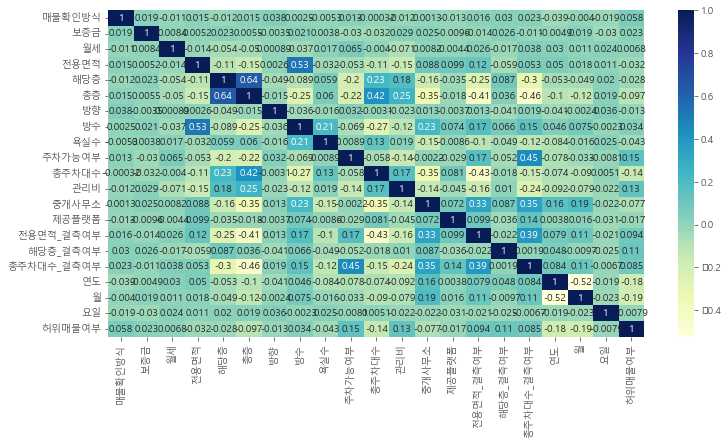

In [164]:
result = pd.concat([train_x, train_y], axis=1)
plt.figure(figsize=(12, 6))
sns.heatmap(result.corr(), annot=True, cmap="YlGnBu")
plt.show()

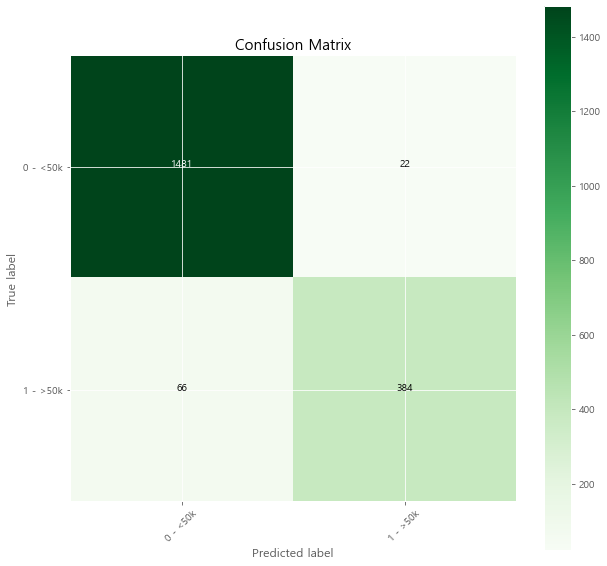

In [165]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

# cross_val_predict 함수를 사용하여 교차 검증 과정 중 각 샘플에 대한 예측값을 생성한다.
# 이 방법은 각 샘플이 다른 폴드에 의해 예측되어, 모델의 일반화 능력을 평가하는데 유용하다.
extra = ExtraTreesClassifier(random_state=42)
binary_pred = cross_val_predict(extra, x_Bordersmote, y_Bordersmote, cv=3)

# Confusion Matrix 생성 및 시각화
cm = confusion_matrix(y_Bordersmote, binary_pred)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix', size=15)
plt.colorbar()
classes = ['0 - <50k', '1 - >50k']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Matrix 안의 숫자 출력
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

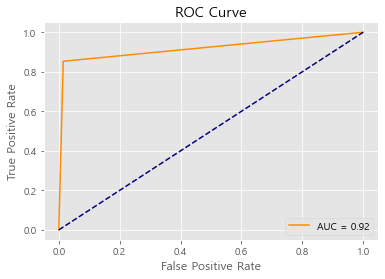

Returned AUC ROC Value: 0.9193479707252162


In [166]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC ROC를 계산하고 그래프를 그리는 함수
def calculate_and_plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)

    plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    return auc

# AUC ROC를 계산하고 반환하기
# calculate_and_plot_roc 함수에는 두 인자가 필요하다. 먼저 y_Bordersmote는 실제 타겟 변수의 값, binary_pred는 모델이 예측한 이진 분류 결과이다.
auc_value = calculate_and_plot_roc(y_Bordersmote, binary_pred)

# 반환된 AUC ROC 값 출력
print(f'Returned AUC ROC Value: {auc_value}')

In [167]:
extra.fit(x_Bordersmote, y_Bordersmote)  # 학습
y_pred_valid = extra.predict(valid_x)  # 검증 데이터 예측

valid_f1 = f1_score(valid_y, y_pred_valid, average='macro')
print("Validation F1 Score:", valid_f1)

Validation F1 Score: 0.8249554367201426


파라미터 설정

BorderlineSMOTE - sampling_strategy=0.3  
ExtraTreesClassifier - max_depth=8

성능평가

Train Mean Cross-Validation F1 Score: 0.8424085859252664  
Validation F1 Score: 0.8249554367201426

In [168]:
from collections import Counter

print("Original class distribution:", Counter(train_y))  
print("Resampled class distribution:", Counter(y_Bordersmote))

Original class distribution: Counter({0: 1503, 1: 218})
Resampled class distribution: Counter({0: 1503, 1: 450})


*** ExtraTreesClassifier가 아닌 RandomForestClassifier 사용

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

In [170]:

# BorderlineSMOTE 적용 (sampling_strategy 조정)
Bordersmote = BorderlineSMOTE(sampling_strategy=0.18, random_state=42)
x_Bordersmote, y_Bordersmote = Bordersmote.fit_resample(train_x, train_y)

# 증강된 데이터 분포 확인
print("Original class distribution:", Counter(train_y))  
print("Resampled class distribution:", Counter(y_Bordersmote))

# 모델 정의 (복잡도 조정)
rf = RandomForestClassifier(
    n_estimators=50, 
    max_depth=6,  
    min_samples_split=6,  # 분할 최소 샘플 수 완화
    min_samples_leaf=2,  # 리프 노드 최소 샘플 수 완화
    class_weight='balanced',  
    random_state=42
)

# StratifiedKFold 적용하여 교차 검증
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='macro')

cross_val_scores = cross_val_score(rf, x_Bordersmote, y_Bordersmote, cv=stratified_kf, scoring=f1_scorer)
mean_f1_score = np.mean(cross_val_scores)
print("Mean Cross-Validation F1 Score:", mean_f1_score)

# 모델 학습 및 예측
rf.fit(x_Bordersmote, y_Bordersmote)
y_pred_valid_proba = rf.predict_proba(valid_x)[:, 1]  # 확률값 예측

# 기본 Threshold (0.5)에서 예측
y_pred_valid = (y_pred_valid_proba >= 0.5).astype(int)
valid_f1 = f1_score(valid_y, y_pred_valid, average='macro')
print("Validation F1 Score (Default Threshold=0.5):", valid_f1)

# AUC ROC 계산
auc_value = roc_auc_score(valid_y, y_pred_valid_proba)
print(f"AUC ROC Score: {auc_value:.4f}")

# Precision-Recall Curve를 이용해 최적 Threshold 찾기
precision, recall, thresholds = precision_recall_curve(valid_y, y_pred_valid_proba)
f1_scores = (2 * precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold for F1-score: {best_threshold:.3f}")

# 최적 threshold 적용 후 재평가
y_pred_optimal = (y_pred_valid_proba >= best_threshold).astype(int)
valid_f1_optimal = f1_score(valid_y, y_pred_optimal, average='macro')
print("Validation F1 Score (Optimized Threshold):", valid_f1_optimal)

Original class distribution: Counter({0: 1503, 1: 218})
Resampled class distribution: Counter({0: 1503, 1: 270})
Mean Cross-Validation F1 Score: 0.8954268381193385
Validation F1 Score (Default Threshold=0.5): 0.8382977166276346
AUC ROC Score: 0.9658
Best Threshold for F1-score: 0.617
Validation F1 Score (Optimized Threshold): 0.8584032042723632


parameters  
n_estimators=100,  max_depth=8,  sampling_strategy=0.25  

Original class distribution: Counter({0: 1503, 1: 218})
Resampled class distribution: Counter({0: 1503, 1: 375})
Mean Cross-Validation F1 Score: 0.9214836192327291
Validation F1 Score: 0.8813224460628225
AUC ROC Score: 0.9812  

-> 과적합의 우려가 있음

---------------------------------------------------

parameters  
n_estimators=50,  max_depth=6,  sampling_strategy=0.15, min_samples_split=10

Original class distribution: Counter({0: 1503, 1: 218})  
Resampled class distribution: Counter({0: 1503, 1: 300})  
Mean Cross-Validation F1 Score: 0.8148561562112956  
Validation F1 Score: 0.7961162677088423  
AUC ROC Score: 0.9734  

-> 과적합의 우려가 있음

---------------------------------------------------

parameters  
n_estimators=50,  max_depth=5,  sampling_strategy=0.2, min_samples_split=5, min_samples_leaf=3

Original class distribution: Counter({0: 1503, 1: 218})  
Resampled class distribution: Counter({0: 1503, 1: 225})  
Mean Cross-Validation F1 Score: 0.7075916610867407  
Validation F1 Score: 0.6374308663743087  
AUC ROC Score: 0.9724  

---------------------------------------------------

n_estimators=50,  
    max_depth=6,  
    min_samples_split=8,  
    min_samples_leaf=3,  
    class_weight='balanced',  # 클래스 불균형 자동 조정  
    random_state=42
    
Original class distribution: Counter({0: 1503, 1: 218})  
Resampled class distribution: Counter({0: 1503, 1: 225})  
Mean Cross-Validation F1 Score: 0.8624378809907611  
Validation F1 Score: 0.8523197232874653  
AUC ROC Score: 0.9717  
Best Threshold for F1-score: 0.479  
Validation F1 Score (Optimized Threshold): 0.8668853032489396

# 고급모델 튜닝을 통한 성능 향상

In [171]:
!pip install lightgbm


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
!pip install optuna


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [173]:
!pip install tqdm


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [174]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb

import optuna
from tqdm import tqdm

pd.set_option('mode.chained_assignment',  None) 

In [175]:
# 스케일 변환 (보증금','월세')
def rescale_data(data):
    data['보증금'] = data['보증금'] / 100000
    data['월세'] = data['월세'] / 100000
    return data

# 재범주화 함수 ('방향','제공플랫폼','중개사무소')
def categorize_features(data, offices):
    
    # 방향 범주화
    data['방향'].replace(['북동향','남향'], '주거선호향', inplace=True)
    data['방향'].replace(['남동향','남서향','동향','북서향'], '그외', inplace=True)
    
    # 제공 플랫폼 범주화
    data['제공플랫폼'].replace(['D플랫폼','J플랫폼'], '초고위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['C플랫폼','A플랫폼','K플랫폼','H플랫폼'], '고위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['B플랫폼','G플랫폼','L플랫폼','E플랫폼'], '중위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['I플랫폼','F플랫폼','M플랫폼'], '저위험_플랫폼', inplace=True)
    
    for office in offices:
        data['중개사무소'].replace(offices[office], office, inplace=True)
    
    return data

# 중개사무소 카테고리화 함수
def categorize_offices(df):
    offices = {'A':[], 'B':[], 'C':[], 'D':[], 'E':[], 'F':[]}
    for office in eda_data['중개사무소'].unique():
        fake_rate = eda_data[eda_data['중개사무소']==office]['허위매물여부'].mean()
    
        if office == 'G52Iz8V2B9':
            offices['A'].append(office)
        elif fake_rate >= 0.2:
            offices['B'].append(office)
        elif fake_rate >= 0.15:
            offices['C'].append(office)
        elif fake_rate >= 0.1:
            offices['D'].append(office)
        elif fake_rate >= 0.05:
            offices['E'].append(office)
        else:
            offices['F'].append(office)
    
    return offices

# 결측치 제거/대체
def impute_missing_occupation(train_data):

    # 욕실수가 결측치인 피처 제거
    train_data = train_data.dropna(subset=["욕실수"])

    # 제거할 컬럼 설정
    cols_to_impute = ['전용면적','해당층','총주차대수']
    
    # 결측치 여부 피처 생성
    train_data["전용면적_결측여부"] = train_data["전용면적"].isnull().astype(int)
    train_data["해당층_결측여부"] = train_data["해당층"].isnull().astype(int)
    train_data["총주차대수_결측여부"] = train_data["총주차대수"].isnull().astype(int)
    
    # 결측치 여부 피처는 나중에 다시 concat
    train_if_missing = train_data[["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"]]
    train_data = train_data.drop(["전용면적_결측여부","해당층_결측여부","총주차대수_결측여부"], axis=1)
    
    for i, col in enumerate(cols_to_impute) :
    
        # 결측치가 있는 행과 없는 행의 분리
        train_no_nan = train_data[train_data[col].notnull()]
        train_nan = train_data[train_data[col].isnull()]
        
        # 랜덤 포레스트에 사용할 수치형 데이터 선택
        numeric_columns = train_no_nan.select_dtypes(include=['int', 'float']).columns.tolist()
        
        # 모델 학습
        X_train = train_no_nan[numeric_columns].drop([col], axis=1)
        y_train = train_no_nan[col]
    
        X_valid = train_nan[numeric_columns].drop([col], axis=1)
        y_valid = train_nan[col]
        
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)
        predicted_value = model.predict(X_valid)
        
        train_nan[col] = predicted_value
        
        train_data = pd.concat([train_no_nan,train_nan])
        
    train_imputed = pd.concat([train_data,train_if_missing], axis=1).sort_index()
    
    return train_imputed

def impute_missing_values(imputed_train, valid):
    
    imputed_train_data = imputed_train.copy()
    imputed_valid_data = valid.copy()
    
    imputed_train_data = imputed_train_data.drop(['ID'], axis=1)
    imputed_valid_data = imputed_valid_data.drop(['ID'], axis=1)
    
    # 결측치 여부 피처 생성
    imputed_valid_data["전용면적_결측여부"] = imputed_valid_data["전용면적"].isnull().astype(int)
    imputed_valid_data["해당층_결측여부"] = imputed_valid_data["해당층"].isnull().astype(int)
    imputed_valid_data["총주차대수_결측여부"] = imputed_valid_data["총주차대수"].isnull().astype(int)

    freq_imputer = SimpleImputer(strategy='most_frequent')
    freq_imputer.fit(imputed_train_data[['해당층','총주차대수']])
    imputed_valid_data[['해당층','총주차대수']]= freq_imputer.transform(imputed_valid_data[['해당층','총주차대수']])
    
    median_imputer = SimpleImputer(strategy='median')
    median_imputer.fit(imputed_train_data[['전용면적']])
    imputed_valid_data[['전용면적']] = median_imputer.transform(imputed_valid_data[['전용면적']])

    return imputed_train_data, imputed_valid_data

# 게재일 피처 레이블인코딩
def Datetime_Conversion_label(train_data, test_data):
    
    train_data["게재일"] = pd.to_datetime(train_data["게재일"])
    test_data["게재일"] = pd.to_datetime(test_data["게재일"])
    
    # 연도, 월, 요일 정보 추가
    train_data["연도"] = train_data["게재일"].dt.year
    train_data["월"] = train_data["게재일"].dt.month
    train_data["요일"] = train_data["게재일"].dt.dayofweek  # 0=월요일, 6=일요일
    
    test_data["연도"] = test_data["게재일"].dt.year
    test_data["월"] = test_data["게재일"].dt.month
    test_data["요일"] = test_data["게재일"].dt.dayofweek

    # Label Encoding 적용 (같은 클래스 유지)
    le_month = LabelEncoder()
    le_day = LabelEncoder()
    
    train_data["월"] = le_month.fit_transform(train_data["월"])
    train_data["요일"] = le_day.fit_transform(train_data["요일"])

    # 테스트 데이터 변환 시 train에서 학습한 클래스 목록 유지
    test_data["월"] = test_data["월"].map(lambda x: le_month.transform([x])[0] if x in le_month.classes_ else -1)
    test_data["요일"] = test_data["요일"].map(lambda x: le_day.transform([x])[0] if x in le_day.classes_ else -1)

    # '게재일' 피처 제거
    train_datetime_converted = train_data.drop(["게재일"], axis=1)
    test_datetime_converted = test_data.drop(["게재일"], axis=1)
    
    return train_datetime_converted, test_datetime_converted

# 나머지 카테고리형 피처 인코딩
def Label_encoding(train_data, test_data):
    
    encoded_train = train_data.copy()
    encoded_valid = test_data.copy()
    
    # target 피처 제외
    for col in encoded_train.columns[0:-1]: 
        if encoded_train[col].dtypes == 'object':

            le = LabelEncoder()
            encoded_train[col] = le.fit_transform(encoded_train[col])

            for label in np.unique(encoded_valid[col]):
                if label not in le.classes_:
                    le.classes_ = np.append(le.classes_, label)
            encoded_valid[col] = le.transform(encoded_valid[col])
    return encoded_train, encoded_valid

# dbscan 함수
def dbscan_encoding(train, valid, eps=25, min_samples=14):

    # 데이터 복사
    D_encoded_train = train.copy()
    D_encoded_valid = valid.copy()

    # DBSCAN을 적용할 피처 선택
    X_sample_scaled = D_encoded_train[['해당층', '욕실수', '총주차대수', '총층', '관리비', '보증금', '전용면적']]

    # DBSCAN 모델 학습 및 클러스터 할당
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters_sample = dbscan.fit_predict(X_sample_scaled)

    # 클러스터 결과 저장
    D_encoded_train['clusters'] = clusters_sample

    # 이상치 제거 (-1 클러스터 제외)
    sample_no_outliers = D_encoded_train[D_encoded_train['clusters'] != -1]

    # 타겟 변수 및 피처 분리
    train_y = sample_no_outliers['허위매물여부']
    train_x = sample_no_outliers.drop(['허위매물여부', 'clusters'], axis=1)

    valid_y = D_encoded_valid['허위매물여부']
    valid_x = D_encoded_valid.drop(['허위매물여부'], axis=1)

    return train_x, train_y, valid_x, valid_y

# 왜도 최소값을 위한 변환 함수

def transform_features(train, test):
    train_transformed = train.copy()
    test_transformed = test.copy()

    # Box-Cox 변환 (0 이하 값이 있으면 변환 불가능하므로 1 더함)
    boxcox_columns = ['보증금', '전용면적', '해당층', '총층', '총주차대수']
    for col in boxcox_columns:
        if (train_transformed[col] <= 0).any():
            train_transformed[col] = train_transformed[col] + abs(train_transformed[col].min()) + 1
        train_transformed[col], _ = stats.boxcox(train_transformed[col])

    # 제곱근 변환
    sqrt_columns = ['관리비']
    for col in sqrt_columns:
        train_transformed[col] = np.sqrt(train_transformed[col])
        
    # test data
    for col in boxcox_columns:
        if (test_transformed[col] <= 0).any():
            test_transformed[col] = test_transformed[col] + abs(test_transformed[col].min()) + 1
        test_transformed[col], _ = stats.boxcox(test_transformed[col])

    for col in sqrt_columns:
        test_transformed[col] = np.sqrt(test_transformed[col])
        
    return train_transformed, test_transformed

# StandardScaler를 통한 전처리 함수

def scale_features(train, valid, features):
    
    scaler = StandardScaler()
    train_data_scaled = train.copy()
    train_data_scaled[features] = scaler.fit_transform(train_data_scaled[features])
    
    valid_data_scaled = valid.copy()
    valid_data_scaled[features] = scaler.transform(valid_data_scaled[features])
    
    return train_data_scaled, valid_data_scaled

In [176]:
train_origin = pd.read_csv('train.csv')
train_data, valid_data = train_test_split(train_origin, test_size=0.2, random_state=42, stratify=train_origin['허위매물여부'])

offices = categorize_offices(train_data)
train_origin =  categorize_features(train_data,offices)
valid_data = categorize_features(valid_data,offices)
train_imputed = impute_missing_occupation(train_origin)

imputed_train_data, imputed_valid_data = impute_missing_values(train_imputed,valid_data)
train_datetime_converted, test_datetime_converted = Datetime_Conversion_label(imputed_train_data, imputed_valid_data)
encoded_train, encoded_valid = Label_encoding(train_datetime_converted, test_datetime_converted)

encoded_train = rescale_data(encoded_train)
encoded_valid = rescale_data(encoded_valid)

train_x, train_y, valid_x, valid_y = dbscan_encoding(encoded_train, encoded_valid)
train_transformed, test_transformed = transform_features(train_x, valid_x)

fetures_to_scale = ['보증금', '월세', '전용면적', '해당층', '총층', '총주차대수', '관리비']
train_data_scaled, valid_data_scaled = scale_features(train_transformed, test_transformed, fetures_to_scale)

In [177]:
train_data_scaled.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,전용면적_결측여부,해당층_결측여부,총주차대수_결측여부,연도,월,요일
2,1,0.019362,-0.006014,-0.389713,-1.077189,-1.458202,0,1.0,1.0,1,-0.044983,-1.243019,4,0,1,0,1,2024,10,3
3,2,0.437004,-1.714837,1.125607,-0.348775,0.672143,0,2.0,1.0,0,0.575698,0.959150,0,0,0,0,0,2024,10,1
4,2,1.504693,0.726339,1.068075,-0.348775,-1.458202,0,2.0,1.0,1,-0.838888,-1.243019,4,2,1,0,1,2024,5,1
5,1,0.355910,0.726339,0.348064,-1.054296,-1.458202,3,2.0,1.0,0,-1.898353,-1.243019,4,0,0,1,0,2024,8,3
6,2,1.516444,0.091633,-0.675366,-1.077189,-1.458202,3,1.0,1.0,1,-0.118066,-1.243019,2,3,1,0,1,2024,7,4


## 1) LightGBM 모델의 성능 향상을 위한 Hyperparameter Tuning

In [178]:
LGBM_train_x = train_data_scaled.copy()
LGBM_train_y = train_y.copy()

# scaled_train_x와 scaled_valid_x는 특성 데이터이다. 이미 스케일링 처리가 되어있다.
# train_y와 valid_y는 레이블 데이터로 0과 1의 카테고리 값을 가지고 있다.

# 1. 데이터를 StratifiedKFold로 분할
fold_num = 5
skf = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=42)

# 2. Objective 함수 설정
def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'n_estimators': 100,
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
        'verbose': -1
    }
# Optuna를 통해 하이퍼파라미터를 최적화에는 objective 함수가 사용된다.


    # 폴드별 Macro F1 스코어를 저장할 리스트
    macro_f1_scores = []

    # 각 폴드에 대해서 반복.
    for train_idx, valid_idx in skf.split(LGBM_train_x, LGBM_train_y):
        X_train_fold, X_valid_fold = LGBM_train_x.iloc[train_idx], LGBM_train_x.iloc[valid_idx]
        y_train_fold, y_valid_fold = LGBM_train_y.iloc[train_idx], LGBM_train_y.iloc[valid_idx]

        # SMOTE 적용
        # BorderlineSMOTE는 불균형한 데이터셋을 처리하기 위핸 오버샘플링 기법(소수 클래스를 증가)
        smote = BorderlineSMOTE(random_state=24)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        model = lgb.LGBMClassifier(**params)
        model.fit(X_train_smote, y_train_smote)
        predictions = model.predict(X_valid_fold)

        # Macro F1 계산
        macro_f1 = f1_score(y_valid_fold, predictions, average='macro')
        macro_f1_scores.append(macro_f1)

    return np.mean(macro_f1_scores)

## 2) Optuna를 활용한 LightGBM Hyperparameter 튜닝

In [179]:
from lightgbm import early_stopping

# 3. Optuna 최적화
def optimize_lgbm_with_optuna(LGBM_train_x, LGBM_train_y, fold_num=5):
    predictions_of_all_folds = []
    macro_f1_scores = []

    for fold, (train_idx, valid_idx) in enumerate(tqdm(StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=42).split(LGBM_train_x, LGBM_train_y), total=fold_num)):
        X_train_fold, X_valid_fold = LGBM_train_x.iloc[train_idx], LGBM_train_x.iloc[valid_idx]
        y_train_fold, y_valid_fold = LGBM_train_y.iloc[train_idx], LGBM_train_y.iloc[valid_idx]

        # BorderlineSMOTE 적용
        smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        sampler = optuna.samplers.TPESampler(seed=42)
        study = optuna.create_study(
            study_name=f'lgbm_parameter_optuna_fold_{fold}',
            direction='maximize',
            sampler=sampler,
        )
        study.optimize(objective, n_trials=10)

        lgbm_best_params = study.best_params

        model = lgb.LGBMClassifier(**lgbm_best_params)
        model.fit(X_train_smote, y_train_smote, eval_set=[(X_valid_fold, y_valid_fold)], callbacks=[early_stopping(stopping_rounds=50)])

        predictions = model.predict(X_valid_fold)
        predictions_of_all_folds.append(predictions)

        # Macro F1 스코어 계산 및 출력
        macro_f1 = f1_score(y_valid_fold, predictions, average='macro')
        macro_f1_scores.append(macro_f1)

    avg_macro_f1 = np.mean(macro_f1_scores)
    return predictions_of_all_folds, macro_f1_scores, avg_macro_f1, lgbm_best_params

predictions, macro_f1_scores, avg_macro_f1, lgbm_best_params = optimize_lgbm_with_optuna(LGBM_train_x, LGBM_train_y, fold_num=5)

print('각 폴드의 Macro F1 스코어:', macro_f1_scores, 
      '\n평균 Macro F1 스코어:', avg_macro_f1, 
      '\n최적의 하이퍼파라미터:', lgbm_best_params)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s][I 2025-03-01 19:38:19,736] A new study created in memory with name: lgbm_parameter_optuna_fold_0
[I 2025-03-01 19:38:20,456] Trial 0 finished with value: 0.8963257960397669 and parameters: {'learning_rate': 0.043284502212938815, 'colsample_bytree': 0.9753571532049581, 'max_depth': 16, 'num_leaves': 68, 'min_child_samples': 19, 'reg_alpha': 8.629132190071849e-05, 'reg_lambda': 2.231010801867923e-05}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:20,686] Trial 1 finished with value: 0.8959467784037626 and parameters: {'learning_rate': 0.29621516588303487, 'colsample_bytree': 0.8005575058716043, 'max_depth': 16, 'num_leaves': 21, 'min_child_samples': 98, 'reg_alpha': 0.9877700294007907, 'reg_lambda': 0.00018794668241638458}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:21,121] Trial 2 finished with value: 0.8793512212310809 an

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.0948657


[I 2025-03-01 19:38:24,140] Trial 0 finished with value: 0.8963257960397669 and parameters: {'learning_rate': 0.043284502212938815, 'colsample_bytree': 0.9753571532049581, 'max_depth': 16, 'num_leaves': 68, 'min_child_samples': 19, 'reg_alpha': 8.629132190071849e-05, 'reg_lambda': 2.231010801867923e-05}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:24,376] Trial 1 finished with value: 0.8959467784037626 and parameters: {'learning_rate': 0.29621516588303487, 'colsample_bytree': 0.8005575058716043, 'max_depth': 16, 'num_leaves': 21, 'min_child_samples': 98, 'reg_alpha': 0.9877700294007907, 'reg_lambda': 0.00018794668241638458}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:24,786] Trial 2 finished with value: 0.8793512212310809 and parameters: {'learning_rate': 0.020366442026830918, 'colsample_bytree': 0.5917022549267169, 'max_depth': 9, 'num_leaves': 62, 'min_child_samples': 46, 'reg_alpha': 0.000558952420521792, 'reg_lambda': 0.0468940096353

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.138047


[I 2025-03-01 19:38:27,790] Trial 0 finished with value: 0.8963257960397669 and parameters: {'learning_rate': 0.043284502212938815, 'colsample_bytree': 0.9753571532049581, 'max_depth': 16, 'num_leaves': 68, 'min_child_samples': 19, 'reg_alpha': 8.629132190071849e-05, 'reg_lambda': 2.231010801867923e-05}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:28,020] Trial 1 finished with value: 0.8959467784037626 and parameters: {'learning_rate': 0.29621516588303487, 'colsample_bytree': 0.8005575058716043, 'max_depth': 16, 'num_leaves': 21, 'min_child_samples': 98, 'reg_alpha': 0.9877700294007907, 'reg_lambda': 0.00018794668241638458}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:28,441] Trial 2 finished with value: 0.8793512212310809 and parameters: {'learning_rate': 0.020366442026830918, 'colsample_bytree': 0.5917022549267169, 'max_depth': 9, 'num_leaves': 62, 'min_child_samples': 46, 'reg_alpha': 0.000558952420521792, 'reg_lambda': 0.0468940096353

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[53]	valid_0's binary_logloss: 0.0899255


[I 2025-03-01 19:38:31,879] Trial 0 finished with value: 0.8963257960397669 and parameters: {'learning_rate': 0.043284502212938815, 'colsample_bytree': 0.9753571532049581, 'max_depth': 16, 'num_leaves': 68, 'min_child_samples': 19, 'reg_alpha': 8.629132190071849e-05, 'reg_lambda': 2.231010801867923e-05}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:32,158] Trial 1 finished with value: 0.8959467784037626 and parameters: {'learning_rate': 0.29621516588303487, 'colsample_bytree': 0.8005575058716043, 'max_depth': 16, 'num_leaves': 21, 'min_child_samples': 98, 'reg_alpha': 0.9877700294007907, 'reg_lambda': 0.00018794668241638458}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:32,594] Trial 2 finished with value: 0.8793512212310809 and parameters: {'learning_rate': 0.020366442026830918, 'colsample_bytree': 0.5917022549267169, 'max_depth': 9, 'num_leaves': 62, 'min_child_samples': 46, 'reg_alpha': 0.000558952420521792, 'reg_lambda': 0.0468940096353

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.0863635


[I 2025-03-01 19:38:35,795] Trial 0 finished with value: 0.8963257960397669 and parameters: {'learning_rate': 0.043284502212938815, 'colsample_bytree': 0.9753571532049581, 'max_depth': 16, 'num_leaves': 68, 'min_child_samples': 19, 'reg_alpha': 8.629132190071849e-05, 'reg_lambda': 2.231010801867923e-05}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:36,036] Trial 1 finished with value: 0.8959467784037626 and parameters: {'learning_rate': 0.29621516588303487, 'colsample_bytree': 0.8005575058716043, 'max_depth': 16, 'num_leaves': 21, 'min_child_samples': 98, 'reg_alpha': 0.9877700294007907, 'reg_lambda': 0.00018794668241638458}. Best is trial 0 with value: 0.8963257960397669.
[I 2025-03-01 19:38:36,572] Trial 2 finished with value: 0.8793512212310809 and parameters: {'learning_rate': 0.020366442026830918, 'colsample_bytree': 0.5917022549267169, 'max_depth': 9, 'num_leaves': 62, 'min_child_samples': 46, 'reg_alpha': 0.000558952420521792, 'reg_lambda': 0.0468940096353

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.115879
각 폴드의 Macro F1 스코어: [0.892403089398081, 0.8264817150063052, 0.916928278193673, 0.9292763157894737, 0.893687707641196] 
평균 Macro F1 스코어: 0.8917554212057459 
최적의 하이퍼파라미터: {'learning_rate': 0.23628864184236406, 'colsample_bytree': 0.6523068845866853, 'max_depth': 6, 'num_leaves': 75, 'min_child_samples': 47, 'reg_alpha': 5.397956855996442e-05, 'reg_lambda': 0.009355380606452175}


valid_0's binary_logloss: 0.115879  
각 폴드의 Macro F1 스코어: [0.892403089398081, 0.8264817150063052, 0.916928278193673, 0.9292763157894737, 0.893687707641196]   
평균 Macro F1 스코어: 0.8917554212057459   
최적의 하이퍼파라미터: {'learning_rate': 0.23628864184236406, 'colsample_bytree': 0.6523068845866853, 'max_depth': 6, 'num_leaves': 75, 'min_child_samples': 47, 'reg_alpha': 5.397956855996442e-05, 'reg_lambda': 0.009355380606452175}

## 3) Optuna를 활용한 Gradient Boosting Hyperparameter 튜닝

In [180]:
GB_train_x = train_data_scaled.copy()
GB_train_y = train_y.copy()

# 1. Objective 함수 설정
def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),
        'max_depth': trial.suggest_int('max_depth', 1, 6),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'n_estimators': 100,
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
    }

    macro_f1_scores = []

    for train_idx, valid_idx in skf.split(GB_train_x, GB_train_y):
        X_train_fold, X_valid_fold = GB_train_x.iloc[train_idx], GB_train_x.iloc[valid_idx]
        y_train_fold, y_valid_fold = GB_train_y.iloc[train_idx], GB_train_y.iloc[valid_idx]

        smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        model = GradientBoostingClassifier(**params)

        model.fit(X_train_smote, y_train_smote)
        predictions = model.predict(X_valid_fold)

        macro_f1 = f1_score(y_valid_fold, predictions, average='macro')
        macro_f1_scores.append(macro_f1)

    return np.mean(macro_f1_scores)

# 2. Optuna 최적화
def optimize_gb_with_optuna(GB_train_x, GB_train_y, fold_num=5):
    predictions_of_all_folds = []
    macro_f1_scores = []
    
    for fold, (train_idx, valid_idx) in enumerate(skf.split(GB_train_x, GB_train_y)):
        X_train_fold, X_valid_fold = GB_train_x.iloc[train_idx], GB_train_x.iloc[valid_idx]
        y_train_fold, y_valid_fold = GB_train_y.iloc[train_idx], GB_train_y.iloc[valid_idx]

        smote = BorderlineSMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        sampler = optuna.samplers.TPESampler(seed=42)
        study = optuna.create_study(
            study_name=f'gb_parameter_optuna_fold_{fold}',
            direction='maximize',
            sampler=sampler,
        )
        study.optimize(objective, n_trials=10)

        gb_best_params = study.best_params

        model = GradientBoostingClassifier(**gb_best_params)
        model.fit(X_train_smote, y_train_smote)

        predictions = model.predict(X_valid_fold)
        predictions_of_all_folds.append(predictions)

        macro_f1 = f1_score(y_valid_fold, predictions, average='macro')
        macro_f1_scores.append(macro_f1)

    avg_macro_f1 = np.mean(macro_f1_scores)
    return predictions_of_all_folds, macro_f1_scores, avg_macro_f1, gb_best_params

predictions, macro_f1_scores, avg_macro_f1, gb_best_params = optimize_gb_with_optuna(GB_train_x, GB_train_y, fold_num=5)

print('n각 폴드의 Macro F1 스코어:', macro_f1_scores, 
      '\n평균 Macro F1 스코어:', avg_macro_f1, 
      '\n최적의 하이퍼파라미터:', gb_best_params)

[I 2025-03-01 19:38:39,842] A new study created in memory with name: gb_parameter_optuna_fold_0
[I 2025-03-01 19:38:41,044] Trial 0 finished with value: 0.8963081180438284 and parameters: {'learning_rate': 0.043284502212938815, 'loss': 'log_loss', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 4, 'subsample': 0.15227525095137953}. Best is trial 0 with value: 0.8963081180438284.
[I 2025-03-01 19:38:41,743] Trial 1 finished with value: 0.8891978429306435 and parameters: {'learning_rate': 0.29621516588303487, 'loss': 'exponential', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 17, 'subsample': 0.29110519961044856}. Best is trial 0 with value: 0.8963081180438284.
[I 2025-03-01 19:38:44,088] Trial 2 finished with value: 0.8957722147965607 and parameters: {'learning_rate': 0.020366442026830918, 'loss': 'exponential', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 7, 'subsample': 0.6506676052501416}. Best is trial 0 with value: 0.8963081180438284.
[I 2

[I 2025-03-01 19:39:31,836] Trial 7 finished with value: 0.8996789161068909 and parameters: {'learning_rate': 0.02060924941320236, 'loss': 'log_loss', 'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 13, 'subsample': 0.9296868115208051}. Best is trial 7 with value: 0.8996789161068909.
[I 2025-03-01 19:39:33,425] Trial 8 finished with value: 0.7298228532063038 and parameters: {'learning_rate': 0.014136637008121847, 'loss': 'log_loss', 'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 7, 'subsample': 0.8458637582367364}. Best is trial 7 with value: 0.8996789161068909.
[I 2025-03-01 19:39:35,918] Trial 9 finished with value: 0.6319889722758567 and parameters: {'learning_rate': 0.04037506188440756, 'loss': 'exponential', 'max_depth': 1, 'min_samples_leaf': 17, 'min_samples_split': 3, 'subsample': 0.9881982429404655}. Best is trial 7 with value: 0.8996789161068909.
[I 2025-03-01 19:39:39,352] A new study created in memory with name: gb_parameter_optuna_fold_3
[I 2025-0

n각 폴드의 Macro F1 스코어: [0.9064406779661016, 0.8520811833505332, 0.8859874055855008, 0.893687707641196, 0.8665474724644526] 
평균 Macro F1 스코어: 0.8809488894015569 
최적의 하이퍼파라미터: {'learning_rate': 0.02060924941320236, 'loss': 'log_loss', 'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 13, 'subsample': 0.9296868115208051}


n각 폴드의 Macro F1 스코어: [0.9084475895621407, 0.8092068774265113, 0.8859874055855008, 0.8881557557327826, 0.8527397260273972]   
평균 Macro F1 스코어: 0.8689074708668665   
최적의 하이퍼파라미터: {'learning_rate': 0.02060924941320236, 'loss': 'log_loss', 'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 13, 'subsample': 0.9296868115208051}

## 4) Hard Voting을 활용한 Gradient Boosting과 LightGBM 앙상블 학습

In [181]:
hard_train_x = train_data_scaled.copy()
hard_train_y = train_y.copy()

fold_num = 5 
skf = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=42)

gb_classifier = GradientBoostingClassifier(**gb_best_params)
lgbm_classifier = lgb.LGBMClassifier(**lgbm_best_params)

# 모델들을 VotingClassifier로 결합 (Hard Voting)
voting_classifier = VotingClassifier(
    estimators=[('gb', gb_classifier), ('lgbm', lgbm_classifier)],
    voting='hard'
)

# 각 fold 별로 SMOTE와 모델 학습을 수행하고 Macro F1 스코어 계산
macro_f1_scores = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(hard_train_x, hard_train_y)):
    X_train_fold, X_valid_fold = hard_train_x.iloc[train_idx], hard_train_x.iloc[valid_idx]
    y_train_fold, y_valid_fold = hard_train_y.iloc[train_idx], hard_train_y.iloc[valid_idx]

    smote = BorderlineSMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

    voting_classifier.fit(X_train_smote, y_train_smote)
    predictions = voting_classifier.predict(X_valid_fold)

    macro_f1 = f1_score(y_valid_fold, predictions, average='macro')
    macro_f1_scores.append(macro_f1)

# 모든 폴드의 Macro F1 스코어 출력
for fold, macro_f1 in enumerate(macro_f1_scores):
    print(f"Fold {fold + 1} Macro F1 Score: {macro_f1}")

# 모든 폴드의 Macro F1 스코어 평균 출력
avg_macro_f1 = np.mean(macro_f1_scores)
print(f"Average Macro F1 Score: {avg_macro_f1}")

Fold 1 Macro F1 Score: 0.9233333333333333
Fold 2 Macro F1 Score: 0.8409415720891131
Fold 3 Macro F1 Score: 0.907048284176176
Fold 4 Macro F1 Score: 0.907048284176176
Fold 5 Macro F1 Score: 0.8903040648271463
Average Macro F1 Score: 0.8937351077203889


## 5) Soft Voting을 활용한 Gradient Boosting과 LightGBM 앙상블

In [182]:
soft_train_x = train_data_scaled.copy()
soft_train_y = train_y.copy()

fold_num = 5 
skf = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=42)

gb_classifier = GradientBoostingClassifier(**gb_best_params)
lgbm_classifier = lgb.LGBMClassifier(**lgbm_best_params)

# 모델들을 VotingClassifier로 결합 (Soft voting)
voting_classifier = VotingClassifier(
    estimators=[('gb', gb_classifier), ('lgbm', lgbm_classifier)],
    voting='soft'
)

macro_f1_scores = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(soft_train_x, soft_train_y)):
    X_train_fold, X_valid_fold = soft_train_x.iloc[train_idx], soft_train_x.iloc[valid_idx]
    y_train_fold, y_valid_fold = soft_train_y.iloc[train_idx], soft_train_y.iloc[valid_idx]

    smote = BorderlineSMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

    voting_classifier.fit(X_train_smote, y_train_smote)
    predictions = voting_classifier.predict(X_valid_fold)

    macro_f1 = f1_score(y_valid_fold, predictions, average='macro')
    macro_f1_scores.append(macro_f1)

for fold, macro_f1 in enumerate(macro_f1_scores):
    print(f"Fold {fold + 1} Macro F1 Score: {macro_f1}")

avg_macro_f1 = np.mean(macro_f1_scores)
print(f"Average Macro F1 Score: {avg_macro_f1}")

Fold 1 Macro F1 Score: 0.917720009539709
Fold 2 Macro F1 Score: 0.8477018433550672
Fold 3 Macro F1 Score: 0.9335548172757475
Fold 4 Macro F1 Score: 0.901313902117161
Fold 5 Macro F1 Score: 0.9084050767728765
Average Macro F1 Score: 0.9017391298121122


Hard Voting(Gradient Boosting, LightGBM) Average Macro F1 Score: 0.8937351077203889

Soft Voting(Gradient Boosting, LightGBM) Average Macro F1 Score: 0.9000145725593265

# 테스트 데이터 예측 및 결과 제출

In [183]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
import optuna
import lightgbm as lgb

pd.set_option('mode.chained_assignment',  None)

In [184]:
# 스케일 변환 (보증금','월세')
def rescale_data(data):
    data['보증금'] = data['보증금'] / 100000
    data['월세'] = data['월세'] / 100000
    return data

# 재범주화 함수 ('방향','제공플랫폼','중개사무소')
def categorize_features(data, offices):
    
    # 방향 범주화
    data['방향'].replace(['북동향','남향'], '주거선호향', inplace=True)
    data['방향'].replace(['남동향','남서향','동향','북서향'], '그외', inplace=True)
    
    # 제공 플랫폼 범주화
    data['제공플랫폼'].replace(['D플랫폼','J플랫폼'], '초고위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['C플랫폼','A플랫폼','K플랫폼','H플랫폼'], '고위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['B플랫폼','G플랫폼','L플랫폼','E플랫폼'], '중위험_플랫폼', inplace=True)
    data['제공플랫폼'].replace(['I플랫폼','F플랫폼','M플랫폼'], '저위험_플랫폼', inplace=True)
    
    for office in offices:
        data['중개사무소'].replace(offices[office], office, inplace=True)
    
    return data

# 중개사무소 카테고리화 함수
def categorize_offices(df):
    offices = {'A':[], 'B':[], 'C':[], 'D':[], 'E':[], 'F':[]}
    for office in eda_data['중개사무소'].unique():
        fake_rate = eda_data[eda_data['중개사무소']==office]['허위매물여부'].mean()
    
        if office == 'G52Iz8V2B9':
            offices['A'].append(office)
        elif fake_rate >= 0.2:
            offices['B'].append(office)
        elif fake_rate >= 0.15:
            offices['C'].append(office)
        elif fake_rate >= 0.1:
            offices['D'].append(office)
        elif fake_rate >= 0.05:
            offices['E'].append(office)
        else:
            offices['F'].append(office)
    
    return offices

def impute_missing_features(train, test):
    
    imputed_train = train.copy()
    imputed_test = test.copy()
    
    # ID 컬럼 제거
    imputed_train = imputed_train.drop(['ID'], axis=1)
    imputed_test = imputed_test.drop(['ID'], axis=1)
    
    # 욕실수가 결측치인 행 제거 - train
    imputed_train = imputed_train.dropna(subset=['욕실수'])
    
    # 욕실수가 결측치인 행 대체 - test
    mode_imputer = SimpleImputer(strategy='most_frequent')
    cols_fill_mode = ['욕실수', '총층', '방수']

    mode_imputer.fit(imputed_train[cols_fill_mode])

    missing_bathroom_rows = imputed_test[imputed_test['욕실수'].isnull()].copy()
    missing_bathroom_rows[cols_fill_mode] = mode_imputer.transform(missing_bathroom_rows[cols_fill_mode])

    imputed_test.loc[missing_bathroom_rows.index, cols_fill_mode] = missing_bathroom_rows[cols_fill_mode]
    
    # 허위매물여부 따로 저장 (나중에 추가)
    train_y = imputed_train['허위매물여부']
    imputed_train = imputed_train.drop(['허위매물여부'], axis=1)
    
    cols_to_impute = ['전용면적', '해당층', '총주차대수']
    
    # 결측치 여부 피처 생성
    for col in cols_to_impute:
        imputed_train[f"{col}_결측여부"] = imputed_train[col].isnull().astype(int)
        imputed_test[f"{col}_결측여부"] = imputed_test[col].isnull().astype(int)
    
    # 결측치 여부 피처는 학습에서 제외했다가 나중에 concat
    imputed_train_concat = imputed_train[["전용면적_결측여부", "해당층_결측여부", "총주차대수_결측여부"]]
    imputed_train = imputed_train.drop(["전용면적_결측여부", "해당층_결측여부", "총주차대수_결측여부"], axis=1)

    imputed_test_concat = imputed_test[["전용면적_결측여부", "해당층_결측여부", "총주차대수_결측여부"]]
    imputed_test = imputed_test.drop(["전용면적_결측여부", "해당층_결측여부", "총주차대수_결측여부"], axis=1)
    
    # 결측값을 예측하여 채우기 (train)
    for col in cols_to_impute:
        
        # 확실히 결측치 있는 행 & 없는 행 분리
        imputed_train_not_null = imputed_train[imputed_train[col].notnull()].copy()  # NaN이 없도록 확실히 분리
        imputed_train_null = imputed_train[imputed_train[col].isnull()].copy()

        # 수치형 컬럼 선택
        numeric_columns = imputed_train_not_null.select_dtypes(include=['int', 'float']).columns.tolist()
        numeric_columns.remove(col)
        
        # 모델 학습
        X_train = imputed_train_not_null[numeric_columns]
        y_train = imputed_train_not_null[col]  # 여기서 NaN이 포함되지 않아야 함
        
        # NaN 포함 여부 확인
        if y_train.isnull().sum() > 0:
            raise ValueError(f"y_train({col})에 NaN이 포함됨!")

        X_valid = imputed_train_null[numeric_columns]
        rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        rf.fit(X_train, y_train)
        predicted_value = rf.predict(X_valid)

        imputed_train_null[col] = predicted_value
        
        # 결측값이 채워진 데이터 합치기
        imputed_train = pd.concat([imputed_train_not_null, imputed_train_null]).sort_index()

    # test 데이터 결측값 예측 (train 모델 사용)
    for col in cols_to_impute:
        numeric_columns = imputed_train.select_dtypes(include=['int', 'float']).columns.tolist()
        numeric_columns.remove(col)  # 현재 채우려는 컬럼 제외

        rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        rf.fit(imputed_train[numeric_columns], imputed_train[col])

        imputed_test[col] = rf.predict(imputed_test[numeric_columns])
        
    # test 데이터도 결측치 여부 피처 다시 추가
    imputed_test = pd.concat([imputed_test, imputed_test_concat], axis=1).sort_index()
    
    # 결측치 여부 피처 다시 추가
    imputed_train = pd.concat([imputed_train, imputed_train_concat], axis=1).sort_index()
    # train 데이터에 `허위매물여부` 다시 추가
    imputed_train['허위매물여부'] = train_y

    return imputed_train, imputed_test

# 게재일 피처 레이블인코딩
def Datetime_Conversion_label(train_data, test_data):
    
    train_data["게재일"] = pd.to_datetime(train_data["게재일"])
    test_data["게재일"] = pd.to_datetime(test_data["게재일"])
    
    # 연도, 월, 요일 정보 추가
    train_data["연도"] = train_data["게재일"].dt.year
    train_data["월"] = train_data["게재일"].dt.month
    train_data["요일"] = train_data["게재일"].dt.dayofweek  # 0=월요일, 6=일요일
    
    test_data["연도"] = test_data["게재일"].dt.year
    test_data["월"] = test_data["게재일"].dt.month
    test_data["요일"] = test_data["게재일"].dt.dayofweek

    # Label Encoding 적용 (같은 클래스 유지)
    le_month = LabelEncoder()
    le_day = LabelEncoder()
    
    train_data["월"] = le_month.fit_transform(train_data["월"])
    train_data["요일"] = le_day.fit_transform(train_data["요일"])

    # 테스트 데이터 변환 시 train에서 학습한 클래스 목록 유지
    test_data["월"] = test_data["월"].map(lambda x: le_month.transform([x])[0] if x in le_month.classes_ else -1)
    test_data["요일"] = test_data["요일"].map(lambda x: le_day.transform([x])[0] if x in le_day.classes_ else -1)

    # '게재일' 피처 제거
    train_datetime_converted = train_data.drop(["게재일"], axis=1)
    test_datetime_converted = test_data.drop(["게재일"], axis=1)
    
    return train_datetime_converted, test_datetime_converted

# 나머지 카테고리형 피처 인코딩
def Label_encoding(train_data, test_data):
    
    encoded_train = train_data.copy()
    encoded_valid = test_data.copy()
    
    # target 피처 제외
    for col in encoded_train.columns[0:-1]: 
        if encoded_train[col].dtypes == 'object':

            le = LabelEncoder()
            encoded_train[col] = le.fit_transform(encoded_train[col])

            for label in np.unique(encoded_valid[col]):
                if label not in le.classes_:
                    le.classes_ = np.append(le.classes_, label)
            encoded_valid[col] = le.transform(encoded_valid[col])
    return encoded_train, encoded_valid

# dbscan 함수
def dbscan_encoding(train, valid, eps=25, min_samples=14):

    # 데이터 복사
    D_encoded_train = train.copy()
    D_encoded_valid = valid.copy()

    # DBSCAN을 적용할 피처 선택
    X_sample_scaled = D_encoded_train[['해당층', '욕실수', '총주차대수', '총층', '관리비', '보증금', '전용면적']]

    # DBSCAN 모델 학습 및 클러스터 할당
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters_sample = dbscan.fit_predict(X_sample_scaled)

    # 클러스터 결과 저장
    D_encoded_train['clusters'] = clusters_sample

    # 이상치 제거 (-1 클러스터 제외)
    sample_no_outliers = D_encoded_train[D_encoded_train['clusters'] != -1]

    train_y = sample_no_outliers['허위매물여부']
    train_x = sample_no_outliers.drop(['허위매물여부', 'clusters'], axis=1)

    valid_x = D_encoded_valid  

    return train_x, train_y, valid_x

# 왜도 최소값을 위한 변환 함수

def transform_features(train, test):
    train_transformed = train.copy()
    test_transformed = test.copy()

    # Box-Cox 변환 (0 이하 값이 있으면 변환 불가능하므로 1 더함)
    boxcox_columns = ['보증금', '전용면적', '해당층', '총층', '총주차대수']
    for col in boxcox_columns:
        if (train_transformed[col] <= 0).any():
            train_transformed[col] = train_transformed[col] + abs(train_transformed[col].min()) + 1
        train_transformed[col], _ = stats.boxcox(train_transformed[col])

    # 제곱근 변환
    sqrt_columns = ['관리비']
    for col in sqrt_columns:
        train_transformed[col] = np.sqrt(train_transformed[col])
        
    # test data
    for col in boxcox_columns:
        if (test_transformed[col] <= 0).any():
            test_transformed[col] = test_transformed[col] + abs(test_transformed[col].min()) + 1
        test_transformed[col], _ = stats.boxcox(test_transformed[col])

    for col in sqrt_columns:
        test_transformed[col] = np.sqrt(test_transformed[col])
        
    return train_transformed, test_transformed

# StandardScaler를 통한 전처리 함수

def scale_features(train, valid, features):
    
    scaler = StandardScaler()
    train_data_scaled = train.copy()
    train_data_scaled[features] = scaler.fit_transform(train_data_scaled[features])
    
    valid_data_scaled = valid.copy()
    valid_data_scaled[features] = scaler.transform(valid_data_scaled[features])
    
    return train_data_scaled, valid_data_scaled

In [185]:
train_origin = pd.read_csv('train.csv')
test_origin = pd.read_csv('test.csv')

In [186]:
offices = categorize_offices(train_origin)
train_origin, test_origin = categorize_features(train_data,offices) , categorize_features(test_origin,offices)

In [187]:
imputed_train, imputed_test = impute_missing_features(train_origin, test_origin)

In [188]:
train_datetime_converted, test_datetime_converted = Datetime_Conversion_label(imputed_train, imputed_test)

encoded_train, encoded_valid = Label_encoding(train_datetime_converted, test_datetime_converted)
encoded_train, encoded_valid = rescale_data(encoded_train), rescale_data(encoded_valid)

train_x, train_y, valid_x = dbscan_encoding(encoded_train, encoded_valid)
train_transformed, test_transformed = transform_features(train_x, valid_x)

fetures_to_scale = ['보증금', '월세', '전용면적', '해당층', '총층', '총주차대수', '관리비']
train_data_scaled, valid_data_scaled = scale_features(train_transformed, test_transformed, fetures_to_scale)

In [189]:
def objective(trial, train_x, train_y, model_constructor, model_params):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    macro_f1_scores = []

    for train_idx, valid_idx in skf.split(train_x, train_y):
        X_train_fold, X_valid_fold = train_x.iloc[train_idx], train_x.iloc[valid_idx]
        y_train_fold, y_valid_fold = train_y.iloc[train_idx], train_y.iloc[valid_idx]

        smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_fold, y_train_fold)

        model = model_constructor(**model_params(trial))
        model.fit(X_train_smote, y_train_smote)
        predictions = model.predict(X_valid_fold)

        macro_f1 = f1_score(y_valid_fold, predictions, average='macro')
        macro_f1_scores.append(macro_f1)

    return np.mean(macro_f1_scores)

# LightGBM과 Gradient Boosting의 하이퍼파라미터 설정 함수
def lgbm_params(trial):
    return {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'n_estimators': 100,
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
        'verbose': -1
    }

def gbm_params(trial):
    return {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),
        'max_depth': trial.suggest_int('max_depth', 1, 6),
        'min_samples_leaf': 1,
        'min_samples_split': 2,
        'n_estimators': 100,
        'subsample': 1.0,
    }

# LightGBM 최적 하이퍼파라미터 탐색
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, train_data_scaled, train_y, lgb.LGBMClassifier, lgbm_params), n_trials=5)
lgbm_best_params = study.best_params

# Gradient Boosting 최적 하이퍼파라미터 탐색
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, train_data_scaled, train_y, GradientBoostingClassifier, gbm_params), n_trials=5)
gbm_best_params = study.best_params

# LightGBM과 Gradient Boosting Classifier의 인스턴스 생성
gb_classifier = GradientBoostingClassifier(**gbm_best_params)
lgbm_classifier = lgb.LGBMClassifier(**lgbm_best_params)

# 하드 보팅 앙상블 모델 구성
best_classifier = VotingClassifier(
    estimators=[('gb', gb_classifier), ('lgbm', lgbm_classifier)],
    voting='hard'
)

smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(train_data_scaled, train_y)

# 앙상블 모델 학습
best_classifier.fit(X_train_smote, y_train_smote)

# 테스트 데이터에 대한 예측 수행
test_predictions = best_classifier.predict(valid_data_scaled)

# 테스트 데이터에 대한 예측 결과 출력
print("테스트 데이터 예측 결과:", test_predictions)

[I 2025-03-01 19:40:51,611] A new study created in memory with name: no-name-e2057a8f-8f42-44e6-b3e5-4f3426a5cebd
[I 2025-03-01 19:40:51,929] Trial 0 finished with value: 0.8257087802423362 and parameters: {'learning_rate': 0.011053433315163133, 'colsample_bytree': 0.6531072612150866, 'max_depth': 18, 'num_leaves': 99, 'min_child_samples': 67, 'reg_alpha': 0.0057222730323549485, 'reg_lambda': 0.00017315478068434962}. Best is trial 0 with value: 0.8257087802423362.
[I 2025-03-01 19:40:52,222] Trial 1 finished with value: 0.8942296426398844 and parameters: {'learning_rate': 0.11599118506939042, 'colsample_bytree': 0.5767026205936592, 'max_depth': 15, 'num_leaves': 77, 'min_child_samples': 84, 'reg_alpha': 1.9180073701415277e-05, 'reg_lambda': 3.802764821815382e-05}. Best is trial 1 with value: 0.8942296426398844.
[I 2025-03-01 19:40:52,527] Trial 2 finished with value: 0.8933249050938837 and parameters: {'learning_rate': 0.3833580741955955, 'colsample_bytree': 0.9722782197206594, 'max_de

테스트 데이터 예측 결과: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

In [190]:
submission = pd.read_csv('submission.csv')
submission['허위매물여부'] = test_predictions

submission.to_csv('submission.csv', index = False)